In [2]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline



In [3]:
df=pd.read_csv("quarter_report SI.CSV")

In [4]:
df.head()

,yearnumber,quarternumber,quarternamear,quarterid,region_ar,city_ar,district_ar,typecategoryar,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
0,2023,1,الربع الأول,20231,منطقة الرياض,الرياض,الأندلس,أخرى,1,120000.0,NaN
1,2018,3,الربع الثالث,20183,منطقة الرياض,الرياض,الأندلس,أخرى,1,1000000.0,NaN
2,2022,2,الربع الثانى,20222,منطقة الرياض,الرياض,الأندلس,أخرى,1,167177.0,NaN
3,2021,3,الربع الثالث,20213,منطقة الرياض,الرياض,الأندلس,أخرى,1,475000.0,NaN
4,2020,4,الربع الرابع,20204,منطقة الرياض,الرياض,الأندلس,أخرى,1,1000000.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32730 entries, 0 to 32729
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yearnumber             32730 non-null  int64  
 1   quarternumber          32730 non-null  int64  
 2   quarternamear          32730 non-null  object 
 3   quarterid              32730 non-null  int64  
 4   region_ar              32378 non-null  object 
 5   city_ar                32378 non-null  object 
 6   district_ar            23459 non-null  object 
 7   typecategoryar         32730 non-null  object 
 8   deed_counts            32730 non-null  int64  
 9   RealEstatePrice_SUM    32730 non-null  float64
 10  Meter_Price_W_Avg_IQR  16320 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 2.7+ MB


In [6]:
df.shape

(32730, 11)

In [7]:
df.describe()

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,32730.000000,32730.000000,32730.000000,32730.000000,3.273000e+04,1.632000e+04
mean,2020.808280,2.448029,20210.530828,58.224809,5.247090e+07,3.501168e+03
std,1.687726,1.087204,16.799506,1108.821263,6.657379e+08,1.126499e+05
min,2018.000000,1.000000,20181.000000,1.000000,1.000000e+00,9.500000e-04
25%,2019.000000,1.000000,20194.000000,2.000000,1.520000e+06,9.667075e+02
50%,2021.000000,2.000000,20213.000000,6.000000,6.153582e+06,2.163789e+03
75%,2022.000000,3.000000,20224.000000,18.000000,2.325657e+07,3.499858e+03
max,2023.000000,4.000000,20233.000000,70678.000000,7.393738e+10,1.437036e+07


In [8]:
df.isnull().sum()


yearnumber                   0
quarternumber                0
quarternamear                0
quarterid                    0
region_ar                  352
city_ar                    352
district_ar               9271
typecategoryar               0
deed_counts                  0
RealEstatePrice_SUM          0
Meter_Price_W_Avg_IQR    16410
dtype: int64

In [9]:
df['city_ar'].unique()

array(['الرياض', 'جدة', 'المدينه المنوره', 'الدمام', nan, 'مكه المكرمه',
       'الزلفى', 'الحناكيه', 'الرين', 'جازان', 'رنيه', 'تثليث', 'الطائف',
       'المخواه', 'الدوادمى', 'احد المسارحه', 'الدلم', 'النعيريه',
       'صامطه', 'بريده', 'شقراء', 'الباحة', 'المجارده', 'بيش',
       'بدر الجنوب', 'رياض الخبراء', 'احد رفيده', 'الغزاله', 'طريب',
       'العويقيله', 'تبوك', 'نجران', 'الحريق', 'ضريه', 'ميسان', 'قلوه',
       'المزاحميه', 'بقعاء', 'اضم', 'صبياء', 'الدرعيه', 'ضباء',
       'دومة الجندل', 'شروره', 'بقيق', 'تيماء', 'المجمعه', 'الرس',
       'حريملاء', 'بلجرشى', 'بلقرن', 'العلا', 'البدائع', 'عنيزه',
       'العقيق', 'القويعيه', 'ابو عريش', 'عيون الجواء', 'تنومة', 'الغاط',
       'رابغ', 'عقله الصقور', 'الدرب', 'الخبر', 'رفحاء', 'عرعر', 'البديع',
       'النماص', 'مهد الذهب', 'غامد الزناد', 'وادي الدواسر', 'ابها',
       'سميراء', 'البرك', 'بني حسن', 'الخوبه', 'حفر الباطن', 'محائل',
       'السليل', 'سراة عبيدة', 'المويه', 'الجبيل', 'النبهانيه', 'ضمد',
       'الشماسيه', 'مرات',

In [10]:
riy=df[df["city_ar"]=='الرياض']
riy

,yearnumber,quarternumber,quarternamear,quarterid,region_ar,city_ar,district_ar,typecategoryar,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
0,2023,1,الربع الأول,20231,منطقة الرياض,الرياض,الأندلس,أخرى,1,120000.00,NaN
1,2018,3,الربع الثالث,20183,منطقة الرياض,الرياض,الأندلس,أخرى,1,1000000.00,NaN
2,2022,2,الربع الثانى,20222,منطقة الرياض,الرياض,الأندلس,أخرى,1,167177.00,NaN
3,2021,3,الربع الثالث,20213,منطقة الرياض,الرياض,الأندلس,أخرى,1,475000.00,NaN
4,2020,4,الربع الرابع,20204,منطقة الرياض,الرياض,الأندلس,أخرى,1,1000000.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
32712,2022,1,الربع الأول,20221,منطقة الرياض,الرياض,الرفيعة,قطعة أرض-سكنى,16,17029112.63,2742.015104
32713,2023,2,الربع الثانى,20232,منطقة الرياض,الرياض,NaN,قطعة أرض-سكنى,1,390000.00,NaN
32714,2022,3,الربع الثالث,20223,منطقة الرياض,الرياض,NaN,قطعة أرض-سكنى,4,1020000.00,NaN
32715,2021,4,الربع الرابع,20214,منطقة الرياض,الرياض,NaN,قطعة أرض-سكنى,1,200000.00,NaN


In [11]:
riy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10814 entries, 0 to 32716
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yearnumber             10814 non-null  int64  
 1   quarternumber          10814 non-null  int64  
 2   quarternamear          10814 non-null  object 
 3   quarterid              10814 non-null  int64  
 4   region_ar              10814 non-null  object 
 5   city_ar                10814 non-null  object 
 6   district_ar            9979 non-null   object 
 7   typecategoryar         10814 non-null  object 
 8   deed_counts            10814 non-null  int64  
 9   RealEstatePrice_SUM    10814 non-null  float64
 10  Meter_Price_W_Avg_IQR  6070 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 1013.8+ KB


In [12]:
riy.shape

(10814, 11)

In [13]:
riy.isnull().sum()

yearnumber                  0
quarternumber               0
quarternamear               0
quarterid                   0
region_ar                   0
city_ar                     0
district_ar               835
typecategoryar              0
deed_counts                 0
RealEstatePrice_SUM         0
Meter_Price_W_Avg_IQR    4744
dtype: int64

In [14]:
riy.duplicated().sum()

4

In [15]:
riy.drop_duplicates(inplace=True)

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_22196\458783410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riy.drop_duplicates(inplace=True)


In [16]:
riy.duplicated().sum()

0

In [17]:
print(riy['district_ar'].value_counts())

district_ar
السعادة                   106
الأندلس                   103
نمار                      101
النظيم                    100
حطين                      100
                         ... 
الرسالة                    15
الشعلة                     15
النخبة                     14
مطار الملك خالد الدولي     11
الفرسان                    10
Name: count, Length: 144, dtype: int64


In [18]:
riy18=riy[riy['yearnumber']==2018]
riy18

,yearnumber,quarternumber,quarternamear,quarterid,region_ar,city_ar,district_ar,typecategoryar,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
1,2018,3,الربع الثالث,20183,منطقة الرياض,الرياض,الأندلس,أخرى,1,1.000000e+06,NaN
24,2018,3,الربع الثالث,20183,منطقة الرياض,الرياض,الصحافة,أخرى,29,1.211132e+07,2735.000212
30,2018,3,الربع الثالث,20183,منطقة الرياض,الرياض,النظيم,أخرى,1,1.000000e+05,NaN
38,2018,3,الربع الثالث,20183,منطقة الرياض,الرياض,الناصرية,أخرى,1,2.000000e+05,NaN
42,2018,2,الربع الثانى,20182,منطقة الرياض,الرياض,عرقة,أخرى,1,1.002821e+07,NaN
...,...,...,...,...,...,...,...,...,...,...,...
32448,2018,3,الربع الثالث,20183,منطقة الرياض,الرياض,العقيق,قطعة أرض-تجارى,11,4.733325e+07,2691.625615
32505,2018,4,الربع الرابع,20184,منطقة الرياض,الرياض,نمار,فيلا,82,7.309918e+07,2350.069144
32506,2018,1,الربع الأول,20181,منطقة الرياض,الرياض,نمار,فيلا,179,1.009480e+09,2642.752934
32572,2018,2,الربع الثانى,20182,منطقة الرياض,الرياض,العارض,قطعة أرض-سكنى,245,1.748011e+08,1202.360048


In [19]:
riy18['Meter_Price_W_Avg_IQR'].isnull().sum()

895

In [20]:
riy19=riy[riy['yearnumber']==2019]
riy19

,yearnumber,quarternumber,quarternamear,quarterid,region_ar,city_ar,district_ar,typecategoryar,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
5,2019,4,الربع الرابع,20194,منطقة الرياض,الرياض,الأندلس,أخرى,2,1288550.00,NaN
21,2019,1,الربع الأول,20191,منطقة الرياض,الرياض,الأندلس,أخرى,3,1500000.00,NaN
22,2019,4,الربع الرابع,20194,منطقة الرياض,الرياض,الصحافة,أخرى,1,17280000.00,NaN
29,2019,2,الربع الثانى,20192,منطقة الرياض,الرياض,النظيم,أخرى,1,750000.00,NaN
34,2019,1,الربع الأول,20191,منطقة الرياض,الرياض,الناصرية,أخرى,1,80000.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
32597,2019,4,الربع الرابع,20194,منطقة الرياض,الرياض,الضباط,فيلا,2,7606270.88,NaN
32598,2019,1,الربع الأول,20191,منطقة الرياض,الرياض,الضباط,فيلا,2,5657093.00,NaN
32602,2019,3,الربع الثالث,20193,منطقة الرياض,الرياض,ثليم,قطعة أرض-تجارى,1,4242000.00,NaN
32606,2019,4,الربع الرابع,20194,منطقة الرياض,الرياض,الضباط,قطعة أرض-سكنى,4,4180000.00,NaN


In [21]:
riy19['Meter_Price_W_Avg_IQR'].isnull().sum()

837

In [22]:
riy20=riy[riy['yearnumber']==2020]
riy20

,yearnumber,quarternumber,quarternamear,quarterid,region_ar,city_ar,district_ar,typecategoryar,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
4,2020,4,الربع الرابع,20204,منطقة الرياض,الرياض,الأندلس,أخرى,1,1000000.00,NaN
23,2020,3,الربع الثالث,20203,منطقة الرياض,الرياض,المصانع,أخرى,1,30000.00,NaN
28,2020,1,الربع الأول,20201,منطقة الرياض,الرياض,الصحافة,أخرى,1,12150000.00,NaN
40,2020,4,الربع الرابع,20204,منطقة الرياض,الرياض,الناصرية,أخرى,1,50000.00,NaN
41,2020,1,الربع الأول,20201,منطقة الرياض,الرياض,الناصرية,أخرى,1,100000.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
32579,2020,4,الربع الرابع,20204,منطقة الرياض,الرياض,ثليم,عمارة,2,1110000.00,NaN
32581,2020,3,الربع الثالث,20203,منطقة الرياض,الرياض,الضباط,فيلا,1,1426000.00,NaN
32600,2020,4,الربع الرابع,20204,منطقة الرياض,الرياض,العود,فيلا,1,390000.00,NaN
32601,2020,1,الربع الأول,20201,منطقة الرياض,الرياض,العود,فيلا,4,916721.30,NaN


In [23]:
riy20['Meter_Price_W_Avg_IQR'].isnull().sum()

782

In [24]:
riy21=riy[riy['yearnumber']==2021]
riy21

,yearnumber,quarternumber,quarternamear,quarterid,region_ar,city_ar,district_ar,typecategoryar,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
3,2021,3,الربع الثالث,20213,منطقة الرياض,الرياض,الأندلس,أخرى,1,475000.0,NaN
26,2021,3,الربع الثالث,20213,منطقة الرياض,الرياض,المصانع,أخرى,1,100000.0,NaN
32,2021,2,الربع الثانى,20212,منطقة الرياض,الرياض,الناصرية,أخرى,1,100000.0,NaN
39,2021,3,الربع الثالث,20213,منطقة الرياض,الرياض,الناصرية,أخرى,1,360000.0,NaN
49,2021,1,الربع الأول,20211,منطقة الرياض,الرياض,الأندلس,أخرى,2,2100000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
32580,2021,2,الربع الثانى,20212,منطقة الرياض,الرياض,الضباط,فيلا,3,8750000.0,NaN
32604,2021,2,الربع الثانى,20212,منطقة الرياض,الرياض,الضباط,قطعة أرض-سكنى,12,18256104.0,2508.296861
32681,2021,1,الربع الأول,20211,منطقة الرياض,الرياض,ثليم,قطعة أرض-سكنى,3,303518.0,NaN
32715,2021,4,الربع الرابع,20214,منطقة الرياض,الرياض,NaN,قطعة أرض-سكنى,1,200000.0,NaN


In [25]:
riy21['Meter_Price_W_Avg_IQR'].isnull().sum()

765

In [26]:
riy22=riy[riy['yearnumber']==2022]
riy22

,yearnumber,quarternumber,quarternamear,quarterid,region_ar,city_ar,district_ar,typecategoryar,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
2,2022,2,الربع الثانى,20222,منطقة الرياض,الرياض,الأندلس,أخرى,1,167177.00,NaN
31,2022,3,الربع الثالث,20223,منطقة الرياض,الرياض,حطين,أخرى,4,2991300.00,NaN
33,2022,4,الربع الرابع,20224,منطقة الرياض,الرياض,الناصرية,أخرى,2,260000.00,NaN
35,2022,4,الربع الرابع,20224,منطقة الرياض,الرياض,الأندلس,أخرى,1,1050000.00,NaN
36,2022,1,الربع الأول,20221,منطقة الرياض,الرياض,الأندلس,أخرى,2,700000.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
32578,2022,2,الربع الثانى,20222,منطقة الرياض,الرياض,ثليم,عمارة,1,3200000.00,NaN
32599,2022,2,الربع الثانى,20222,منطقة الرياض,الرياض,العود,فيلا,8,2999375.00,2282.503234
32680,2022,3,الربع الثالث,20223,منطقة الرياض,الرياض,ثليم,قطعة أرض-سكنى,1,70000.00,NaN
32712,2022,1,الربع الأول,20221,منطقة الرياض,الرياض,الرفيعة,قطعة أرض-سكنى,16,17029112.63,2742.015104


In [27]:
riy22['Meter_Price_W_Avg_IQR'].isnull().sum()

827

In [28]:
riy23=riy[riy['yearnumber']==2023]
riy23

,yearnumber,quarternumber,quarternamear,quarterid,region_ar,city_ar,district_ar,typecategoryar,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
0,2023,1,الربع الأول,20231,منطقة الرياض,الرياض,الأندلس,أخرى,1,120000.0,NaN
25,2023,2,الربع الثانى,20232,منطقة الرياض,الرياض,الصحافة,أخرى,1,12150000.0,NaN
27,2023,2,الربع الثانى,20232,منطقة الرياض,الرياض,الناصرية,أخرى,3,611400.0,NaN
46,2023,2,الربع الثانى,20232,منطقة الرياض,الرياض,الأندلس,أخرى,6,3800000.0,19718.309859
51,2023,1,الربع الأول,20231,منطقة الرياض,الرياض,عرقة,أخرى,2,63531110.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
32452,2023,1,الربع الأول,20231,منطقة الرياض,الرياض,العقيق,قطعة أرض-تجارى,2,22600000.0,NaN
32453,2023,3,الربع الثالث,20233,منطقة الرياض,الرياض,الرفيعة,قطعة أرض-سكنى,4,6217000.0,NaN
32498,2023,3,الربع الثالث,20233,منطقة الرياض,الرياض,NaN,فيلا,2,8630000.0,NaN
32679,2023,2,الربع الثانى,20232,منطقة الرياض,الرياض,ثليم,قطعة أرض-سكنى,5,2095000.0,NaN


In [29]:
riy23['Meter_Price_W_Avg_IQR'].isnull().sum()

634

In [30]:
riy23[riy23['district_ar']=='البيان']#.shape

,yearnumber,quarternumber,quarternamear,quarterid,region_ar,city_ar,district_ar,typecategoryar,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
3169,2023,2,الربع الثانى,20232,منطقة الرياض,الرياض,البيان,شقة,1,400000.00,NaN
3176,2023,3,الربع الثالث,20233,منطقة الرياض,الرياض,البيان,شقة,6,3178000.00,3715.498938
8127,2023,3,الربع الثالث,20233,منطقة الرياض,الرياض,البيان,فيلا,2,1400000.00,NaN
10643,2023,2,الربع الثانى,20232,منطقة الرياض,الرياض,البيان,قطعة أرض-تجارى,9,28113185.75,2000.000000
12909,2023,1,الربع الأول,20231,منطقة الرياض,الرياض,البيان,قطعة أرض-تجارى,10,64812208.00,1615.789505
17576,2023,3,الربع الثالث,20233,منطقة الرياض,الرياض,البيان,قطعة أرض-تجارى,3,16502850.00,NaN
19848,2023,1,الربع الأول,20231,منطقة الرياض,الرياض,البيان,قطعة أرض-سكنى,62,63305410.00,2089.409909
22046,2023,2,الربع الثانى,20232,منطقة الرياض,الرياض,البيان,قطعة أرض-سكنى,58,53308176.50,2101.187343
28079,2023,3,الربع الثالث,20233,منطقة الرياض,الرياض,البيان,قطعة أرض-سكنى,88,71530523.00,2030.535683


In [31]:
riy22[riy22['district_ar']=='البيان']

,yearnumber,quarternumber,quarternamear,quarterid,region_ar,city_ar,district_ar,typecategoryar,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
8128,2022,1,الربع الأول,20221,منطقة الرياض,الرياض,البيان,فيلا,1,1.085000e+06,NaN
10644,2022,3,الربع الثالث,20223,منطقة الرياض,الرياض,البيان,قطعة أرض-تجارى,4,2.310000e+07,NaN
12966,2022,2,الربع الثانى,20222,منطقة الرياض,الرياض,البيان,قطعة أرض-تجارى,7,1.832809e+07,1774.574819
17577,2022,4,الربع الرابع,20224,منطقة الرياض,الرياض,البيان,قطعة أرض-تجارى,3,1.313225e+07,NaN
17578,2022,1,الربع الأول,20221,منطقة الرياض,الرياض,البيان,قطعة أرض-تجارى,2,1.200171e+07,NaN
19921,2022,2,الربع الثانى,20222,منطقة الرياض,الرياض,البيان,قطعة أرض-سكنى,95,1.197281e+08,2411.790231
22047,2022,3,الربع الثالث,20223,منطقة الرياض,الرياض,البيان,قطعة أرض-سكنى,63,6.905505e+07,2541.203634
28080,2022,4,الربع الرابع,20224,منطقة الرياض,الرياض,البيان,قطعة أرض-سكنى,62,6.944409e+07,2375.156487
28081,2022,1,الربع الأول,20221,منطقة الرياض,الرياض,البيان,قطعة أرض-سكنى,97,1.136691e+08,2749.151970


In [32]:
riy23[riy23['district_ar']=='الخليج']

,yearnumber,quarternumber,quarternamear,quarterid,region_ar,city_ar,district_ar,typecategoryar,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
2450,2023,3,الربع الثالث,20233,منطقة الرياض,الرياض,الخليج,شقة,6,4480000.00,4867.922873
2461,2023,1,الربع الأول,20231,منطقة الرياض,الرياض,الخليج,شقة,3,1952771.11,NaN
4934,2023,2,الربع الثانى,20232,منطقة الرياض,الرياض,الخليج,شقة,2,1400000.00,NaN
7648,2023,1,الربع الأول,20231,منطقة الرياض,الرياض,الخليج,فيلا,29,51757207.90,5708.538960
12328,2023,2,الربع الثانى,20232,منطقة الرياض,الرياض,الخليج,فيلا,12,22402956.00,4909.010643
14565,2023,1,الربع الأول,20231,منطقة الرياض,الرياض,الخليج,قطعة أرض-تجارى,13,47821867.98,3411.481332
14571,2023,2,الربع الثانى,20232,منطقة الرياض,الرياض,الخليج,قطعة أرض-تجارى,8,23060010.00,2990.469930
14633,2023,3,الربع الثالث,20233,منطقة الرياض,الرياض,الخليج,قطعة أرض-تجارى,6,17282000.00,2950.872453
19359,2023,2,الربع الثانى,20232,منطقة الرياض,الرياض,الخليج,قطعة أرض-سكنى,27,34744139.49,2660.948179
21548,2023,3,الربع الثالث,20233,منطقة الرياض,الرياض,الخليج,قطعة أرض-سكنى,30,29783270.49,2276.183639


In [33]:
alkh18=riy18[riy18['district_ar']=='الخليج']
alkh18.dropna(inplace=True)


C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_22196\2040406170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alkh18.dropna(inplace=True)


In [34]:
alkh18.describe()

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,9.0,9.000000,9.000000,9.000000,9.000000e+00,9.000000
mean,2018.0,2.666667,20182.666667,27.444444,3.150172e+07,2582.237423
std,0.0,1.224745,1.224745,17.593402,1.200680e+07,1021.957600
min,2018.0,1.000000,20181.000000,6.000000,9.083340e+06,1345.074052
25%,2018.0,2.000000,20182.000000,14.000000,2.387735e+07,1662.181443
50%,2018.0,3.000000,20183.000000,20.000000,3.473291e+07,2763.986980
75%,2018.0,4.000000,20184.000000,44.000000,4.012687e+07,3405.799882
max,2018.0,4.000000,20184.000000,51.000000,4.549732e+07,3917.314207


In [35]:
alkh19=riy19[riy19['district_ar']=='الخليج']
alkh19.dropna(inplace=True)
alkh19.describe()

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_22196\211873830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alkh19.dropna(inplace=True)


,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,10.0,10.000000,10.000000,10.000,1.000000e+01,10.000000
mean,2019.0,2.500000,20192.500000,27.400,3.089956e+07,2546.298560
std,0.0,1.269296,1.269296,18.751,1.364370e+07,868.401195
min,2019.0,1.000000,20191.000000,6.000,1.464535e+07,1473.799008
25%,2019.0,1.250000,20191.250000,11.750,2.055107e+07,1831.181002
50%,2019.0,2.500000,20192.500000,24.500,2.759555e+07,2331.898628
75%,2019.0,3.750000,20193.750000,40.750,4.033894e+07,3373.203278
max,2019.0,4.000000,20194.000000,61.000,5.206068e+07,3810.831905


In [36]:
alkh20=riy20[riy20['district_ar']=='الخليج']
alkh20.dropna(inplace=True)
alkh20.describe()

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_22196\545503999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alkh20.dropna(inplace=True)


,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,11.0,11.000000,11.000000,11.000000,1.100000e+01,11.000000
mean,2020.0,2.454545,20202.454545,25.727273,3.134485e+07,2634.050275
std,0.0,1.213560,1.213560,17.436117,1.278920e+07,874.188358
min,2020.0,1.000000,20201.000000,7.000000,1.096805e+07,1767.318024
25%,2020.0,1.500000,20201.500000,10.000000,2.346050e+07,1889.918391
50%,2020.0,2.000000,20202.000000,19.000000,2.716581e+07,2189.922480
75%,2020.0,3.500000,20203.500000,42.000000,4.105503e+07,3570.515545
max,2020.0,4.000000,20204.000000,51.000000,5.028508e+07,3796.985664


In [37]:
alkh21=riy21[riy21['district_ar']=='الخليج']
alkh21.dropna(inplace=True)
alkh21.describe()

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_22196\4086387246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alkh21.dropna(inplace=True)


,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,13.0,13.000000,13.000000,13.000000,1.300000e+01,13.000000
mean,2021.0,2.615385,20212.615385,29.307692,4.045853e+07,2856.715389
std,0.0,1.192928,1.192928,18.544472,1.665909e+07,909.449058
min,2021.0,1.000000,20211.000000,6.000000,3.281739e+06,1931.377028
25%,2021.0,2.000000,20212.000000,12.000000,3.021077e+07,2136.456590
50%,2021.0,3.000000,20213.000000,28.000000,4.284780e+07,2472.668810
75%,2021.0,4.000000,20214.000000,46.000000,5.475182e+07,3711.297234
max,2021.0,4.000000,20214.000000,56.000000,5.958108e+07,4323.149434


In [38]:
alkh22=riy22[riy22['district_ar']=='الخليج']
alkh22.dropna(inplace=True)
alkh22.describe()

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_22196\1364543167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alkh22.dropna(inplace=True)


,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,12.000000
mean,2022.0,2.500000,20222.500000,26.333333,4.536476e+07,3473.799045
std,0.0,1.167748,1.167748,17.280222,1.587471e+07,1062.973656
min,2022.0,1.000000,20221.000000,9.000000,2.404708e+07,2222.481485
25%,2022.0,1.750000,20221.750000,11.750000,3.685059e+07,2573.284584
50%,2022.0,2.500000,20222.500000,22.500000,4.208602e+07,3058.834627
75%,2022.0,3.250000,20223.250000,39.000000,4.854306e+07,4329.249318
max,2022.0,4.000000,20224.000000,65.000000,8.248649e+07,5642.389833


In [39]:
alkh23=riy23[riy23['district_ar']=='الخليج']
alkh23.dropna(inplace=True)
alkh23.describe()

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_22196\3245028635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alkh23.dropna(inplace=True)


,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,10.0,10.000000,10.000000,10.000000,1.000000e+01,10.000000
mean,2023.0,2.100000,20232.100000,17.700000,2.914737e+07,3716.561420
std,0.0,0.875595,0.875595,12.275088,1.614122e+07,1298.558994
min,2023.0,1.000000,20231.000000,6.000000,4.480000e+06,2269.564290
25%,2023.0,1.250000,20231.250000,7.250000,1.856224e+07,2733.429248
50%,2023.0,2.000000,20232.000000,12.500000,2.642164e+07,3200.975631
75%,2023.0,3.000000,20233.000000,28.500000,4.444095e+07,4898.738701
max,2023.0,3.000000,20233.000000,39.000000,5.175721e+07,5708.538960


In [40]:
alkh18=riy18[riy18['district_ar']=='النرجس']
alkh18.dropna(inplace=True)
alkh18.describe()

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_22196\518191227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alkh18.dropna(inplace=True)


,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,13.0,13.000000,13.000000,13.000000,1.300000e+01,13.000000
mean,2018.0,2.615385,20182.615385,149.153846,2.177800e+08,2572.438760
std,0.0,1.192928,1.192928,182.385053,1.819422e+08,1491.439759
min,2018.0,1.000000,20181.000000,9.000000,2.476722e+06,1318.016762
25%,2018.0,2.000000,20182.000000,25.000000,1.083751e+08,1464.347973
50%,2018.0,3.000000,20183.000000,58.000000,1.555628e+08,1831.129269
75%,2018.0,4.000000,20184.000000,314.000000,2.663286e+08,4622.246557
max,2018.0,4.000000,20184.000000,586.000000,6.057656e+08,4781.183976


In [41]:

alkh23=riy23[riy23['district_ar']=='النرجس']
alkh23.dropna(inplace=True)
alkh23.describe()

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_22196\2219701659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alkh23.dropna(inplace=True)


,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,12.000000
mean,2023.0,2.000000,20232.000000,176.750000,4.244234e+08,6563.735276
std,0.0,0.852803,0.852803,118.224844,1.787618e+08,1867.623729
min,2023.0,1.000000,20231.000000,17.000000,1.816939e+08,4556.685503
25%,2023.0,1.000000,20231.000000,108.000000,2.834575e+08,4866.286523
50%,2023.0,2.000000,20232.000000,179.500000,4.253823e+08,6336.496219
75%,2023.0,3.000000,20233.000000,230.250000,5.371119e+08,7432.746123
max,2023.0,3.000000,20233.000000,378.000000,6.830570e+08,9491.786417


In [42]:
#lis=riy['district_ar'].to_list()
unique_riy = riy.drop_duplicates(subset=['district_ar'])

# for i in lis:
    
#     alkh18 = riy18[riy18['district_ar'] == i]
#     display(alkh18.describe())

#     alkh23 = riy23[riy23['district_ar'] == i]
#     display(i,alkh18.describe(),i,alkh23.describe())

In [43]:
lis = unique_riy['district_ar'].tolist()

In [44]:
len(lis)

145

In [45]:
# lis=riy['district_ar'].to_list()
for i in lis:
    
    alkh18 = riy18[riy18['district_ar'] == i]
    # display(alkh18.describe())

    alkh23 = riy23[riy23['district_ar'] == i]
    display(i,'2018',alkh18.describe(),i,'2023',alkh23.describe())

'الأندلس'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,18.0,18.000000,18.000000,18.000000,1.800000e+01,7.000000
mean,2018.0,2.611111,20182.611111,7.500000,8.881208e+06,2567.368076
std,0.0,1.144752,1.144752,9.817451,9.126526e+06,987.018460
min,2018.0,1.000000,20181.000000,1.000000,4.979996e+05,1408.730692
25%,2018.0,2.000000,20182.000000,2.000000,1.625000e+06,1877.025946
50%,2018.0,3.000000,20183.000000,3.000000,5.578536e+06,2066.943595
75%,2018.0,3.750000,20183.750000,7.000000,1.552774e+07,3454.836297
max,2018.0,4.000000,20184.000000,34.000000,2.620249e+07,3832.177761


'الأندلس'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,14.0,14.000000,14.000000,14.000000,1.400000e+01,10.000000
mean,2023.0,1.928571,20231.928571,13.714286,1.630703e+07,5962.323892
std,0.0,0.828742,0.828742,10.010983,9.749120e+06,4984.131953
min,2023.0,1.000000,20231.000000,1.000000,1.200000e+05,2302.488065
25%,2023.0,1.000000,20231.000000,4.500000,7.079250e+06,3551.925710
50%,2023.0,2.000000,20232.000000,13.500000,1.860702e+07,4974.795232
75%,2023.0,2.750000,20232.750000,19.500000,2.274879e+07,5511.688279
max,2023.0,3.000000,20233.000000,30.000000,2.959718e+07,19718.309859


'الصحافة'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,16.0,16.000000,16.000000,16.000000,1.600000e+01,13.000000
mean,2018.0,2.562500,20182.562500,38.687500,6.974289e+07,6761.503600
std,0.0,1.152895,1.152895,46.090807,7.822180e+07,5414.761231
min,2018.0,1.000000,20181.000000,4.000000,4.300000e+06,2480.067133
25%,2018.0,1.750000,20181.750000,7.750000,2.069500e+07,2609.795394
50%,2018.0,3.000000,20183.000000,28.000000,4.028469e+07,5412.422490
75%,2018.0,3.250000,20183.250000,38.250000,9.143783e+07,7004.048582
max,2018.0,4.000000,20184.000000,167.000000,3.161429e+08,16910.712362


'الصحافة'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,13.0,13.000000,13.000000,13.000000,1.300000e+01,10.000000
mean,2023.0,2.000000,20232.000000,15.384615,1.115787e+08,9350.607365
std,0.0,0.816497,0.816497,9.314312,1.031883e+08,3582.960107
min,2023.0,1.000000,20231.000000,1.000000,1.215000e+07,4433.948800
25%,2023.0,1.000000,20231.000000,9.000000,3.315577e+07,6434.810820
50%,2023.0,2.000000,20232.000000,17.000000,5.781946e+07,9199.320963
75%,2023.0,3.000000,20233.000000,22.000000,1.989881e+08,12052.549884
max,2023.0,3.000000,20233.000000,35.000000,2.920850e+08,15294.018281


'المصانع'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,11.0,11.000000,11.000000,11.000000,1.100000e+01,1.000000
mean,2018.0,2.181818,20182.181818,1.909091,1.983660e+07,2017.640123
std,0.0,1.328020,1.328020,1.513575,3.954326e+07,NaN
min,2018.0,1.000000,20181.000000,1.000000,1.550000e+05,2017.640123
25%,2018.0,1.000000,20181.000000,1.000000,3.416665e+05,2017.640123
50%,2018.0,2.000000,20182.000000,1.000000,1.746684e+06,2017.640123
75%,2018.0,3.500000,20183.500000,2.000000,6.395125e+06,2017.640123
max,2018.0,4.000000,20184.000000,6.000000,1.071701e+08,2017.640123


'المصانع'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,4.0,4.00000,4.00000,4.000000,4.000000e+00,0.0
mean,2023.0,1.50000,20231.50000,2.000000,1.074144e+07,NaN
std,0.0,0.57735,0.57735,0.816497,7.959254e+06,NaN
min,2023.0,1.00000,20231.00000,1.000000,3.200000e+06,NaN
25%,2023.0,1.00000,20231.00000,1.750000,4.630250e+06,NaN
50%,2023.0,1.50000,20231.50000,2.000000,9.866000e+06,NaN
75%,2023.0,2.00000,20232.00000,2.250000,1.597719e+07,NaN
max,2023.0,2.00000,20232.00000,3.000000,2.003374e+07,NaN


'الناصرية'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,3.0,3.0,3.0,3.000000,3.000000e+00,0.0
mean,2018.0,2.0,20182.0,1.666667,7.113643e+05,NaN
std,0.0,1.0,1.0,1.154701,4.605802e+05,NaN
min,2018.0,1.0,20181.0,1.000000,2.000000e+05,NaN
25%,2018.0,1.5,20181.5,1.000000,5.202500e+05,NaN
50%,2018.0,2.0,20182.0,1.000000,8.405000e+05,NaN
75%,2018.0,2.5,20182.5,2.000000,9.670465e+05,NaN
max,2018.0,3.0,20183.0,3.000000,1.093593e+06,NaN


'الناصرية'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,7.0,7.000000,7.000000,7.000000,7.000000e+00,0.0
mean,2023.0,1.857143,20231.857143,2.571429,1.821933e+06,NaN
std,0.0,0.690066,0.690066,1.272418,1.282337e+06,NaN
min,2023.0,1.000000,20231.000000,1.000000,2.800000e+05,NaN
25%,2023.0,1.500000,20231.500000,2.000000,9.757000e+05,NaN
50%,2023.0,2.000000,20232.000000,2.000000,1.800000e+06,NaN
75%,2023.0,2.000000,20232.000000,3.000000,2.295000e+06,NaN
max,2023.0,3.000000,20233.000000,5.000000,4.132128e+06,NaN


'النظيم'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,16.0,16.000000,16.000000,16.000000,1.600000e+01,12.000000
mean,2018.0,2.500000,20182.500000,32.812500,2.273269e+08,1173.542446
std,0.0,1.154701,1.154701,32.835385,5.582860e+08,823.225425
min,2018.0,1.000000,20181.000000,1.000000,1.000000e+05,325.128711
25%,2018.0,1.750000,20181.750000,5.750000,2.602493e+06,440.905602
50%,2018.0,2.500000,20182.500000,21.000000,2.696281e+07,729.796797
75%,2018.0,3.250000,20183.250000,58.250000,4.625702e+07,2038.568804
max,2018.0,4.000000,20184.000000,115.000000,1.756027e+09,2225.832642


'النظيم'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,14.0,14.000000,14.000000,14.000000,1.400000e+01,13.000000
mean,2023.0,1.928571,20231.928571,41.571429,9.370770e+07,2058.770914
std,0.0,0.828742,0.828742,62.743329,2.433736e+08,1035.312128
min,2023.0,1.000000,20231.000000,5.000000,5.200000e+05,834.035896
25%,2023.0,1.000000,20231.000000,11.500000,5.283537e+06,1135.171951
50%,2023.0,2.000000,20232.000000,17.500000,2.422341e+07,2185.988531
75%,2023.0,2.750000,20232.750000,27.250000,4.625899e+07,2938.907461
max,2023.0,3.000000,20233.000000,237.000000,9.331820e+08,3697.999446


'حطين'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,15.0,15.000000,15.000000,15.000000,1.500000e+01,11.000000
mean,2018.0,2.533333,20182.533333,19.400000,9.939546e+07,3943.407662
std,0.0,1.187234,1.187234,17.719239,1.012026e+08,1762.114704
min,2018.0,1.000000,20181.000000,2.000000,1.290000e+06,2174.171797
25%,2018.0,1.500000,20181.500000,7.500000,2.632885e+07,2553.003889
50%,2018.0,3.000000,20183.000000,12.000000,7.819028e+07,3414.144019
75%,2018.0,3.500000,20183.500000,28.500000,1.092083e+08,5362.291267
max,2018.0,4.000000,20184.000000,58.000000,3.172424e+08,6987.431756


'حطين'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,13.0,13.000000,13.000000,13.000000,1.300000e+01,12.000000
mean,2023.0,1.923077,20231.923077,68.153846,1.872023e+08,9353.919020
std,0.0,0.862316,0.862316,124.885178,1.278937e+08,2303.996663
min,2023.0,1.000000,20231.000000,1.000000,1.501700e+06,5847.406255
25%,2023.0,1.000000,20231.000000,13.000000,8.934658e+07,7682.518616
50%,2023.0,2.000000,20232.000000,19.000000,1.829109e+08,8734.861414
75%,2023.0,3.000000,20233.000000,26.000000,2.400734e+08,11258.496748
max,2023.0,3.000000,20233.000000,432.000000,4.713066e+08,13045.051930


'غبيرا'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,1.0,1.0,1.0,1.0,1.0,0.0
mean,2018.0,1.0,20181.0,1.0,190000.0,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,2018.0,1.0,20181.0,1.0,190000.0,NaN
25%,2018.0,1.0,20181.0,1.0,190000.0,NaN
50%,2018.0,1.0,20181.0,1.0,190000.0,NaN
75%,2018.0,1.0,20181.0,1.0,190000.0,NaN
max,2018.0,1.0,20181.0,1.0,190000.0,NaN


'غبيرا'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,7.0,7.000000,7.000000,7.000000,7.000000e+00,5.000000
mean,2023.0,1.714286,20231.714286,6.857143,2.515813e+06,1854.155167
std,0.0,0.755929,0.755929,4.413184,1.799553e+06,400.165768
min,2023.0,1.000000,20231.000000,1.000000,1.400000e+05,1275.964391
25%,2023.0,1.000000,20231.000000,3.500000,1.032500e+06,1708.504856
50%,2023.0,2.000000,20232.000000,8.000000,3.105000e+06,1936.897458
75%,2023.0,2.000000,20232.000000,10.000000,3.668296e+06,1984.097823
max,2023.0,3.000000,20233.000000,12.000000,4.964098e+06,2365.311308


'عرقة'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,3.0,3.000000,3.000000,3.000000,3.000000e+00,0.0
mean,2018.0,2.333333,20182.333333,2.666667,4.899507e+07,NaN
std,0.0,1.527525,1.527525,1.527525,7.570858e+07,NaN
min,2018.0,1.000000,20181.000000,1.000000,7.070000e+05,NaN
25%,2018.0,1.500000,20181.500000,2.000000,5.367604e+06,NaN
50%,2018.0,2.000000,20182.000000,3.000000,1.002821e+07,NaN
75%,2018.0,3.000000,20183.000000,3.500000,7.313910e+07,NaN
max,2018.0,4.000000,20184.000000,4.000000,1.362500e+08,NaN


'عرقة'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,14.0,14.000000,14.000000,14.000000,1.400000e+01,10.000000
mean,2023.0,1.928571,20231.928571,20.071429,6.354932e+07,6213.933027
std,0.0,0.828742,0.828742,22.588167,5.641224e+07,1753.357191
min,2023.0,1.000000,20231.000000,1.000000,5.200000e+06,4197.894092
25%,2023.0,1.000000,20231.000000,4.500000,1.984000e+07,4411.171245
50%,2023.0,2.000000,20232.000000,12.500000,4.454305e+07,6469.467925
75%,2023.0,2.750000,20232.750000,32.750000,8.800161e+07,7888.835993
max,2023.0,3.000000,20233.000000,82.000000,1.912718e+08,8425.498004


'ظهرة لبن'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,15.0,15.000000,15.000000,15.000000,1.500000e+01,12.000000
mean,2018.0,2.400000,20182.400000,74.466667,5.587605e+07,2177.878696
std,0.0,1.121224,1.121224,55.124362,6.033255e+07,871.385673
min,2018.0,1.000000,20181.000000,1.000000,1.400000e+06,1034.404624
25%,2018.0,1.500000,20181.500000,45.000000,2.114211e+07,1164.373098
50%,2018.0,2.000000,20182.000000,62.000000,2.512926e+07,2290.239777
75%,2018.0,3.000000,20183.000000,124.500000,9.645293e+07,3029.325338
max,2018.0,4.000000,20184.000000,159.000000,1.612726e+08,3309.119748


'ظهرة لبن'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,13.0,13.000000,13.000000,13.000000,1.300000e+01,12.000000
mean,2023.0,2.000000,20232.000000,62.384615,6.663767e+07,3082.633819
std,0.0,0.816497,0.816497,44.796835,3.245030e+07,961.724765
min,2023.0,1.000000,20231.000000,1.000000,4.766760e+05,1969.719462
25%,2023.0,1.000000,20231.000000,31.000000,5.277069e+07,2178.797934
50%,2023.0,2.000000,20232.000000,52.000000,7.144853e+07,2992.525233
75%,2023.0,3.000000,20233.000000,92.000000,8.107048e+07,3969.605710
max,2023.0,3.000000,20233.000000,150.000000,1.348517e+08,4325.112485


'العليا'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,9.000000
mean,2018.0,2.500000,20182.500000,9.416667,4.463086e+07,4215.379529
std,0.0,1.167748,1.167748,5.853644,4.859446e+07,2567.430213
min,2018.0,1.000000,20181.000000,1.000000,5.000000e+06,1759.693596
25%,2018.0,1.750000,20181.750000,5.750000,1.709671e+07,2099.956740
50%,2018.0,2.500000,20182.500000,7.500000,2.039947e+07,4574.696211
75%,2018.0,3.250000,20183.250000,14.000000,4.811998e+07,5176.143386
max,2018.0,4.000000,20184.000000,19.000000,1.651927e+08,9783.494590


'العليا'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.00000,1.200000e+01,12.000000
mean,2023.0,2.000000,20232.000000,19.00000,1.097475e+08,10066.585175
std,0.0,0.852803,0.852803,10.51406,8.967996e+07,6467.776641
min,2023.0,1.000000,20231.000000,6.00000,2.018173e+07,3847.740194
25%,2023.0,1.000000,20231.000000,8.75000,4.816337e+07,5745.523489
50%,2023.0,2.000000,20232.000000,18.50000,9.221864e+07,7812.801236
75%,2023.0,3.000000,20233.000000,26.75000,1.272116e+08,12321.775159
max,2023.0,3.000000,20233.000000,35.00000,3.526031e+08,20577.891836


'الروضة'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,16.0,16.000000,16.000000,16.000000,1.600000e+01,7.000000
mean,2018.0,2.500000,20182.500000,10.687500,1.453677e+07,2247.664605
std,0.0,1.154701,1.154701,12.768288,1.314258e+07,1005.356593
min,2018.0,1.000000,20181.000000,1.000000,3.450000e+05,1627.306378
25%,2018.0,1.750000,20181.750000,2.750000,2.534405e+06,1781.269857
50%,2018.0,2.500000,20182.500000,5.000000,1.220750e+07,1826.915554
75%,2018.0,3.250000,20183.250000,12.000000,2.315565e+07,2126.958865
max,2018.0,4.000000,20184.000000,37.000000,4.283098e+07,4462.972858


'الروضة'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,12.000000
mean,2023.0,2.000000,20232.000000,18.166667,3.451716e+07,4881.738323
std,0.0,0.852803,0.852803,10.844633,1.786454e+07,1530.226035
min,2023.0,1.000000,20231.000000,6.000000,9.711604e+06,3095.298427
25%,2023.0,1.000000,20231.000000,10.750000,2.285406e+07,3595.400040
50%,2023.0,2.000000,20232.000000,12.500000,2.676813e+07,4798.523418
75%,2023.0,3.000000,20233.000000,28.250000,5.491142e+07,5978.999995
max,2023.0,3.000000,20233.000000,35.000000,6.374838e+07,7747.715218


'الشميسي'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


'الشميسي'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,14.0,14.000000,14.000000,14.000000,1.400000e+01,7.000000
mean,2023.0,1.857143,20231.857143,6.142857,1.815096e+06,2001.113676
std,0.0,0.864438,0.864438,4.638586,1.449344e+06,925.364953
min,2023.0,1.000000,20231.000000,1.000000,3.200000e+05,1237.782557
25%,2023.0,1.000000,20231.000000,2.000000,5.650000e+05,1291.662551
50%,2023.0,2.000000,20232.000000,5.000000,1.561802e+06,1579.692776
75%,2023.0,2.750000,20232.750000,10.500000,2.571758e+06,2584.305983
max,2023.0,3.000000,20233.000000,13.000000,4.775000e+06,3438.383327


'السلي'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,7.0,7.000000,7.000000,7.000000,7.000000e+00,1.000000
mean,2018.0,2.428571,20182.428571,3.714286,4.732029e+07,756.317829
std,0.0,1.272418,1.272418,3.039424,7.880591e+07,NaN
min,2018.0,1.000000,20181.000000,1.000000,4.196250e+06,756.317829
25%,2018.0,1.500000,20181.500000,2.000000,1.498438e+07,756.317829
50%,2018.0,2.000000,20182.000000,3.000000,2.044800e+07,756.317829
75%,2018.0,3.500000,20183.500000,4.000000,2.575926e+07,756.317829
max,2018.0,4.000000,20184.000000,10.000000,2.251105e+08,756.317829


'السلي'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,14.0,14.000000,14.000000,14.000000,1.400000e+01,11.000000
mean,2023.0,2.000000,20232.000000,16.214286,6.628996e+07,2506.126023
std,0.0,0.877058,0.877058,13.984489,1.031722e+08,1499.974141
min,2023.0,1.000000,20231.000000,1.000000,6.000000e+05,1046.646598
25%,2023.0,1.000000,20231.000000,6.250000,4.986250e+06,1391.455084
50%,2023.0,2.000000,20232.000000,14.000000,1.982834e+07,1675.778494
75%,2023.0,3.000000,20233.000000,23.500000,7.386575e+07,3391.227951
max,2023.0,3.000000,20233.000000,51.000000,3.226788e+08,5330.490405


'العزيزية'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,18.0,18.000000,18.000000,18.000000,1.800000e+01,11.000000
mean,2018.0,2.611111,20182.611111,25.111111,2.835662e+07,1467.143524
std,0.0,1.144752,1.144752,24.925510,3.128725e+07,849.852613
min,2018.0,1.000000,20181.000000,1.000000,1.350000e+04,272.592592
25%,2018.0,2.000000,20182.000000,4.000000,1.527526e+06,882.124611
50%,2018.0,3.000000,20183.000000,15.500000,2.023737e+07,1088.907322
75%,2018.0,3.750000,20183.750000,41.750000,5.059953e+07,2431.019092
max,2018.0,4.000000,20184.000000,72.000000,9.012859e+07,2552.175861


'العزيزية'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,12.000000
mean,2023.0,2.000000,20232.000000,47.583333,4.589347e+07,2324.880422
std,0.0,0.852803,0.852803,29.218482,2.732843e+07,908.722020
min,2023.0,1.000000,20231.000000,11.000000,7.938994e+06,1099.465088
25%,2023.0,1.000000,20231.000000,23.500000,2.450459e+07,1510.248679
50%,2023.0,2.000000,20232.000000,41.500000,5.104713e+07,2007.341148
75%,2023.0,3.000000,20233.000000,72.250000,6.407862e+07,3171.899862
max,2023.0,3.000000,20233.000000,98.000000,8.725222e+07,3580.331347


'العمل'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,9.0,9.000000,9.000000,9.000000,9.000000e+00,0.0
mean,2018.0,2.000000,20182.000000,2.444444,1.203987e+06,NaN
std,0.0,1.118034,1.118034,1.333333,1.414776e+06,NaN
min,2018.0,1.000000,20181.000000,1.000000,1.000000e+05,NaN
25%,2018.0,1.000000,20181.000000,1.000000,1.600000e+05,NaN
50%,2018.0,2.000000,20182.000000,2.000000,6.600000e+05,NaN
75%,2018.0,3.000000,20183.000000,4.000000,1.750000e+06,NaN
max,2018.0,4.000000,20184.000000,4.000000,4.552811e+06,NaN


'العمل'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,9.0,9.000000,9.000000,9.000000,9.000000e+00,0.0
mean,2023.0,1.666667,20231.666667,1.444444,5.419444e+06,NaN
std,0.0,0.707107,0.707107,0.527046,5.643162e+06,NaN
min,2023.0,1.000000,20231.000000,1.000000,1.500000e+05,NaN
25%,2023.0,1.000000,20231.000000,1.000000,1.900000e+06,NaN
50%,2023.0,2.000000,20232.000000,1.000000,2.700000e+06,NaN
75%,2023.0,2.000000,20232.000000,2.000000,9.100000e+06,NaN
max,2023.0,3.000000,20233.000000,2.000000,1.500000e+07,NaN


'أم الحمام الشرقي'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


'أم الحمام الشرقي'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,10.0,10.000000,10.000000,10.000000,1.000000e+01,5.000000
mean,2023.0,1.900000,20231.900000,8.600000,1.391432e+07,6710.705732
std,0.0,0.875595,0.875595,9.686187,1.166579e+07,4336.632252
min,2023.0,1.000000,20231.000000,1.000000,1.300000e+06,3054.809380
25%,2023.0,1.000000,20231.000000,1.500000,5.364991e+06,3784.998139
50%,2023.0,2.000000,20232.000000,4.500000,1.072058e+07,3822.467615
75%,2023.0,2.750000,20232.750000,10.500000,1.973213e+07,11201.392919
max,2023.0,3.000000,20233.000000,29.000000,3.933584e+07,11689.860607


'المنار'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,6.000000
mean,2018.0,2.416667,20182.416667,6.000000,7.329764e+06,2498.901893
std,0.0,1.083625,1.083625,3.247377,6.672334e+06,616.153979
min,2018.0,1.000000,20181.000000,2.000000,1.696000e+06,1629.377252
25%,2018.0,1.750000,20181.750000,3.750000,3.425564e+06,2037.451663
50%,2018.0,2.500000,20182.500000,6.000000,5.029942e+06,2741.222101
75%,2018.0,3.000000,20183.000000,8.000000,8.343438e+06,2941.127641
max,2018.0,4.000000,20184.000000,13.000000,2.568880e+07,3070.965569


'المنار'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,14.0,14.000000,14.000000,14.000000,1.400000e+01,8.000000
mean,2023.0,1.928571,20231.928571,6.928571,1.059113e+07,5015.083421
std,0.0,0.828742,0.828742,4.984040,6.698322e+06,1962.680402
min,2023.0,1.000000,20231.000000,1.000000,2.500000e+06,2773.109243
25%,2023.0,1.000000,20231.000000,2.500000,5.371519e+06,3629.181399
50%,2023.0,2.000000,20232.000000,7.000000,8.258250e+06,4865.900406
75%,2023.0,2.750000,20232.750000,9.000000,1.440147e+07,5698.447966
max,2023.0,3.000000,20233.000000,19.000000,2.554988e+07,8505.263157


'المصيف'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,11.0,11.000000,11.000000,11.000000,1.100000e+01,6.000000
mean,2018.0,2.636364,20182.636364,9.727273,1.052265e+07,2547.348344
std,0.0,1.120065,1.120065,7.590664,6.391196e+06,1171.768561
min,2018.0,1.000000,20181.000000,2.000000,2.892275e+06,1735.627924
25%,2018.0,2.000000,20182.000000,3.000000,5.355911e+06,1794.689492
50%,2018.0,3.000000,20183.000000,6.000000,9.900000e+06,1830.542611
75%,2018.0,3.500000,20183.500000,17.000000,1.504376e+07,3331.860833
max,2018.0,4.000000,20184.000000,20.000000,2.125945e+07,4272.338225


'المصيف'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,14.0,14.000000,14.000000,14.000000,1.400000e+01,12.000000
mean,2023.0,1.928571,20231.928571,13.071429,2.426904e+07,7619.423644
std,0.0,0.828742,0.828742,11.364346,2.130604e+07,3052.613616
min,2023.0,1.000000,20231.000000,3.000000,5.414000e+06,3223.170401
25%,2023.0,1.000000,20231.000000,7.000000,1.113875e+07,5684.374003
50%,2023.0,2.000000,20232.000000,9.500000,1.891318e+07,7029.259139
75%,2023.0,2.750000,20232.750000,12.000000,2.946034e+07,10649.934021
max,2023.0,3.000000,20233.000000,40.000000,8.737375e+07,11581.632653


'الرحمانية'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,10.0,10.000000,10.000000,10.000000,1.000000e+01,3.000000
mean,2018.0,2.300000,20182.300000,4.500000,2.266905e+07,2735.335672
std,0.0,1.159502,1.159502,2.460804,3.303382e+07,532.897167
min,2018.0,1.000000,20181.000000,2.000000,3.400000e+06,2279.343420
25%,2018.0,1.250000,20181.250000,2.250000,6.551396e+06,2442.429329
50%,2018.0,2.000000,20182.000000,4.000000,1.016431e+07,2605.515239
75%,2018.0,3.000000,20183.000000,6.500000,2.016926e+07,2963.331798
max,2018.0,4.000000,20184.000000,9.000000,1.126325e+08,3321.148358


'الرحمانية'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,10.0,10.000000,10.000000,10.000000,1.000000e+01,2.000000
mean,2023.0,2.100000,20232.100000,3.300000,3.937149e+07,4652.647877
std,0.0,0.875595,0.875595,3.164034,7.139008e+07,1333.671097
min,2023.0,1.000000,20231.000000,1.000000,9.000000e+05,3709.600000
25%,2023.0,1.250000,20231.250000,1.250000,5.983631e+06,4181.123938
50%,2023.0,2.000000,20232.000000,2.000000,8.828125e+06,4652.647877
75%,2023.0,3.000000,20233.000000,3.500000,2.933012e+07,5124.171815
max,2023.0,3.000000,20233.000000,10.000000,2.320500e+08,5595.695753


'الفاروق'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,10.0,10.000000,10.000000,10.000000,1.000000e+01,0.0
mean,2018.0,2.700000,20182.700000,1.300000,1.658800e+06,NaN
std,0.0,1.337494,1.337494,0.674949,2.362373e+06,NaN
min,2018.0,1.000000,20181.000000,1.000000,7.500000e+04,NaN
25%,2018.0,1.250000,20181.250000,1.000000,5.450000e+05,NaN
50%,2018.0,3.000000,20183.000000,1.000000,9.550000e+05,NaN
75%,2018.0,4.000000,20184.000000,1.000000,1.412500e+06,NaN
max,2018.0,4.000000,20184.000000,3.000000,8.117000e+06,NaN


'الفاروق'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,5.0,5.000000,5.000000,5.000000,5.000000e+00,3.000000
mean,2023.0,1.600000,20231.600000,12.400000,1.328336e+07,2514.121080
std,0.0,0.894427,0.894427,8.763561,9.697004e+06,84.009946
min,2023.0,1.000000,20231.000000,1.000000,1.150000e+06,2425.177691
25%,2023.0,1.000000,20231.000000,5.000000,4.577129e+06,2475.118628
50%,2023.0,1.000000,20231.000000,17.000000,1.787789e+07,2525.059566
75%,2023.0,2.000000,20232.000000,19.000000,2.124825e+07,2558.592775
max,2023.0,3.000000,20233.000000,20.000000,2.156355e+07,2592.125984


'التعاون'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,16.0,16.000000,16.000000,16.000000,1.600000e+01,10.000000
mean,2018.0,2.500000,20182.500000,9.937500,1.645015e+07,3187.471733
std,0.0,1.154701,1.154701,8.473242,1.395122e+07,741.546908
min,2018.0,1.000000,20181.000000,1.000000,2.930446e+06,2174.158307
25%,2018.0,1.750000,20181.750000,3.750000,5.145688e+06,2431.981025
50%,2018.0,2.500000,20182.500000,7.000000,1.317615e+07,3528.474732
75%,2018.0,3.250000,20183.250000,13.500000,2.216968e+07,3817.063589
max,2018.0,4.000000,20184.000000,29.000000,4.999751e+07,3969.534408


'التعاون'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,5.000000
mean,2023.0,2.000000,20232.000000,5.666667,1.934142e+07,7034.156112
std,0.0,0.852803,0.852803,4.163332,2.207439e+07,1361.076280
min,2023.0,1.000000,20231.000000,1.000000,3.000000e+06,5399.906697
25%,2023.0,1.000000,20231.000000,2.750000,5.910000e+06,6403.475544
50%,2023.0,2.000000,20232.000000,3.500000,1.161911e+07,6464.996432
75%,2023.0,3.000000,20233.000000,10.000000,2.392427e+07,8422.823297
max,2023.0,3.000000,20233.000000,12.000000,8.247848e+07,8479.578589


'القيروان'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,16.0,16.000000,16.000000,16.000000,1.600000e+01,15.000000
mean,2018.0,2.500000,20182.500000,64.562500,1.797740e+08,3062.895279
std,0.0,1.154701,1.154701,96.322354,3.784777e+08,1172.741265
min,2018.0,1.000000,20181.000000,4.000000,7.325398e+06,1760.325669
25%,2018.0,1.750000,20181.750000,15.000000,1.685971e+07,2068.154160
50%,2018.0,2.500000,20182.500000,26.500000,3.509263e+07,2711.627906
75%,2018.0,3.250000,20183.250000,77.000000,1.278019e+08,3593.794682
max,2018.0,4.000000,20184.000000,390.000000,1.525305e+09,5081.793439


'القيروان'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,11.000000
mean,2023.0,2.000000,20232.000000,24.583333,6.525526e+07,7922.214764
std,0.0,0.852803,0.852803,25.307054,3.638573e+07,1934.698215
min,2023.0,1.000000,20231.000000,2.000000,4.445000e+06,4697.932909
25%,2023.0,1.000000,20231.000000,8.500000,4.390253e+07,6584.595046
50%,2023.0,2.000000,20232.000000,14.000000,6.897263e+07,7863.590317
75%,2023.0,3.000000,20233.000000,27.250000,8.482642e+07,9455.670817
max,2023.0,3.000000,20233.000000,76.000000,1.262328e+08,10402.170078


nan

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


nan

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


'الفلاح'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,10.0,10.000000,10.000000,10.000000,1.000000e+01,4.000000
mean,2018.0,2.100000,20182.100000,8.400000,1.412662e+07,2435.265264
std,0.0,1.197219,1.197219,7.748835,1.066789e+07,754.192920
min,2018.0,1.000000,20181.000000,1.000000,2.172078e+06,1311.398878
25%,2018.0,1.000000,20181.000000,3.000000,6.906379e+06,2346.628560
50%,2018.0,2.000000,20182.000000,4.000000,1.072679e+07,2767.258263
75%,2018.0,2.750000,20182.750000,16.000000,1.939170e+07,2855.894967
max,2018.0,4.000000,20184.000000,21.000000,3.616858e+07,2895.145651


'الفلاح'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,6.0,6.000000,6.000000,6.000000,6.000000e+00,4.000000
mean,2023.0,1.333333,20231.333333,6.666667,1.614388e+07,7282.428020
std,0.0,0.516398,0.516398,3.204164,1.044134e+07,3143.023766
min,2023.0,1.000000,20231.000000,3.000000,3.521009e+06,4766.287318
25%,2023.0,1.000000,20231.000000,4.500000,7.127867e+06,5037.520321
50%,2023.0,1.000000,20231.000000,6.000000,1.836500e+07,6388.235785
75%,2023.0,1.750000,20231.750000,9.000000,2.264828e+07,8633.143484
max,2023.0,2.000000,20232.000000,11.000000,2.915404e+07,11586.953192


'العوالي'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


'العوالي'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,7.000000
mean,2023.0,2.000000,20232.000000,11.833333,1.234829e+07,3763.319837
std,0.0,0.852803,0.852803,10.878113,1.113006e+07,640.747134
min,2023.0,1.000000,20231.000000,1.000000,8.634860e+05,2536.070239
25%,2023.0,1.000000,20231.000000,2.750000,2.738500e+06,3551.759353
50%,2023.0,2.000000,20232.000000,7.500000,1.106690e+07,3975.405895
75%,2023.0,3.000000,20233.000000,20.000000,1.783863e+07,4125.054449
max,2023.0,3.000000,20233.000000,30.000000,3.745740e+07,4478.135119


'طويق'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,15.0,15.000000,15.000000,15.000000,1.500000e+01,13.000000
mean,2018.0,2.466667,20182.466667,116.866667,1.135011e+08,1567.568487
std,0.0,1.187234,1.187234,119.356529,1.136475e+08,915.355193
min,2018.0,1.000000,20181.000000,2.000000,8.451880e+05,269.119949
25%,2018.0,1.500000,20181.500000,9.000000,1.569052e+07,897.852348
50%,2018.0,2.000000,20182.000000,104.000000,6.041449e+07,1071.478378
75%,2018.0,3.500000,20183.500000,212.500000,2.092063e+08,2637.517895
max,2018.0,4.000000,20184.000000,322.000000,3.132114e+08,2772.265659


'طويق'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,12.000000
mean,2023.0,2.000000,20232.000000,102.166667,1.176634e+08,3018.148823
std,0.0,0.852803,0.852803,77.150188,9.335186e+07,1144.921316
min,2023.0,1.000000,20231.000000,13.000000,3.901900e+07,1679.063710
25%,2023.0,1.000000,20231.000000,59.250000,5.576217e+07,2052.622934
50%,2023.0,2.000000,20232.000000,82.000000,8.754509e+07,2976.043392
75%,2023.0,3.000000,20233.000000,140.000000,1.175215e+08,4077.082387
max,2023.0,3.000000,20233.000000,281.000000,3.594434e+08,4371.610367


'ديراب'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,10.0,10.000000,10.000000,10.000000,1.000000e+01,4.000000
mean,2018.0,2.600000,20182.600000,7.100000,3.290003e+06,548.135122
std,0.0,1.173788,1.173788,6.674162,1.888657e+06,59.936803
min,2018.0,1.000000,20181.000000,1.000000,1.119000e+06,479.302454
25%,2018.0,2.000000,20182.000000,2.000000,1.674492e+06,510.723237
50%,2018.0,2.500000,20182.500000,5.000000,2.922500e+06,549.071848
75%,2018.0,3.750000,20183.750000,9.000000,4.768531e+06,586.483733
max,2018.0,4.000000,20184.000000,22.000000,6.526500e+06,615.094339


'ديراب'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,9.0,9.000000,9.000000,9.000000,9.000000e+00,4.000000
mean,2023.0,2.000000,20232.000000,6.111111,5.468080e+06,2411.332744
std,0.0,0.866025,0.866025,6.716481,7.060784e+06,1403.288049
min,2023.0,1.000000,20231.000000,1.000000,6.200000e+05,990.749257
25%,2023.0,1.000000,20231.000000,1.000000,1.120000e+06,1481.963741
50%,2023.0,2.000000,20232.000000,3.000000,1.921753e+06,2237.129071
75%,2023.0,3.000000,20233.000000,7.000000,4.886179e+06,3166.498073
max,2023.0,3.000000,20233.000000,20.000000,2.003678e+07,4180.323579


'الزهراء'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,7.0,7.000000,7.000000,7.000000,7.000000e+00,1.0
mean,2018.0,2.714286,20182.714286,2.571429,3.065014e+06,1850.0
std,0.0,1.112697,1.112697,2.070197,2.130593e+06,NaN
min,2018.0,1.000000,20181.000000,1.000000,5.000000e+05,1850.0
25%,2018.0,2.000000,20182.000000,1.500000,1.604548e+06,1850.0
50%,2018.0,3.000000,20183.000000,2.000000,2.700000e+06,1850.0
75%,2018.0,3.500000,20183.500000,2.500000,4.250500e+06,1850.0
max,2018.0,4.000000,20184.000000,7.000000,6.545000e+06,1850.0


'الزهراء'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,6.0,6.000000,6.000000,6.000000,6.000000e+00,2.000000
mean,2023.0,2.166667,20232.166667,4.333333,1.194674e+07,2781.779846
std,0.0,0.752773,0.752773,4.366539,1.150850e+07,860.358811
min,2023.0,1.000000,20231.000000,1.000000,1.600000e+06,2173.414296
25%,2023.0,2.000000,20232.000000,1.000000,2.906250e+06,2477.597071
50%,2023.0,2.000000,20232.000000,3.000000,8.439850e+06,2781.779846
75%,2023.0,2.750000,20232.750000,5.750000,1.857268e+07,3085.962620
max,2023.0,3.000000,20233.000000,12.000000,3.018871e+07,3390.145395


'الصناعية'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,10.0,10.000000,10.000000,10.000000,1.000000e+01,0.0
mean,2018.0,2.500000,20182.500000,2.000000,3.632705e+06,NaN
std,0.0,1.269296,1.269296,0.816497,3.384421e+06,NaN
min,2018.0,1.000000,20181.000000,1.000000,4.000000e+05,NaN
25%,2018.0,1.250000,20181.250000,1.250000,1.120000e+06,NaN
50%,2018.0,2.500000,20182.500000,2.000000,1.800000e+06,NaN
75%,2018.0,3.750000,20183.750000,2.750000,5.799262e+06,NaN
max,2018.0,4.000000,20184.000000,3.000000,1.000000e+07,NaN


'الصناعية'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,7.0,7.000000,7.000000,7.000000,7.000000e+00,1.000000
mean,2023.0,2.142857,20232.142857,2.857143,4.778895e+06,1661.415067
std,0.0,0.899735,0.899735,2.193063,6.155045e+06,NaN
min,2023.0,1.000000,20231.000000,1.000000,1.300000e+05,1661.415067
25%,2023.0,1.500000,20231.500000,1.000000,5.361330e+05,1661.415067
50%,2023.0,2.000000,20232.000000,3.000000,3.050000e+06,1661.415067
75%,2023.0,3.000000,20233.000000,3.500000,5.800000e+06,1661.415067
max,2023.0,3.000000,20233.000000,7.000000,1.760000e+07,1661.415067


'الحزم'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,17.0,17.000000,17.000000,17.000000,1.700000e+01,12.000000
mean,2018.0,2.411765,20182.411765,20.705882,2.817308e+07,1777.865681
std,0.0,1.175735,1.175735,21.315384,4.727492e+07,1003.693302
min,2018.0,1.000000,20181.000000,1.000000,7.200000e+05,741.454542
25%,2018.0,1.000000,20181.000000,5.000000,4.687880e+06,790.931011
50%,2018.0,2.000000,20182.000000,12.000000,1.516659e+07,1629.938554
75%,2018.0,3.000000,20183.000000,30.000000,2.978739e+07,2963.295443
max,2018.0,4.000000,20184.000000,82.000000,2.027868e+08,3042.105162


'الحزم'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,11.000000
mean,2023.0,2.000000,20232.000000,34.750000,3.408787e+07,2887.112183
std,0.0,0.852803,0.852803,34.486163,4.007748e+07,1183.937136
min,2023.0,1.000000,20231.000000,5.000000,5.328991e+06,1491.574755
25%,2023.0,1.000000,20231.000000,11.750000,9.293689e+06,1754.145154
50%,2023.0,2.000000,20232.000000,25.000000,1.808185e+07,2679.515942
75%,2023.0,3.000000,20233.000000,39.750000,3.181362e+07,4082.492592
max,2023.0,3.000000,20233.000000,119.000000,1.351389e+08,4351.836481


'المرقب'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,13.0,13.000000,13.000000,13.000000,1.300000e+01,3.000000
mean,2018.0,2.461538,20182.461538,3.769231,3.288736e+06,3668.563954
std,0.0,1.126601,1.126601,2.891189,3.496391e+06,1712.764827
min,2018.0,1.000000,20181.000000,1.000000,1.500000e+05,1728.167484
25%,2018.0,2.000000,20182.000000,1.000000,1.333280e+06,3017.852708
50%,2018.0,2.000000,20182.000000,3.000000,2.361528e+06,4307.537933
75%,2018.0,3.000000,20183.000000,5.000000,4.111385e+06,4638.762189
max,2018.0,4.000000,20184.000000,10.000000,1.250000e+07,4969.986445


'المرقب'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,10.0,10.000000,10.000000,10.000000,1.000000e+01,3.000000
mean,2023.0,2.000000,20232.000000,3.800000,1.516800e+06,3369.715778
std,0.0,0.816497,0.816497,2.699794,1.118972e+06,638.927334
min,2023.0,1.000000,20231.000000,1.000000,8.214268e+04,2783.305932
25%,2023.0,1.250000,20231.250000,1.250000,5.236964e+05,3029.257212
50%,2023.0,2.000000,20232.000000,3.500000,1.520000e+06,3275.208491
75%,2023.0,2.750000,20232.750000,5.750000,2.398036e+06,3662.920701
max,2023.0,3.000000,20233.000000,9.000000,3.100000e+06,4050.632911


'الياسمين'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,16.0,16.000000,16.000000,16.000000,1.600000e+01,16.000000
mean,2018.0,2.500000,20182.500000,96.312500,2.057676e+08,3584.664401
std,0.0,1.154701,1.154701,103.237408,2.854197e+08,1182.916777
min,2018.0,1.000000,20181.000000,6.000000,1.910157e+07,2117.683311
25%,2018.0,1.750000,20181.750000,31.500000,8.272038e+07,2482.313868
50%,2018.0,2.500000,20182.500000,56.000000,1.171599e+08,3447.730276
75%,2018.0,3.250000,20183.250000,101.500000,2.333929e+08,4677.980242
max,2018.0,4.000000,20184.000000,322.000000,1.198063e+09,5369.801244


'الياسمين'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,12.000000
mean,2023.0,2.000000,20232.000000,84.833333,2.511395e+08,7826.530394
std,0.0,0.852803,0.852803,82.500505,1.574882e+08,2589.956618
min,2023.0,1.000000,20231.000000,9.000000,1.024919e+08,4233.102087
25%,2023.0,1.000000,20231.000000,28.250000,1.554125e+08,6340.805181
50%,2023.0,2.000000,20232.000000,60.000000,2.164268e+08,7973.721804
75%,2023.0,3.000000,20233.000000,102.250000,2.477550e+08,9920.727356
max,2023.0,3.000000,20233.000000,226.000000,6.517846e+08,12408.968054


'الجنادرية'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,11.0,11.000000,11.000000,11.000000,1.100000e+01,8.000000
mean,2018.0,2.545455,20182.545455,65.000000,4.645278e+07,1867.616843
std,0.0,1.213560,1.213560,88.848185,5.370674e+07,986.093749
min,2018.0,1.000000,20181.000000,1.000000,5.190000e+05,872.675871
25%,2018.0,1.500000,20181.500000,15.000000,2.221577e+07,981.261526
50%,2018.0,3.000000,20183.000000,33.000000,3.037285e+07,1814.588527
75%,2018.0,3.500000,20183.500000,77.000000,5.038094e+07,2787.671538
max,2018.0,4.000000,20184.000000,313.000000,1.938557e+08,2886.492924


'الجنادرية'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,10.000000
mean,2023.0,2.000000,20232.000000,34.583333,1.420522e+08,2405.622942
std,0.0,0.852803,0.852803,30.574673,2.390908e+08,1357.189684
min,2023.0,1.000000,20231.000000,1.000000,6.230000e+05,470.372427
25%,2023.0,1.000000,20231.000000,9.000000,2.271809e+07,1453.760011
50%,2023.0,2.000000,20232.000000,26.500000,5.275372e+07,1799.202904
75%,2023.0,3.000000,20233.000000,56.500000,1.318064e+08,3767.646689
max,2023.0,3.000000,20233.000000,86.000000,8.523758e+08,4275.615646


'مغرزات'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,13.0,13.000000,13.000000,13.000000,1.300000e+01,3.000000
mean,2018.0,2.461538,20182.461538,5.000000,1.260601e+07,3571.782524
std,0.0,1.265924,1.265924,4.262237,1.986519e+07,994.172736
min,2018.0,1.000000,20181.000000,2.000000,8.800000e+05,2443.060503
25%,2018.0,1.000000,20181.000000,2.000000,6.325001e+06,3198.952450
50%,2018.0,2.000000,20182.000000,3.000000,7.590000e+06,3954.844396
75%,2018.0,4.000000,20184.000000,5.000000,1.001302e+07,4136.143535
max,2018.0,4.000000,20184.000000,16.000000,7.754486e+07,4317.442674


'مغرزات'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,10.0,10.000000,10.000000,10.000000,1.000000e+01,4.000000
mean,2023.0,1.900000,20231.900000,11.400000,1.987857e+07,7666.696782
std,0.0,0.875595,0.875595,13.882043,1.454707e+07,1760.623980
min,2023.0,1.000000,20231.000000,1.000000,1.450000e+06,5062.221178
25%,2023.0,1.000000,20231.000000,1.250000,7.121000e+06,7369.294605
50%,2023.0,2.000000,20232.000000,2.500000,1.966250e+07,8386.810588
75%,2023.0,2.750000,20232.750000,21.750000,3.279174e+07,8684.212764
max,2023.0,3.000000,20233.000000,34.000000,3.936500e+07,8830.944774


'بنبان'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.00000,12.00000,12.000000,1.200000e+01,6.000000
mean,2018.0,2.25000,20182.25000,7.833333,3.511660e+07,418.285755
std,0.0,1.13818,1.13818,6.978321,6.976374e+07,170.341780
min,2018.0,1.00000,20181.00000,1.000000,6.700000e+05,86.900275
25%,2018.0,1.00000,20181.00000,1.000000,6.071854e+06,414.982967
50%,2018.0,2.00000,20182.00000,6.000000,1.452428e+07,475.401012
75%,2018.0,3.00000,20183.00000,11.750000,3.139959e+07,521.463555
max,2018.0,4.00000,20184.00000,20.000000,2.530424e+08,540.350877


'بنبان'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,5.0,5.000000,5.000000,5.000000,5.000000e+00,2.000000
mean,2023.0,1.600000,20231.600000,4.800000,3.216117e+07,1655.195256
std,0.0,0.547723,0.547723,4.969909,3.868013e+07,346.357250
min,2023.0,1.000000,20231.000000,1.000000,8.400000e+05,1410.283695
25%,2023.0,1.000000,20231.000000,1.000000,1.570000e+06,1532.739475
50%,2023.0,2.000000,20232.000000,2.000000,1.112058e+07,1655.195256
75%,2023.0,2.000000,20232.000000,8.000000,6.403367e+07,1777.651036
max,2023.0,2.000000,20232.000000,12.000000,8.324160e+07,1900.106816


'المعذر'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,13.0,13.000000,13.000000,13.000000,1.300000e+01,2.000000
mean,2018.0,2.538462,20182.538462,3.538462,1.329126e+07,2162.035509
std,0.0,1.126601,1.126601,2.401922,1.389446e+07,273.105306
min,2018.0,1.000000,20181.000000,1.000000,1.305000e+06,1968.920896
25%,2018.0,2.000000,20182.000000,1.000000,4.270000e+06,2065.478203
50%,2018.0,3.000000,20183.000000,4.000000,8.690000e+06,2162.035509
75%,2018.0,3.000000,20183.000000,5.000000,1.399000e+07,2258.592816
max,2018.0,4.000000,20184.000000,8.000000,4.659707e+07,2355.150123


'المعذر'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,11.0,11.000000,11.000000,11.000000,1.100000e+01,6.000000
mean,2023.0,1.818182,20231.818182,7.909091,3.088480e+07,7430.292498
std,0.0,0.750757,0.750757,7.980658,2.886762e+07,1530.638742
min,2023.0,1.000000,20231.000000,1.000000,1.126316e+06,4509.283819
25%,2023.0,1.000000,20231.000000,2.000000,1.318400e+07,7440.293847
50%,2023.0,2.000000,20232.000000,6.000000,2.433254e+07,7752.903458
75%,2023.0,2.000000,20232.000000,9.000000,3.782560e+07,8164.246453
max,2023.0,3.000000,20233.000000,28.000000,9.807168e+07,8929.212821


'النفل'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,17.0,17.000000,17.000000,17.000000,1.700000e+01,6.000000
mean,2018.0,2.411765,20182.411765,7.588235,9.587694e+06,2824.245679
std,0.0,1.175735,1.175735,8.544434,7.451927e+06,1718.281218
min,2018.0,1.000000,20181.000000,1.000000,9.515093e+05,742.140991
25%,2018.0,1.000000,20181.000000,2.000000,2.275000e+06,1951.534539
50%,2018.0,2.000000,20182.000000,4.000000,8.548780e+06,2480.640766
75%,2018.0,3.000000,20183.000000,11.000000,1.650000e+07,3441.830537
max,2018.0,4.000000,20184.000000,29.000000,2.117817e+07,5704.658626


'النفل'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,11.0,11.000000,11.000000,11.000000,1.100000e+01,6.000000
mean,2023.0,2.090909,20232.090909,7.090909,1.986231e+07,8073.396514
std,0.0,0.831209,0.831209,4.253341,1.566101e+07,3113.208324
min,2023.0,1.000000,20231.000000,2.000000,4.113000e+06,4281.982160
25%,2023.0,1.500000,20231.500000,4.000000,1.169687e+07,5579.188603
50%,2023.0,2.000000,20232.000000,6.000000,1.652460e+07,8612.593306
75%,2023.0,3.000000,20233.000000,9.500000,2.109208e+07,9732.157364
max,2023.0,3.000000,20233.000000,15.000000,5.800000e+07,12259.811227


'المونسية'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,18.0,18.000000,18.000000,18.000000,1.800000e+01,12.000000
mean,2018.0,2.388889,20182.388889,42.000000,5.323203e+07,2329.791054
std,0.0,1.144752,1.144752,43.326395,4.677059e+07,1176.140277
min,2018.0,1.000000,20181.000000,1.000000,3.000000e+05,876.364186
25%,2018.0,1.250000,20181.250000,5.000000,8.440600e+06,1554.919142
50%,2018.0,2.000000,20182.000000,20.000000,5.764471e+07,1905.027081
75%,2018.0,3.000000,20183.000000,72.000000,8.770829e+07,3797.736001
max,2018.0,4.000000,20184.000000,141.000000,1.560077e+08,3918.066077


'المونسية'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,11.000000
mean,2023.0,2.000000,20232.000000,70.583333,1.383296e+08,5181.503980
std,0.0,0.852803,0.852803,50.299934,6.562144e+07,1384.595737
min,2023.0,1.000000,20231.000000,5.000000,6.670371e+07,3173.359374
25%,2023.0,1.000000,20231.000000,47.500000,1.048875e+08,3947.581483
50%,2023.0,2.000000,20232.000000,65.000000,1.173345e+08,5757.748948
75%,2023.0,3.000000,20233.000000,87.500000,1.406325e+08,6301.892218
max,2023.0,3.000000,20233.000000,160.000000,3.083260e+08,6832.234104


'منفوحة الجديدة'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,8.0,8.00000,8.00000,8.000000,8.000000e+00,2.000000
mean,2018.0,2.25000,20182.25000,4.125000,1.167776e+06,2256.053039
std,0.0,1.28174,1.28174,2.232071,1.406386e+06,1087.655385
min,2018.0,1.00000,20181.00000,1.000000,7.500000e+04,1486.964540
25%,2018.0,1.00000,20181.00000,2.750000,4.783720e+05,1871.508789
50%,2018.0,2.00000,20182.00000,4.000000,7.158890e+05,2256.053039
75%,2018.0,3.25000,20183.25000,5.500000,1.040181e+06,2640.597288
max,2018.0,4.00000,20184.00000,7.000000,4.458482e+06,3025.141537


'منفوحة الجديدة'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,11.0,11.000000,11.000000,11.000000,1.100000e+01,7.000000
mean,2023.0,1.727273,20231.727273,6.181818,2.460296e+06,2119.158751
std,0.0,0.786245,0.786245,3.311138,1.729713e+06,958.898277
min,2023.0,1.000000,20231.000000,2.000000,7.300000e+05,732.532431
25%,2023.0,1.000000,20231.000000,3.500000,1.444577e+06,1507.647026
50%,2023.0,2.000000,20232.000000,7.000000,2.120000e+06,2473.688253
75%,2023.0,2.000000,20232.000000,7.500000,2.815000e+06,2752.777964
max,2023.0,3.000000,20233.000000,13.000000,6.854100e+06,3107.040594


'السويدي الغربي'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,9.0,9.000000,9.000000,9.000000,9.000000e+00,1.000000
mean,2018.0,2.666667,20182.666667,2.555556,1.526871e+06,1122.572815
std,0.0,1.224745,1.224745,2.127858,1.207012e+06,NaN
min,2018.0,1.000000,20181.000000,1.000000,1.700000e+05,1122.572815
25%,2018.0,2.000000,20182.000000,1.000000,7.500000e+05,1122.572815
50%,2018.0,3.000000,20183.000000,2.000000,1.275000e+06,1122.572815
75%,2018.0,4.000000,20184.000000,3.000000,1.998750e+06,1122.572815
max,2018.0,4.000000,20184.000000,7.000000,4.287450e+06,1122.572815


'السويدي الغربي'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,8.000000
mean,2023.0,2.000000,20232.000000,10.916667,1.663137e+07,3407.247632
std,0.0,0.852803,0.852803,8.490190,1.366666e+07,1388.704606
min,2023.0,1.000000,20231.000000,2.000000,8.350000e+05,1935.646459
25%,2023.0,1.000000,20231.000000,3.000000,5.529750e+06,2044.139868
50%,2023.0,2.000000,20232.000000,10.000000,1.352688e+07,3403.947600
75%,2023.0,3.000000,20233.000000,16.000000,2.420561e+07,4672.347959
max,2023.0,3.000000,20233.000000,31.000000,4.209689e+07,5071.318194


'الدار البيضاء'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,16.0,16.000000,16.000000,16.000000,1.600000e+01,16.000000
mean,2018.0,2.500000,20182.500000,41.437500,3.088881e+07,1564.918981
std,0.0,1.154701,1.154701,30.942891,2.650354e+07,885.228352
min,2018.0,1.000000,20181.000000,6.000000,1.035000e+06,192.316982
25%,2018.0,1.750000,20181.750000,18.250000,9.047259e+06,770.215892
50%,2018.0,2.500000,20182.500000,26.500000,2.066575e+07,1526.030553
75%,2018.0,3.250000,20183.250000,68.500000,5.303379e+07,2276.703416
max,2018.0,4.000000,20184.000000,95.000000,8.340502e+07,2844.136925


'الدار البيضاء'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,12.000000
mean,2023.0,2.000000,20232.000000,62.083333,5.163375e+07,2218.896323
std,0.0,0.852803,0.852803,37.424975,3.596813e+07,942.944786
min,2023.0,1.000000,20231.000000,17.000000,1.617580e+07,759.357537
25%,2023.0,1.000000,20231.000000,33.000000,2.621750e+07,1310.229246
50%,2023.0,2.000000,20232.000000,52.500000,3.878546e+07,2294.102393
75%,2023.0,3.000000,20233.000000,79.250000,6.936261e+07,3032.318729
max,2023.0,3.000000,20233.000000,141.000000,1.318453e+08,3371.673929


'النسيم الشرقي'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


'النسيم الشرقي'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,14.0,14.000000,14.000000,14.000000,1.400000e+01,9.000000
mean,2023.0,2.000000,20232.000000,8.285714,9.744208e+06,2827.549734
std,0.0,0.877058,0.877058,5.783645,7.733563e+06,1213.836182
min,2023.0,1.000000,20231.000000,1.000000,1.000000e+05,1645.160906
25%,2023.0,1.000000,20231.000000,5.000000,4.195049e+06,1805.250468
50%,2023.0,2.000000,20232.000000,8.000000,7.856026e+06,2202.706185
75%,2023.0,3.000000,20233.000000,11.500000,1.451684e+07,4349.718992
max,2023.0,3.000000,20233.000000,21.000000,2.459055e+07,4397.386819


'العارض'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,16.0,16.000000,16.000000,16.00000,1.600000e+01,12.000000
mean,2018.0,2.500000,20182.500000,104.06250,1.037270e+08,2284.406935
std,0.0,1.154701,1.154701,123.97982,9.125195e+07,1405.584519
min,2018.0,1.000000,20181.000000,1.00000,2.800000e+05,1097.490893
25%,2018.0,1.750000,20181.750000,5.25000,1.542770e+07,1307.006965
50%,2018.0,2.500000,20182.500000,63.50000,1.089442e+08,1425.329691
75%,2018.0,3.250000,20183.250000,149.25000,1.714136e+08,4124.367753
max,2018.0,4.000000,20184.000000,378.00000,2.997810e+08,4275.426567


'العارض'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,15.0,15.000000,15.000000,15.000000,1.500000e+01,13.000000
mean,2023.0,2.000000,20232.000000,72.666667,1.431431e+08,5891.829691
std,0.0,0.845154,0.845154,62.710977,7.721296e+07,1578.766640
min,2023.0,1.000000,20231.000000,1.000000,3.605876e+06,3759.677398
25%,2023.0,1.000000,20231.000000,19.000000,9.407734e+07,4157.948418
50%,2023.0,2.000000,20232.000000,67.000000,1.364849e+08,6506.325203
75%,2023.0,3.000000,20233.000000,102.500000,1.946337e+08,7264.763747
max,2023.0,3.000000,20233.000000,226.000000,2.702748e+08,7834.626004


'الملك فيصل'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,15.0,15.000000,15.000000,15.000000,1.500000e+01,7.000000
mean,2018.0,2.466667,20182.466667,7.666667,4.907089e+07,1974.801179
std,0.0,1.187234,1.187234,7.237469,1.580454e+08,963.144331
min,2018.0,1.000000,20181.000000,1.000000,4.000000e+05,1184.299676
25%,2018.0,1.500000,20181.500000,3.000000,2.252500e+06,1588.735244
50%,2018.0,2.000000,20182.000000,4.000000,5.791307e+06,1708.280931
75%,2018.0,3.500000,20183.500000,11.500000,1.725711e+07,1827.367206
max,2018.0,4.000000,20184.000000,24.000000,6.196364e+08,4098.822749


'الملك فيصل'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,8.000000
mean,2023.0,2.000000,20232.000000,9.750000,1.377024e+07,4377.035164
std,0.0,0.852803,0.852803,5.207076,7.329867e+06,1727.171377
min,2023.0,1.000000,20231.000000,3.000000,5.200000e+06,2572.482649
25%,2023.0,1.000000,20231.000000,4.750000,8.800790e+06,2739.099108
50%,2023.0,2.000000,20232.000000,10.000000,1.234219e+07,4339.490561
75%,2023.0,3.000000,20233.000000,13.250000,1.625626e+07,5697.766185
max,2023.0,3.000000,20233.000000,18.000000,2.640382e+07,6694.101508


'نمار'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,16.0,16.000000,16.000000,16.000000,1.600000e+01,13.000000
mean,2018.0,2.562500,20182.562500,173.750000,2.248275e+08,1154.992203
std,0.0,1.152895,1.152895,243.987841,4.513891e+08,1121.796195
min,2018.0,1.000000,20181.000000,2.000000,2.336572e+05,168.191056
25%,2018.0,1.750000,20181.750000,17.750000,1.648925e+07,271.412759
50%,2018.0,3.000000,20183.000000,74.500000,4.414658e+07,460.257042
75%,2018.0,3.250000,20183.250000,218.250000,1.364934e+08,2350.069144
max,2018.0,4.000000,20184.000000,885.000000,1.639542e+09,2642.752934


'نمار'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,13.0,13.000000,13.000000,13.000000,1.300000e+01,12.000000
mean,2023.0,1.923077,20231.923077,58.000000,9.527080e+07,2308.394166
std,0.0,0.862316,0.862316,44.079474,1.227142e+08,1307.776808
min,2023.0,1.000000,20231.000000,1.000000,8.500000e+04,915.531976
25%,2023.0,1.000000,20231.000000,35.000000,2.959244e+07,1186.766458
50%,2023.0,2.000000,20232.000000,46.000000,8.458622e+07,1980.374768
75%,2023.0,3.000000,20233.000000,59.000000,1.005433e+08,3391.189799
max,2023.0,3.000000,20233.000000,158.000000,4.825934e+08,4208.324134


'جرير'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,10.0,10.000000,10.000000,10.000000,1.000000e+01,3.000000
mean,2018.0,2.500000,20182.500000,3.500000,2.686079e+06,1492.408442
std,0.0,1.269296,1.269296,2.368778,2.122533e+06,33.065817
min,2018.0,1.000000,20181.000000,1.000000,1.000000e+05,1454.545454
25%,2018.0,1.250000,20181.250000,1.250000,1.108500e+06,1480.812913
50%,2018.0,2.500000,20182.500000,3.000000,2.448000e+06,1507.080372
75%,2018.0,3.750000,20183.750000,5.750000,3.667672e+06,1511.339936
max,2018.0,4.000000,20184.000000,7.000000,6.890100e+06,1515.599500


'جرير'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,3.000000
mean,2023.0,2.000000,20232.000000,4.166667,4.937434e+06,3456.307282
std,0.0,0.852803,0.852803,4.108380,4.310642e+06,2172.872104
min,2023.0,1.000000,20231.000000,1.000000,1.152000e+06,2179.706015
25%,2023.0,1.000000,20231.000000,2.000000,1.762500e+06,2201.864220
50%,2023.0,2.000000,20232.000000,2.000000,3.312500e+06,2224.022424
75%,2023.0,3.000000,20233.000000,5.500000,6.468655e+06,4094.607916
max,2023.0,3.000000,20233.000000,15.000000,1.489900e+07,5965.193408


'الخليج'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,17.0,17.000000,17.000000,17.000000,1.700000e+01,9.000000
mean,2018.0,2.411765,20182.411765,15.647059,2.072370e+07,2582.237423
std,0.0,1.175735,1.175735,17.954600,1.649012e+07,1021.957600
min,2018.0,1.000000,20181.000000,1.000000,4.064000e+05,1345.074052
25%,2018.0,1.000000,20181.000000,2.000000,4.636480e+06,1662.181443
50%,2018.0,2.000000,20182.000000,6.000000,1.845206e+07,2763.986980
75%,2018.0,3.000000,20183.000000,20.000000,3.497998e+07,3405.799882
max,2018.0,4.000000,20184.000000,51.000000,4.549732e+07,3917.314207


'الخليج'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,10.000000
mean,2023.0,2.000000,20232.000000,15.166667,2.456888e+07,3716.561420
std,0.0,0.852803,0.852803,12.583057,1.809762e+07,1298.558994
min,2023.0,1.000000,20231.000000,2.000000,1.400000e+06,2269.564290
25%,2023.0,1.000000,20231.000000,6.000000,1.047180e+07,2733.429248
50%,2023.0,2.000000,20232.000000,10.000000,2.273148e+07,3200.975631
75%,2023.0,3.000000,20233.000000,27.500000,3.797641e+07,4898.738701
max,2023.0,3.000000,20233.000000,39.000000,5.175721e+07,5708.538960


'اليمامة'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,14.0,14.000000,14.000000,14.000000,1.400000e+01,3.000000
mean,2018.0,2.571429,20182.571429,4.928571,1.284109e+06,936.134877
std,0.0,1.089410,1.089410,4.953077,1.150042e+06,130.797430
min,2018.0,1.000000,20181.000000,1.000000,1.900000e+05,787.196066
25%,2018.0,2.000000,20182.000000,2.000000,3.125000e+05,888.050166
50%,2018.0,3.000000,20183.000000,3.000000,9.190000e+05,988.904265
75%,2018.0,3.000000,20183.000000,4.750000,1.848594e+06,1010.604282
max,2018.0,4.000000,20184.000000,16.000000,3.436399e+06,1032.304299


'اليمامة'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,6.000000
mean,2023.0,2.083333,20232.083333,12.083333,4.030956e+06,1561.813673
std,0.0,0.900337,0.900337,17.875622,5.505040e+06,650.906988
min,2023.0,1.000000,20231.000000,1.000000,1.750000e+05,918.495119
25%,2023.0,1.000000,20231.000000,1.000000,5.285000e+05,1108.584278
50%,2023.0,2.000000,20232.000000,7.000000,1.330500e+06,1473.229310
75%,2023.0,3.000000,20233.000000,14.000000,6.764544e+06,1721.425993
max,2023.0,3.000000,20233.000000,65.000000,1.869874e+07,2714.734143


'ظهرة البديعة'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,16.0,16.000000,16.000000,16.000000,1.600000e+01,9.000000
mean,2018.0,2.750000,20182.750000,13.062500,9.638334e+06,1704.373061
std,0.0,1.125463,1.125463,12.912365,8.206157e+06,726.635707
min,2018.0,1.000000,20181.000000,1.000000,1.000000e+05,928.459884
25%,2018.0,2.000000,20182.000000,1.750000,1.676250e+06,1160.839160
50%,2018.0,3.000000,20183.000000,10.500000,1.164174e+07,1345.455749
75%,2018.0,4.000000,20184.000000,20.000000,1.728856e+07,2260.814341
max,2018.0,4.000000,20184.000000,38.000000,2.122453e+07,2666.087957


'ظهرة البديعة'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,8.000000
mean,2023.0,1.916667,20231.916667,11.583333,1.322950e+07,2774.549439
std,0.0,0.900337,0.900337,9.462446,9.407908e+06,952.354362
min,2023.0,1.000000,20231.000000,1.000000,3.400000e+05,1695.244297
25%,2023.0,1.000000,20231.000000,4.500000,7.151326e+06,1829.864575
50%,2023.0,2.000000,20232.000000,9.000000,1.096276e+07,2864.115848
75%,2023.0,3.000000,20233.000000,15.250000,2.342884e+07,3464.701160
max,2023.0,3.000000,20233.000000,31.000000,2.715231e+07,4082.830564


'المصفاة'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,13.0,13.000000,13.000000,13.000000,1.300000e+01,10.000000
mean,2018.0,2.615385,20182.615385,23.384615,7.341617e+07,555.673567
std,0.0,1.192928,1.192928,18.191291,6.896090e+07,176.968162
min,2018.0,1.000000,20181.000000,1.000000,9.350000e+05,202.035098
25%,2018.0,2.000000,20182.000000,7.000000,5.000000e+06,446.571473
50%,2018.0,3.000000,20183.000000,29.000000,6.574165e+07,623.416990
75%,2018.0,4.000000,20184.000000,32.000000,1.185543e+08,650.093671
max,2018.0,4.000000,20184.000000,60.000000,1.949894e+08,821.681808


'المصفاة'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,10.0,10.000000,10.000000,10.000000,1.000000e+01,9.000000
mean,2023.0,2.100000,20232.100000,33.900000,3.588029e+07,689.712242
std,0.0,0.875595,0.875595,30.311164,2.670785e+07,201.531751
min,2023.0,1.000000,20231.000000,1.000000,1.944375e+06,405.136208
25%,2023.0,1.250000,20231.250000,14.000000,1.772183e+07,485.265931
50%,2023.0,2.000000,20232.000000,18.000000,2.881458e+07,722.114868
75%,2023.0,3.000000,20233.000000,58.750000,4.340082e+07,802.575764
max,2023.0,3.000000,20233.000000,86.000000,8.318827e+07,1019.251495


'بدر'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,16.0,16.000000,16.000000,16.000000,1.600000e+01,16.000000
mean,2018.0,2.500000,20182.500000,43.875000,3.112346e+07,1605.812529
std,0.0,1.154701,1.154701,26.695505,2.328764e+07,773.778751
min,2018.0,1.000000,20181.000000,11.000000,5.429933e+06,630.110140
25%,2018.0,1.750000,20181.750000,21.250000,1.378456e+07,804.084764
50%,2018.0,2.500000,20182.500000,40.000000,2.059953e+07,1606.010440
75%,2018.0,3.250000,20183.250000,60.500000,4.407457e+07,2311.872711
max,2018.0,4.000000,20184.000000,88.000000,7.507029e+07,2617.718284


'بدر'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,12.000000
mean,2023.0,2.000000,20232.000000,129.416667,1.075775e+08,2259.914322
std,0.0,0.852803,0.852803,114.001960,1.081640e+08,1094.523523
min,2023.0,1.000000,20231.000000,18.000000,2.394547e+07,895.941999
25%,2023.0,1.000000,20231.000000,52.750000,3.440247e+07,1268.332226
50%,2023.0,2.000000,20232.000000,75.000000,5.534581e+07,2211.572406
75%,2023.0,3.000000,20233.000000,239.000000,1.471360e+08,3128.521139
max,2023.0,3.000000,20233.000000,339.000000,3.363438e+08,3793.329720


'المشاعل'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,8.0,8.000000,8.000000,8.000000,8.000000e+00,1.000000
mean,2018.0,2.875000,20182.875000,3.375000,5.635997e+07,1789.529914
std,0.0,0.834523,0.834523,1.767767,1.272007e+08,NaN
min,2018.0,2.000000,20182.000000,1.000000,8.000000e+05,1789.529914
25%,2018.0,2.000000,20182.000000,2.500000,1.275000e+06,1789.529914
50%,2018.0,3.000000,20183.000000,3.500000,5.902500e+06,1789.529914
75%,2018.0,3.250000,20183.250000,4.250000,3.101629e+07,1789.529914
max,2018.0,4.000000,20184.000000,6.000000,3.692216e+08,1789.529914


'المشاعل'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,7.0,7.000000,7.000000,7.000000,7.000000e+00,1.000000
mean,2023.0,1.857143,20231.857143,5.142857,6.069040e+07,1526.976737
std,0.0,0.899735,0.899735,6.256425,1.023742e+08,NaN
min,2023.0,1.000000,20231.000000,1.000000,4.200000e+06,1526.976737
25%,2023.0,1.000000,20231.000000,2.000000,1.264800e+07,1526.976737
50%,2023.0,2.000000,20232.000000,3.000000,2.925000e+07,1526.976737
75%,2023.0,2.500000,20232.500000,4.500000,3.759654e+07,1526.976737
max,2023.0,3.000000,20233.000000,19.000000,2.908937e+08,1526.976737


'أحد'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,8.000000
mean,2018.0,2.500000,20182.500000,17.333333,1.026357e+07,1286.983054
std,0.0,1.167748,1.167748,13.878259,8.850729e+06,786.447423
min,2018.0,1.000000,20181.000000,1.000000,1.000000e+05,467.059566
25%,2018.0,1.750000,20181.750000,4.250000,3.358604e+06,566.992971
50%,2018.0,2.500000,20182.500000,18.000000,7.585313e+06,1278.427222
75%,2018.0,3.250000,20183.250000,21.750000,1.770145e+07,2044.047031
max,2018.0,4.000000,20184.000000,47.000000,2.764831e+07,2060.349251


'أحد'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,9.0,9.000000,9.000000,9.000000,9.000000e+00,6.000000
mean,2023.0,2.000000,20232.000000,7.222222,5.384926e+06,2401.480409
std,0.0,0.866025,0.866025,4.055175,4.164503e+06,1200.912273
min,2023.0,1.000000,20231.000000,2.000000,1.815000e+06,909.360659
25%,2023.0,1.000000,20231.000000,5.000000,2.748034e+06,1414.656144
50%,2023.0,2.000000,20232.000000,7.000000,3.793425e+06,2565.802411
75%,2023.0,3.000000,20233.000000,8.000000,5.669217e+06,3240.169526
max,2023.0,3.000000,20233.000000,14.000000,1.320330e+07,3872.017686


'البديعة'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,15.0,15.000000,15.000000,15.000000,1.500000e+01,6.000000
mean,2018.0,2.600000,20182.600000,4.933333,4.101805e+06,1826.440953
std,0.0,1.121224,1.121224,3.555010,3.955224e+06,1151.941344
min,2018.0,1.000000,20181.000000,1.000000,1.300000e+05,344.652306
25%,2018.0,2.000000,20182.000000,1.000000,1.135872e+06,960.318361
50%,2018.0,3.000000,20183.000000,5.000000,3.399230e+06,1917.957157
75%,2018.0,3.500000,20183.500000,7.000000,5.099396e+06,2762.495756
max,2018.0,4.000000,20184.000000,12.000000,1.484654e+07,3092.965045


'البديعة'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,6.000000
mean,2023.0,1.833333,20231.833333,7.083333,4.904777e+06,1996.273150
std,0.0,0.834847,0.834847,4.461111,4.259445e+06,1427.565116
min,2023.0,1.000000,20231.000000,1.000000,4.805060e+05,164.287939
25%,2023.0,1.000000,20231.000000,3.000000,1.655500e+06,1023.608880
50%,2023.0,2.000000,20232.000000,6.000000,3.977500e+06,1869.767247
75%,2023.0,2.250000,20232.250000,10.250000,7.023500e+06,3292.000348
max,2023.0,3.000000,20233.000000,14.000000,1.396732e+07,3566.182329


'الربيع'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,17.0,17.000000,17.000000,17.000000,1.700000e+01,10.000000
mean,2018.0,2.411765,20182.411765,11.764706,2.811889e+07,3953.567064
std,0.0,1.175735,1.175735,13.240702,3.592140e+07,1650.331094
min,2018.0,1.000000,20181.000000,1.000000,3.000000e+05,2354.734866
25%,2018.0,1.000000,20181.000000,2.000000,7.663582e+06,2754.751288
50%,2018.0,2.000000,20182.000000,6.000000,2.170000e+07,3072.168828
75%,2018.0,3.000000,20183.000000,23.000000,3.422164e+07,5358.833750
max,2018.0,4.000000,20184.000000,43.000000,1.498100e+08,6945.480204


'الربيع'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,10.0,10.000000,10.000000,10.000000,1.000000e+01,7.000000
mean,2023.0,2.100000,20232.100000,24.700000,1.338599e+08,6619.654761
std,0.0,0.875595,0.875595,39.774503,2.298603e+08,1786.496287
min,2023.0,1.000000,20231.000000,1.000000,3.300000e+06,4027.498873
25%,2023.0,1.250000,20231.250000,6.000000,7.446602e+06,5119.639806
50%,2023.0,2.000000,20232.000000,10.000000,1.822537e+07,7772.601507
75%,2023.0,3.000000,20233.000000,22.500000,1.092936e+08,8029.912667
max,2023.0,3.000000,20233.000000,133.000000,6.715217e+08,8238.378002


'العقيق'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,17.0,17.000000,17.000000,17.000000,1.700000e+01,12.000000
mean,2018.0,2.470588,20182.470588,10.352941,2.107005e+07,3488.589328
std,0.0,1.124591,1.124591,9.479855,1.767185e+07,1345.004121
min,2018.0,1.000000,20181.000000,1.000000,7.380000e+05,1510.643983
25%,2018.0,2.000000,20182.000000,4.000000,5.980000e+06,2553.635878
50%,2018.0,2.000000,20182.000000,8.000000,1.887950e+07,3363.036877
75%,2018.0,3.000000,20183.000000,11.000000,3.000000e+07,4597.205127
max,2018.0,4.000000,20184.000000,38.000000,5.484823e+07,5297.776000


'العقيق'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,11.000000
mean,2023.0,2.000000,20232.000000,16.583333,4.001631e+07,7682.396040
std,0.0,0.852803,0.852803,13.460098,2.300057e+07,2733.229867
min,2023.0,1.000000,20231.000000,2.000000,1.470848e+07,2552.449787
25%,2023.0,1.000000,20231.000000,8.500000,2.346956e+07,6211.020546
50%,2023.0,2.000000,20232.000000,12.000000,3.366188e+07,7859.954973
75%,2023.0,3.000000,20233.000000,19.000000,4.614272e+07,9771.250487
max,2023.0,3.000000,20233.000000,50.000000,8.548500e+07,10923.635325


'الرفيعة'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,8.000000
mean,2018.0,2.666667,20182.666667,7.333333,1.883918e+07,3506.757339
std,0.0,1.230915,1.230915,5.193236,1.723722e+07,2159.751702
min,2018.0,1.000000,20181.000000,1.000000,8.000000e+05,1117.410188
25%,2018.0,1.750000,20181.750000,3.500000,7.006143e+06,1956.536702
50%,2018.0,3.000000,20183.000000,7.000000,1.441302e+07,2779.395395
75%,2018.0,4.000000,20184.000000,10.500000,2.864836e+07,4888.799783
max,2018.0,4.000000,20184.000000,18.000000,6.062960e+07,7333.992906


'الرفيعة'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,9.0,9.000000,9.000000,9.000000,9.000000e+00,3.000000
mean,2023.0,2.000000,20232.000000,5.222222,1.685267e+07,4800.340390
std,0.0,0.866025,0.866025,5.214829,1.634139e+07,3286.055365
min,2023.0,1.000000,20231.000000,1.000000,1.200000e+06,2724.751696
25%,2023.0,1.000000,20231.000000,1.000000,6.217000e+06,2906.024322
50%,2023.0,2.000000,20232.000000,4.000000,1.493795e+07,3087.296949
75%,2023.0,3.000000,20233.000000,7.000000,1.698656e+07,5838.134737
max,2023.0,3.000000,20233.000000,15.000000,5.441852e+07,8588.972526


'الرائد'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,10.0,10.000000,10.000000,10.000000,1.000000e+01,1.0000
mean,2018.0,2.600000,20182.600000,2.300000,6.546862e+06,2301.9009
std,0.0,1.173788,1.173788,1.702939,6.576205e+06,NaN
min,2018.0,1.000000,20181.000000,1.000000,3.100000e+01,2301.9009
25%,2018.0,2.000000,20182.000000,1.000000,1.300000e+06,2301.9009
50%,2018.0,2.500000,20182.500000,1.500000,4.547500e+06,2301.9009
75%,2018.0,3.750000,20183.750000,3.000000,1.022019e+07,2301.9009
max,2018.0,4.000000,20184.000000,6.000000,1.810000e+07,2301.9009


'الرائد'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,11.0,11.000000,11.000000,11.000000,1.100000e+01,3.000000
mean,2023.0,2.000000,20232.000000,3.545455,4.631670e+08,7890.167888
std,0.0,0.774597,0.774597,3.297382,9.073203e+08,3925.809406
min,2023.0,1.000000,20231.000000,1.000000,2.000000e+06,3481.624521
25%,2023.0,1.500000,20231.500000,1.000000,8.530878e+06,6330.993063
50%,2023.0,2.000000,20232.000000,2.000000,1.270140e+07,9180.361605
75%,2023.0,2.500000,20232.500000,5.500000,3.435950e+08,10094.439572
max,2023.0,3.000000,20233.000000,10.000000,2.795695e+09,11008.517539


'السعادة'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,19.0,19.000000,19.000000,19.000000,1.900000e+01,9.000000
mean,2018.0,2.421053,20182.421053,11.105263,8.335737e+06,1999.109129
std,0.0,1.121298,1.121298,16.370348,1.083036e+07,1152.927547
min,2018.0,1.000000,20181.000000,1.000000,8.000000e+04,331.415190
25%,2018.0,1.500000,20181.500000,2.000000,6.425000e+05,1337.965177
50%,2018.0,2.000000,20182.000000,4.000000,4.196730e+06,1356.472401
75%,2018.0,3.000000,20183.000000,11.000000,1.129308e+07,2668.294733
max,2018.0,4.000000,20184.000000,65.000000,3.694133e+07,3855.688000


'السعادة'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,14.0,14.000000,14.000000,14.000000,1.400000e+01,12.000000
mean,2023.0,2.071429,20232.071429,18.000000,2.495906e+07,3578.636985
std,0.0,0.828742,0.828742,15.033296,2.114153e+07,1437.545077
min,2023.0,1.000000,20231.000000,1.000000,3.264000e+06,2074.081453
25%,2023.0,1.250000,20231.250000,12.000000,1.025484e+07,2188.647216
50%,2023.0,2.000000,20232.000000,14.000000,2.116199e+07,3433.272192
75%,2023.0,3.000000,20233.000000,16.750000,3.126407e+07,5028.187053
max,2023.0,3.000000,20233.000000,56.000000,8.662718e+07,5406.821084


'الصالحية'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,7.0,7.000000,7.000000,7.000000,7.000000e+00,1.00000
mean,2018.0,2.000000,20182.000000,2.857143,2.120929e+06,8472.97769
std,0.0,1.154701,1.154701,1.864454,1.594320e+06,NaN
min,2018.0,1.000000,20181.000000,1.000000,2.500000e+05,8472.97769
25%,2018.0,1.000000,20181.000000,1.500000,8.644196e+05,8472.97769
50%,2018.0,2.000000,20182.000000,2.000000,1.760757e+06,8472.97769
75%,2018.0,2.500000,20182.500000,4.000000,3.526333e+06,8472.97769
max,2018.0,4.000000,20184.000000,6.000000,4.054240e+06,8472.97769


'الصالحية'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,6.0,6.000000,6.000000,6.000000,6.000000e+00,2.000000
mean,2023.0,1.666667,20231.666667,8.500000,2.746668e+06,4002.555527
std,0.0,0.516398,0.516398,11.588788,4.181199e+06,700.314159
min,2023.0,1.000000,20231.000000,1.000000,5.000000e+04,3507.358636
25%,2023.0,1.250000,20231.250000,2.250000,3.672500e+05,3754.957081
50%,2023.0,2.000000,20232.000000,3.000000,8.225000e+05,4002.555527
75%,2023.0,2.000000,20232.000000,9.000000,3.009200e+06,4250.153973
max,2023.0,2.000000,20232.000000,31.000000,1.083141e+07,4497.752418


'الملقا'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,16.0,16.000000,16.000000,16.00000,1.600000e+01,16.000000
mean,2018.0,2.500000,20182.500000,78.75000,2.060729e+08,3858.719981
std,0.0,1.154701,1.154701,104.97714,2.217108e+08,1551.176114
min,2018.0,1.000000,20181.000000,8.00000,5.749581e+06,1954.939409
25%,2018.0,1.750000,20181.750000,12.75000,6.100051e+07,2992.551856
50%,2018.0,2.500000,20182.500000,25.50000,1.158818e+08,3434.060913
75%,2018.0,3.250000,20183.250000,95.75000,3.300017e+08,4688.584945
max,2018.0,4.000000,20184.000000,357.00000,6.807898e+08,6482.834485


'الملقا'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,14.0,14.000000,14.000000,14.000000,1.400000e+01,12.000000
mean,2023.0,1.928571,20231.928571,104.571429,2.824923e+08,8999.219938
std,0.0,0.828742,0.828742,148.945893,1.790844e+08,2651.384910
min,2023.0,1.000000,20231.000000,1.000000,6.400000e+06,5774.856592
25%,2023.0,1.000000,20231.000000,13.000000,1.647705e+08,7150.246428
50%,2023.0,2.000000,20232.000000,42.500000,2.856248e+08,7976.072054
75%,2023.0,2.750000,20232.750000,84.000000,4.410045e+08,11486.914860
max,2023.0,3.000000,20233.000000,469.000000,5.300095e+08,13109.506778


'النسيم الغربي'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


'النسيم الغربي'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,13.0,13.000000,13.000000,13.000000,1.300000e+01,11.000000
mean,2023.0,2.076923,20232.076923,20.923077,2.832181e+07,3431.355038
std,0.0,0.862316,0.862316,16.680635,2.216439e+07,3011.582217
min,2023.0,1.000000,20231.000000,2.000000,9.188390e+05,1502.320666
25%,2023.0,1.000000,20231.000000,10.000000,5.725000e+06,1870.729818
50%,2023.0,2.000000,20232.000000,17.000000,2.471305e+07,2715.768033
75%,2023.0,3.000000,20233.000000,26.000000,4.124294e+07,3408.200238
max,2023.0,3.000000,20233.000000,59.000000,6.646966e+07,12230.215827


'النرجس'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,16.0,16.000000,16.000000,16.000000,1.600000e+01,13.000000
mean,2018.0,2.500000,20182.500000,121.437500,1.770415e+08,2572.438760
std,0.0,1.154701,1.154701,173.672861,1.848067e+08,1491.439759
min,2018.0,1.000000,20181.000000,1.000000,2.000000e+05,1318.016762
25%,2018.0,1.750000,20181.750000,9.000000,1.820922e+07,1464.347973
50%,2018.0,2.500000,20182.500000,40.000000,1.296314e+08,1831.129269
75%,2018.0,3.250000,20183.250000,152.750000,2.615385e+08,4622.246557
max,2018.0,4.000000,20184.000000,586.000000,6.057656e+08,4781.183976


'النرجس'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,12.000000
mean,2023.0,2.000000,20232.000000,176.750000,4.244234e+08,6563.735276
std,0.0,0.852803,0.852803,118.224844,1.787618e+08,1867.623729
min,2023.0,1.000000,20231.000000,17.000000,1.816939e+08,4556.685503
25%,2023.0,1.000000,20231.000000,108.000000,2.834575e+08,4866.286523
50%,2023.0,2.000000,20232.000000,179.500000,4.253823e+08,6336.496219
75%,2023.0,3.000000,20233.000000,230.250000,5.371119e+08,7432.746123
max,2023.0,3.000000,20233.000000,378.000000,6.830570e+08,9491.786417


'الجزيرة'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,8.000000
mean,2018.0,2.500000,20182.500000,13.833333,4.866772e+07,1154.605554
std,0.0,1.167748,1.167748,9.388904,1.125843e+08,368.629233
min,2018.0,1.000000,20181.000000,3.000000,1.850000e+06,723.140495
25%,2018.0,1.750000,20181.750000,4.500000,9.479759e+06,877.287189
50%,2018.0,2.500000,20182.500000,14.500000,1.237686e+07,1087.173622
75%,2018.0,3.250000,20183.250000,21.500000,1.724173e+07,1427.891186
max,2018.0,4.000000,20184.000000,29.000000,4.006000e+08,1731.071310


'الجزيرة'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,11.0,11.000000,11.000000,11.000000,1.100000e+01,6.000000
mean,2023.0,2.090909,20232.090909,7.727273,9.083385e+06,1027.168364
std,0.0,0.831209,0.831209,5.763522,7.365899e+06,398.002911
min,2023.0,1.000000,20231.000000,1.000000,7.920530e+05,619.834710
25%,2023.0,1.500000,20231.500000,3.500000,5.477500e+06,720.746121
50%,2023.0,2.000000,20232.000000,6.000000,6.418554e+06,998.920867
75%,2023.0,3.000000,20233.000000,12.500000,1.007075e+07,1168.852437
max,2023.0,3.000000,20233.000000,19.000000,2.338608e+07,1691.816241


'البرية'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,6.0,6.000000,6.000000,6.000000,6.000000e+00,1.000000
mean,2018.0,2.166667,20182.166667,3.000000,3.965185e+07,151.389829
std,0.0,1.169045,1.169045,2.097618,7.062647e+07,NaN
min,2018.0,1.000000,20181.000000,1.000000,9.000000e+04,151.389829
25%,2018.0,1.250000,20181.250000,1.250000,3.697280e+05,151.389829
50%,2018.0,2.000000,20182.000000,2.500000,6.469561e+05,151.389829
75%,2018.0,2.750000,20182.750000,4.500000,4.609915e+07,151.389829
max,2018.0,4.000000,20184.000000,6.000000,1.750000e+08,151.389829


'البرية'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,6.0,6.000000,6.000000,6.000000,6.000000e+00,2.000000
mean,2023.0,1.833333,20231.833333,3.833333,4.748805e+06,625.106138
std,0.0,0.983192,0.983192,3.488075,8.468348e+06,72.539099
min,2023.0,1.000000,20231.000000,1.000000,2.000000e+05,573.813249
25%,2023.0,1.000000,20231.000000,1.000000,7.944580e+05,599.459693
50%,2023.0,1.500000,20231.500000,2.500000,1.473916e+06,625.106138
75%,2023.0,2.750000,20232.750000,6.250000,2.496250e+06,650.752582
max,2023.0,3.000000,20233.000000,9.000000,2.194000e+07,676.399026


'أم سليم'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,16.0,16.000000,16.000000,16.000000,1.600000e+01,0.0
mean,2018.0,2.312500,20182.312500,1.875000,8.647941e+05,NaN
std,0.0,1.138347,1.138347,1.204159,9.207233e+05,NaN
min,2018.0,1.000000,20181.000000,1.000000,5.000000e+04,NaN
25%,2018.0,1.000000,20181.000000,1.000000,2.875000e+05,NaN
50%,2018.0,2.000000,20182.000000,1.000000,5.150000e+05,NaN
75%,2018.0,3.000000,20183.000000,2.250000,1.071250e+06,NaN
max,2018.0,4.000000,20184.000000,4.000000,3.600000e+06,NaN


'أم سليم'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,1.0,1.0,1.0,1.0,1.0,0.0
mean,2023.0,3.0,20233.0,1.0,195000.0,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,2023.0,3.0,20233.0,1.0,195000.0,NaN
25%,2023.0,3.0,20233.0,1.0,195000.0,NaN
50%,2023.0,3.0,20233.0,1.0,195000.0,NaN
75%,2023.0,3.0,20233.0,1.0,195000.0,NaN
max,2023.0,3.0,20233.0,1.0,195000.0,NaN


'الحائر'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,14.0,14.000000,14.000000,14.000000,1.400000e+01,5.000000
mean,2018.0,2.785714,20182.785714,19.857143,1.842174e+06,81.938626
std,0.0,1.188313,1.188313,34.636257,1.596672e+06,88.904149
min,2018.0,1.000000,20181.000000,1.000000,5.000000e+04,40.017060
25%,2018.0,2.000000,20182.000000,2.000000,4.925000e+05,41.388714
50%,2018.0,3.000000,20183.000000,4.500000,1.470792e+06,43.032668
75%,2018.0,4.000000,20184.000000,12.250000,2.797021e+06,44.306026
max,2018.0,4.000000,20184.000000,117.000000,4.719486e+06,240.948662


'الحائر'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,10.0,10.000000,10.000000,10.000000,1.000000e+01,4.000000
mean,2023.0,1.800000,20231.800000,7.200000,2.447229e+07,447.537929
std,0.0,0.918937,0.918937,7.052186,6.836931e+07,487.427573
min,2023.0,1.000000,20231.000000,1.000000,1.000000e+04,138.501444
25%,2023.0,1.000000,20231.000000,1.250000,7.075000e+05,189.958262
50%,2023.0,1.500000,20231.500000,4.500000,1.799682e+06,238.722074
75%,2023.0,2.750000,20232.750000,13.750000,6.847558e+06,496.301741
max,2023.0,3.000000,20233.000000,18.000000,2.188824e+08,1174.206125


'الملز'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,16.0,16.000000,16.000000,16.000000,1.600000e+01,8.000000
mean,2018.0,2.625000,20182.625000,7.500000,1.064126e+07,2211.792931
std,0.0,1.147461,1.147461,6.733003,1.040760e+07,1448.243578
min,2018.0,1.000000,20181.000000,1.000000,1.000000e+05,890.175502
25%,2018.0,2.000000,20182.000000,1.000000,9.000000e+05,972.430853
50%,2018.0,2.500000,20182.500000,6.000000,7.361054e+06,1622.990578
75%,2018.0,4.000000,20184.000000,12.250000,1.431926e+07,3493.822756
max,2018.0,4.000000,20184.000000,21.000000,3.215514e+07,4222.288990


'الملز'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,11.0,11.000000,11.000000,11.000000,1.100000e+01,9.000000
mean,2023.0,2.000000,20232.000000,10.545455,3.155596e+07,3816.126506
std,0.0,0.894427,0.894427,7.047888,3.048935e+07,1752.439967
min,2023.0,1.000000,20231.000000,1.000000,8.300000e+05,1975.701151
25%,2023.0,1.000000,20231.000000,6.500000,1.115673e+07,2191.089667
50%,2023.0,2.000000,20232.000000,9.000000,2.725000e+07,3595.977463
75%,2023.0,3.000000,20233.000000,16.000000,3.573728e+07,5596.342264
max,2023.0,3.000000,20233.000000,22.000000,1.086238e+08,6216.812996


'إشبيلية'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,6.000000
mean,2018.0,2.583333,20182.583333,6.666667,6.524853e+06,2656.054777
std,0.0,1.083625,1.083625,5.210712,4.871302e+06,712.496566
min,2018.0,1.000000,20181.000000,1.000000,2.000000e+05,1775.645814
25%,2018.0,2.000000,20182.000000,2.750000,2.041200e+06,2352.504260
50%,2018.0,2.500000,20182.500000,5.500000,5.975946e+06,2443.029129
75%,2018.0,3.250000,20183.250000,9.250000,1.131791e+07,2954.959770
max,2018.0,4.000000,20184.000000,17.000000,1.310895e+07,3826.691967


'إشبيلية'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,11.0,11.000000,11.000000,11.000000,1.100000e+01,8.000000
mean,2023.0,1.909091,20231.909091,31.545455,5.537223e+07,4184.874842
std,0.0,0.831209,0.831209,27.944100,6.658237e+07,1063.343736
min,2023.0,1.000000,20231.000000,2.000000,4.775008e+06,2589.037772
25%,2023.0,1.000000,20231.000000,7.000000,1.883255e+07,3302.286782
50%,2023.0,2.000000,20232.000000,35.000000,2.889973e+07,4428.369698
75%,2023.0,2.500000,20232.500000,47.000000,6.425950e+07,4795.479226
max,2023.0,3.000000,20233.000000,88.000000,2.441908e+08,5645.593433


'طيبة'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,8.0,8.000000,8.000000,8.000000,8.000000e+00,2.000000
mean,2018.0,2.375000,20182.375000,6.750000,8.369412e+07,794.070893
std,0.0,1.187735,1.187735,7.343608,1.275389e+08,84.892744
min,2018.0,1.000000,20181.000000,2.000000,2.504232e+06,734.042658
25%,2018.0,1.750000,20181.750000,2.000000,1.110950e+07,764.056775
50%,2018.0,2.000000,20182.000000,4.000000,2.426279e+07,794.070893
75%,2018.0,3.250000,20183.250000,6.750000,8.097657e+07,824.085010
max,2018.0,4.000000,20184.000000,23.000000,3.437736e+08,854.099128


'طيبة'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,9.0,9.000000,9.000000,9.000000,9.000000e+00,8.000000
mean,2023.0,2.000000,20232.000000,19.777778,3.835744e+07,1802.733419
std,0.0,0.866025,0.866025,15.809631,1.270971e+07,1462.507708
min,2023.0,1.000000,20231.000000,4.000000,1.812834e+07,693.699320
25%,2023.0,1.000000,20231.000000,12.000000,3.064542e+07,719.154739
50%,2023.0,2.000000,20232.000000,14.000000,3.928646e+07,807.849733
75%,2023.0,3.000000,20233.000000,21.000000,4.324036e+07,3403.544846
max,2023.0,3.000000,20233.000000,58.000000,5.604927e+07,3719.357764


'العريجاء الغربي'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


'العريجاء الغربي'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,11.0,11.000000,11.000000,11.000000,1.100000e+01,6.000000
mean,2023.0,1.909091,20231.909091,12.363636,1.243119e+07,3592.282473
std,0.0,0.831209,0.831209,10.032674,1.079285e+07,1819.111773
min,2023.0,1.000000,20231.000000,1.000000,5.600000e+05,1758.016483
25%,2023.0,1.000000,20231.000000,3.000000,2.415000e+06,2019.585828
50%,2023.0,2.000000,20232.000000,12.000000,1.163771e+07,3536.802559
75%,2023.0,2.500000,20232.500000,22.000000,2.200540e+07,5239.863186
max,2023.0,3.000000,20233.000000,26.000000,3.069577e+07,5400.676256


'النزهة'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,13.0,13.000000,13.000000,13.000000,1.300000e+01,4.000000
mean,2018.0,2.615385,20182.615385,5.538462,9.676677e+06,3039.421701
std,0.0,1.192928,1.192928,4.909436,9.839511e+06,741.396519
min,2018.0,1.000000,20181.000000,1.000000,4.610330e+05,2307.692307
25%,2018.0,2.000000,20182.000000,1.000000,2.481208e+06,2653.149204
50%,2018.0,3.000000,20183.000000,4.000000,7.630677e+06,2895.436325
75%,2018.0,4.000000,20184.000000,8.000000,1.026180e+07,3281.708822
max,2018.0,4.000000,20184.000000,17.000000,3.140000e+07,4059.121846


'النزهة'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,3.000000
mean,2023.0,2.000000,20232.000000,6.166667,2.205883e+07,6780.021785
std,0.0,0.852803,0.852803,5.765624,2.180366e+07,1254.631608
min,2023.0,1.000000,20231.000000,1.000000,1.352597e+06,5550.479207
25%,2023.0,1.000000,20231.000000,3.000000,8.431903e+06,6140.872197
50%,2023.0,2.000000,20232.000000,4.500000,1.345225e+07,6731.265186
75%,2023.0,3.000000,20233.000000,5.750000,2.859169e+07,7394.793074
max,2023.0,3.000000,20233.000000,22.000000,7.425000e+07,8058.320962


'الربوة'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,16.0,16.000000,16.000000,16.000000,1.600000e+01,6.000000
mean,2018.0,2.375000,20182.375000,9.375000,4.953473e+07,2694.452641
std,0.0,1.087811,1.087811,12.774323,1.384272e+08,1335.073645
min,2018.0,1.000000,20181.000000,1.000000,3.300000e+05,1623.996405
25%,2018.0,1.750000,20181.750000,1.750000,1.593750e+06,1916.694948
50%,2018.0,2.000000,20182.000000,3.000000,7.087324e+06,1997.251964
75%,2018.0,3.000000,20183.000000,10.000000,2.729057e+07,3261.294331
max,2018.0,4.000000,20184.000000,42.000000,5.645073e+08,4975.731115


'الربوة'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,3.000000
mean,2023.0,2.000000,20232.000000,7.166667,1.791258e+07,2853.920678
std,0.0,0.852803,0.852803,7.613783,1.775028e+07,397.274316
min,2023.0,1.000000,20231.000000,1.000000,4.190000e+05,2396.069207
25%,2023.0,1.000000,20231.000000,2.750000,4.915820e+06,2727.150236
50%,2023.0,2.000000,20232.000000,4.500000,1.400000e+07,3058.231265
75%,2023.0,3.000000,20233.000000,7.500000,2.302584e+07,3082.846413
max,2023.0,3.000000,20233.000000,25.000000,5.542217e+07,3107.461561


'الإزدهار'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,14.0,14.000000,14.000000,14.000000,1.400000e+01,5.000000
mean,2018.0,2.571429,20182.571429,5.571429,1.536602e+07,2692.248740
std,0.0,1.157868,1.157868,4.309458,1.756084e+07,1148.102246
min,2018.0,1.000000,20181.000000,1.000000,2.570836e+06,2096.983300
25%,2018.0,2.000000,20182.000000,2.250000,4.015285e+06,2145.247332
50%,2018.0,2.500000,20182.500000,4.000000,7.562082e+06,2237.499583
75%,2018.0,3.750000,20183.750000,7.500000,1.959727e+07,2238.363688
max,2018.0,4.000000,20184.000000,16.000000,6.600000e+07,4743.149798


'الإزدهار'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,6.000000
mean,2023.0,2.000000,20232.000000,6.583333,2.090269e+07,7116.777130
std,0.0,0.852803,0.852803,4.737823,1.723784e+07,2713.554425
min,2023.0,1.000000,20231.000000,1.000000,2.746000e+06,4284.686098
25%,2023.0,1.000000,20231.000000,3.000000,7.131000e+06,4891.037584
50%,2023.0,2.000000,20232.000000,5.500000,1.387500e+07,6981.194008
75%,2023.0,3.000000,20233.000000,8.750000,2.727246e+07,8582.399805
max,2023.0,3.000000,20233.000000,17.000000,5.233000e+07,11143.134823


'عتيقة'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,4.000000
mean,2018.0,2.583333,20182.583333,4.833333,1.157058e+06,1994.523997
std,0.0,1.240112,1.240112,3.761850,8.121222e+05,942.847878
min,2018.0,1.000000,20181.000000,1.000000,1.389000e+05,1074.261130
25%,2018.0,1.750000,20181.750000,1.750000,5.225000e+05,1243.873151
50%,2018.0,2.500000,20182.500000,4.500000,1.005000e+06,1984.819809
75%,2018.0,4.000000,20184.000000,6.250000,1.653750e+06,2735.470655
max,2018.0,4.000000,20184.000000,13.000000,2.646100e+06,2934.195242


'عتيقة'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,15.0,15.000000,15.000000,15.000000,1.500000e+01,3.000000
mean,2023.0,2.066667,20232.066667,3.933333,9.786058e+06,1602.395823
std,0.0,0.798809,0.798809,4.199773,3.189573e+07,165.383226
min,2023.0,1.000000,20231.000000,1.000000,1.740000e+05,1501.861409
25%,2023.0,1.500000,20231.500000,1.000000,6.750000e+05,1506.957107
50%,2023.0,2.000000,20232.000000,2.000000,1.250000e+06,1512.052805
75%,2023.0,3.000000,20233.000000,4.500000,2.423985e+06,1652.663029
max,2023.0,3.000000,20233.000000,12.000000,1.250000e+08,1793.273254


'البيان'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,5.0,5.00000,5.00000,5.00000,5.000000e+00,4.000000
mean,2018.0,2.80000,20182.80000,15.80000,6.287521e+06,733.797845
std,0.0,1.30384,1.30384,11.12205,3.481456e+06,93.459028
min,2018.0,1.00000,20181.00000,1.00000,2.334825e+06,597.982303
25%,2018.0,2.00000,20182.00000,10.00000,3.836105e+06,714.555543
50%,2018.0,3.00000,20183.00000,15.00000,6.044568e+06,763.838624
75%,2018.0,4.00000,20184.00000,24.00000,8.078385e+06,783.080925
max,2018.0,4.00000,20184.00000,29.00000,1.114372e+07,809.531830


'البيان'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,9.0,9.000000,9.000000,9.000000,9.000000e+00,6.000000
mean,2023.0,2.222222,20232.222222,26.555556,3.361671e+07,2258.736896
std,0.0,0.833333,0.833333,33.234437,2.972950e+07,735.941718
min,2023.0,1.000000,20231.000000,1.000000,4.000000e+05,1615.789505
25%,2023.0,2.000000,20232.000000,3.000000,3.178000e+06,2007.633921
50%,2023.0,2.000000,20232.000000,9.000000,2.811319e+07,2059.972796
75%,2023.0,3.000000,20233.000000,58.000000,6.330541e+07,2098.242985
max,2023.0,3.000000,20233.000000,88.000000,7.153052e+07,3715.498938


'الغدير'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,10.0,10.000000,10.000000,10.000000,1.000000e+01,2.000000
mean,2018.0,2.500000,20182.500000,3.000000,1.713572e+07,2808.465686
std,0.0,1.269296,1.269296,2.581989,1.805994e+07,851.529169
min,2018.0,1.000000,20181.000000,1.000000,4.900000e+05,2206.343636
25%,2018.0,1.250000,20181.250000,1.000000,2.637500e+06,2507.404661
50%,2018.0,2.500000,20182.500000,2.000000,1.340703e+07,2808.465686
75%,2018.0,3.750000,20183.750000,3.750000,2.142152e+07,3109.526711
max,2018.0,4.000000,20184.000000,8.000000,5.441000e+07,3410.587736


'الغدير'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,6.0,6.000000,6.000000,6.000000,6.000000e+00,1.000000
mean,2023.0,1.833333,20231.833333,3.333333,5.734456e+07,6080.645161
std,0.0,0.752773,0.752773,2.250926,7.516399e+07,NaN
min,2023.0,1.000000,20231.000000,1.000000,1.873887e+06,6080.645161
25%,2023.0,1.250000,20231.250000,2.000000,1.380550e+07,6080.645161
50%,2023.0,2.000000,20232.000000,2.500000,1.710000e+07,6080.645161
75%,2023.0,2.000000,20232.000000,4.500000,8.235949e+07,6080.645161
max,2023.0,3.000000,20233.000000,7.000000,1.911735e+08,6080.645161


'العريجاء'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,16.0,16.000000,16.000000,16.000000,1.600000e+01,12.000000
mean,2018.0,2.437500,20182.437500,31.250000,1.774073e+07,1843.215609
std,0.0,1.209339,1.209339,41.926126,1.889371e+07,849.377423
min,2018.0,1.000000,20181.000000,1.000000,3.466880e+05,1017.546508
25%,2018.0,1.000000,20181.000000,5.000000,4.508775e+06,1127.672145
50%,2018.0,2.500000,20182.500000,12.000000,1.263324e+07,1435.062134
75%,2018.0,3.250000,20183.250000,33.750000,2.258552e+07,2830.828072
max,2018.0,4.000000,20184.000000,127.000000,6.119086e+07,3179.375000


'العريجاء'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,13.0,13.000000,13.000000,13.000000,1.300000e+01,9.000000
mean,2023.0,1.923077,20231.923077,16.846154,1.538819e+07,1999.392859
std,0.0,0.759555,0.759555,13.082088,1.381366e+07,455.305488
min,2023.0,1.000000,20231.000000,1.000000,1.237500e+05,1409.613331
25%,2023.0,1.000000,20231.000000,1.000000,1.016964e+06,1666.158560
50%,2023.0,2.000000,20232.000000,16.000000,1.463000e+07,2006.204644
75%,2023.0,2.000000,20232.000000,28.000000,2.273035e+07,2123.650385
max,2023.0,3.000000,20233.000000,33.000000,4.353600e+07,2766.609522


'معكال'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,8.0,8.000000,8.000000,8.000000,8.000000e+00,2.000000
mean,2018.0,2.500000,20182.500000,4.000000,1.426691e+06,1247.667185
std,0.0,1.195229,1.195229,2.507133,1.351740e+06,665.436324
min,2018.0,1.000000,20181.000000,1.000000,2.000000e+05,777.132648
25%,2018.0,1.750000,20181.750000,2.000000,3.977096e+05,1012.399917
50%,2018.0,2.500000,20182.500000,3.500000,1.002507e+06,1247.667185
75%,2018.0,3.250000,20183.250000,5.500000,1.937380e+06,1482.934454
max,2018.0,4.000000,20184.000000,8.000000,3.783059e+06,1718.201722


'معكال'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,4.0,4.000000,4.000000,4.00000,4.000000e+00,0.0
mean,2023.0,2.000000,20232.000000,1.50000,2.440072e+06,NaN
std,0.0,0.816497,0.816497,0.57735,2.703731e+06,NaN
min,2023.0,1.000000,20231.000000,1.00000,3.783000e+05,NaN
25%,2023.0,1.750000,20231.750000,1.00000,1.200232e+06,NaN
50%,2023.0,2.000000,20232.000000,1.50000,1.480995e+06,NaN
75%,2023.0,2.250000,20232.250000,2.00000,2.720835e+06,NaN
max,2023.0,3.000000,20233.000000,2.00000,6.420000e+06,NaN


'الفيحاء'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,15.0,15.000000,15.000000,15.000000,1.500000e+01,7.000000
mean,2018.0,2.466667,20182.466667,7.066667,5.720267e+06,2325.895576
std,0.0,1.187234,1.187234,6.691857,4.836439e+06,864.827682
min,2018.0,1.000000,20181.000000,1.000000,1.600000e+06,1134.812599
25%,2018.0,1.500000,20181.500000,2.500000,2.541525e+06,1745.385722
50%,2018.0,2.000000,20182.000000,5.000000,3.900000e+06,2116.996141
75%,2018.0,3.500000,20183.500000,7.500000,6.568753e+06,3135.945493
max,2018.0,4.000000,20184.000000,25.000000,1.740874e+07,3266.797863


'الفيحاء'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,11.0,11.000000,11.000000,11.000000,1.100000e+01,6.000000
mean,2023.0,1.909091,20231.909091,5.909091,6.974032e+06,3569.545560
std,0.0,0.831209,0.831209,2.662876,4.077588e+06,1472.630088
min,2023.0,1.000000,20231.000000,1.000000,1.896000e+06,2081.674849
25%,2023.0,1.000000,20231.000000,4.500000,3.966891e+06,2281.223725
50%,2023.0,2.000000,20232.000000,6.000000,5.707000e+06,3430.126492
75%,2023.0,2.500000,20232.500000,7.500000,1.017248e+07,4627.530471
max,2023.0,3.000000,20233.000000,10.000000,1.360000e+07,5550.424262


'أم الحمام الغربي'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


'أم الحمام الغربي'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,8.0,8.000000,8.000000,8.000000,8.000000e+00,3.000000
mean,2023.0,2.125000,20232.125000,4.000000,1.384391e+07,2507.701057
std,0.0,0.834523,0.834523,3.338092,2.180097e+07,262.235219
min,2023.0,1.000000,20231.000000,1.000000,4.700000e+05,2335.147178
25%,2023.0,1.750000,20231.750000,1.000000,2.697500e+06,2356.817310
50%,2023.0,2.000000,20232.000000,3.000000,5.269404e+06,2378.487441
75%,2023.0,3.000000,20233.000000,6.250000,1.201165e+07,2593.977996
max,2023.0,3.000000,20233.000000,10.000000,6.520000e+07,2809.468551


'الغنامية'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,8.0,8.000000,8.000000,8.000000,8.000000e+00,6.000000
mean,2018.0,2.500000,20182.500000,8.625000,3.976200e+06,546.420978
std,0.0,1.195229,1.195229,3.700869,5.498713e+06,508.980919
min,2018.0,1.000000,20181.000000,3.000000,6.625000e+05,164.516129
25%,2018.0,1.750000,20181.750000,7.000000,9.540000e+05,223.942188
50%,2018.0,2.500000,20182.500000,9.000000,1.765824e+06,253.291914
75%,2018.0,3.250000,20183.250000,10.500000,3.876631e+06,863.657053
max,2018.0,4.000000,20184.000000,14.000000,1.697294e+07,1326.154864


'الغنامية'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,9.0,9.000000,9.000000,9.000000,9.000000e+00,5.000000
mean,2023.0,2.000000,20232.000000,10.222222,6.020666e+06,865.058767
std,0.0,0.866025,0.866025,10.389632,3.816996e+06,639.090091
min,2023.0,1.000000,20231.000000,1.000000,1.933875e+06,382.922969
25%,2023.0,1.000000,20231.000000,2.000000,3.482583e+06,461.993895
50%,2023.0,2.000000,20232.000000,6.000000,5.645324e+06,482.736135
75%,2023.0,3.000000,20233.000000,20.000000,7.010748e+06,1118.458678
max,2023.0,3.000000,20233.000000,27.000000,1.500000e+07,1879.182156


'السويدي'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,9.0,9.000000,9.000000,9.000000,9.000000e+00,1.000000
mean,2018.0,2.333333,20182.333333,3.111111,7.732911e+07,214.932646
std,0.0,1.224745,1.224745,5.254628,1.245771e+08,NaN
min,2018.0,1.000000,20181.000000,1.000000,6.000000e+05,214.932646
25%,2018.0,1.000000,20181.000000,1.000000,6.838250e+05,214.932646
50%,2018.0,2.000000,20182.000000,1.000000,1.365000e+06,214.932646
75%,2018.0,3.000000,20183.000000,2.000000,1.718868e+08,214.932646
max,2018.0,4.000000,20184.000000,17.000000,3.447736e+08,214.932646


'السويدي'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,11.000000
mean,2023.0,2.000000,20232.000000,20.833333,2.479787e+07,2908.023579
std,0.0,0.852803,0.852803,13.855313,1.591095e+07,1136.942922
min,2023.0,1.000000,20231.000000,5.000000,2.927973e+06,1538.570106
25%,2023.0,1.000000,20231.000000,8.750000,1.394627e+07,1792.467960
50%,2023.0,2.000000,20232.000000,18.000000,2.308438e+07,3183.314998
75%,2023.0,3.000000,20233.000000,32.250000,3.500518e+07,3533.391932
max,2023.0,3.000000,20233.000000,42.000000,5.167440e+07,5115.770997


'الرمال'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,12.000000
mean,2018.0,2.500000,20182.500000,161.583333,1.650958e+08,1616.951402
std,0.0,1.167748,1.167748,132.120096,1.054272e+08,1099.814147
min,2018.0,1.000000,20181.000000,7.000000,9.458404e+06,211.027098
25%,2018.0,1.750000,20181.750000,25.500000,7.998377e+07,923.115853
50%,2018.0,2.500000,20182.500000,166.500000,1.520180e+08,1160.251158
75%,2018.0,3.250000,20183.250000,235.500000,2.615647e+08,2980.731857
max,2018.0,4.000000,20184.000000,429.000000,3.429738e+08,3120.315947


'الرمال'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,13.0,13.000000,13.000000,13.000000,1.300000e+01,12.000000
mean,2023.0,1.923077,20231.923077,103.538462,1.926607e+08,3654.490211
std,0.0,0.862316,0.862316,83.760189,1.387408e+08,1355.786291
min,2023.0,1.000000,20231.000000,1.000000,2.640000e+06,2067.668823
25%,2023.0,1.000000,20231.000000,47.000000,4.400012e+07,2465.527854
50%,2023.0,2.000000,20232.000000,69.000000,2.024604e+08,3708.576366
75%,2023.0,3.000000,20233.000000,143.000000,2.974909e+08,4888.930737
max,2023.0,3.000000,20233.000000,279.000000,4.383582e+08,5213.337937


'منفوحة'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,14.0,14.000000,14.000000,14.000000,1.400000e+01,6.000000
mean,2018.0,2.500000,20182.500000,5.785714,1.750752e+06,1671.722856
std,0.0,1.091928,1.091928,3.984172,1.245275e+06,1127.597220
min,2018.0,1.000000,20181.000000,1.000000,2.800000e+05,883.564134
25%,2018.0,2.000000,20182.000000,2.500000,9.775000e+05,964.049537
50%,2018.0,2.500000,20182.500000,5.000000,1.329747e+06,1040.443727
75%,2018.0,3.000000,20183.000000,8.000000,2.144625e+06,2161.814725
max,2018.0,4.000000,20184.000000,13.000000,4.250000e+06,3591.695683


'منفوحة'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,14.0,14.000000,14.000000,14.000000,1.400000e+01,7.000000
mean,2023.0,1.928571,20231.928571,11.000000,4.070687e+06,2134.075221
std,0.0,0.828742,0.828742,12.197099,4.473394e+06,936.816891
min,2023.0,1.000000,20231.000000,1.000000,2.800000e+05,1168.070672
25%,2023.0,1.000000,20231.000000,2.000000,7.875000e+05,1316.286142
50%,2023.0,2.000000,20232.000000,6.000000,1.852500e+06,1849.584494
75%,2023.0,2.750000,20232.750000,18.500000,6.547606e+06,2980.066862
max,2023.0,3.000000,20233.000000,39.000000,1.338897e+07,3328.165374


'شبرا'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,11.0,11.000000,11.000000,11.000000,1.100000e+01,4.000000
mean,2018.0,2.818182,20182.818182,5.818182,4.323249e+06,1457.512043
std,0.0,1.167748,1.167748,3.894051,2.561463e+06,455.226756
min,2018.0,1.000000,20181.000000,1.000000,4.000000e+05,793.356801
25%,2018.0,2.000000,20182.000000,4.000000,3.342584e+06,1397.886711
50%,2018.0,3.000000,20183.000000,4.000000,3.895833e+06,1604.161427
75%,2018.0,4.000000,20184.000000,7.500000,5.544322e+06,1663.786760
max,2018.0,4.000000,20184.000000,13.000000,8.875631e+06,1828.368516


'شبرا'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,7.000000
mean,2023.0,1.750000,20231.750000,8.916667,7.554363e+06,2945.691229
std,0.0,0.866025,0.866025,6.828528,6.827990e+06,1177.464127
min,2023.0,1.000000,20231.000000,1.000000,6.270000e+05,1680.452438
25%,2023.0,1.000000,20231.000000,2.750000,2.723750e+06,1954.640190
50%,2023.0,1.500000,20231.500000,9.000000,4.776000e+06,2649.631942
75%,2023.0,2.250000,20232.250000,13.250000,1.285355e+07,3884.979558
max,2023.0,3.000000,20233.000000,19.000000,2.059790e+07,4610.514726


'المحمدية'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,8.0,8.00000,8.00000,8.000000,8.000000e+00,4.000000
mean,2018.0,2.37500,20182.37500,5.375000,5.012498e+07,2986.876943
std,0.0,1.30247,1.30247,4.438066,8.982474e+07,384.531431
min,2018.0,1.00000,20181.00000,1.000000,2.400000e+06,2547.826802
25%,2018.0,1.00000,20181.00000,1.750000,1.624567e+07,2822.513023
50%,2018.0,2.50000,20182.50000,4.500000,2.099067e+07,2958.787491
75%,2018.0,3.25000,20183.25000,7.750000,2.742438e+07,3123.151411
max,2018.0,4.00000,20184.00000,13.000000,2.712601e+08,3482.105987


'المحمدية'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,11.0,11.000000,11.000000,11.000000,1.100000e+01,4.000000
mean,2023.0,2.090909,20232.090909,8.000000,6.430453e+07,6609.213042
std,0.0,0.831209,0.831209,7.835815,1.512984e+08,2294.839325
min,2023.0,1.000000,20231.000000,2.000000,6.886000e+06,3930.228942
25%,2023.0,1.500000,20231.500000,3.000000,1.084750e+07,5101.789934
50%,2023.0,2.000000,20232.000000,4.000000,1.496510e+07,6853.935412
75%,2023.0,3.000000,20233.000000,11.000000,2.988689e+07,8361.358521
max,2023.0,3.000000,20233.000000,27.000000,5.195000e+08,8798.752401


'قرطبة'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,18.0,18.000000,18.000000,18.000000,1.800000e+01,14.000000
mean,2018.0,2.444444,20182.444444,30.333333,5.095848e+07,3096.312241
std,0.0,1.149026,1.149026,25.857073,6.283622e+07,973.179397
min,2018.0,1.000000,20181.000000,1.000000,6.850000e+05,2083.785993
25%,2018.0,1.250000,20181.250000,7.750000,1.398054e+07,2277.806427
50%,2018.0,2.500000,20182.500000,27.500000,3.229654e+07,2916.460765
75%,2018.0,3.000000,20183.000000,39.500000,6.459061e+07,4114.666171
max,2018.0,4.000000,20184.000000,86.000000,2.738184e+08,4597.834368


'قرطبة'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,13.0,13.000000,13.000000,13.000000,1.300000e+01,10.000000
mean,2023.0,2.076923,20232.076923,60.153846,3.075194e+08,6721.672592
std,0.0,0.862316,0.862316,82.735367,7.864357e+08,1871.032443
min,2023.0,1.000000,20231.000000,1.000000,2.073494e+07,3831.183090
25%,2023.0,1.000000,20231.000000,8.000000,5.353620e+07,5135.040702
50%,2023.0,2.000000,20232.000000,23.000000,7.709480e+07,6841.878144
75%,2023.0,3.000000,20233.000000,52.000000,1.343369e+08,7989.834358
max,2023.0,3.000000,20233.000000,273.000000,2.915836e+09,9597.974516


'الريان'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,16.0,16.000000,16.000000,16.00000,1.600000e+01,4.000000
mean,2018.0,2.500000,20182.500000,4.31250,6.057902e+06,2206.652298
std,0.0,1.154701,1.154701,4.25392,6.392269e+06,843.860941
min,2018.0,1.000000,20181.000000,1.00000,3.000000e+05,1479.597666
25%,2018.0,1.750000,20181.750000,1.00000,8.642712e+05,1830.286577
50%,2018.0,2.500000,20182.500000,3.00000,4.425000e+06,1960.616757
75%,2018.0,3.250000,20183.250000,5.25000,8.679410e+06,2336.982477
max,2018.0,4.000000,20184.000000,15.00000,1.845055e+07,3425.778014


'الريان'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,9.000000
mean,2023.0,2.000000,20232.000000,15.250000,4.384875e+07,6152.064527
std,0.0,0.852803,0.852803,14.617082,4.349838e+07,2401.781669
min,2023.0,1.000000,20231.000000,3.000000,4.730000e+06,3722.348941
25%,2023.0,1.000000,20231.000000,5.500000,1.462749e+07,4021.322945
50%,2023.0,2.000000,20232.000000,12.000000,3.059817e+07,5849.355446
75%,2023.0,3.000000,20233.000000,19.000000,4.606326e+07,6914.179592
max,2023.0,3.000000,20233.000000,54.000000,1.481115e+08,11459.490476


'القدس'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,16.0,16.000000,16.000000,16.000000,1.600000e+01,9.000000
mean,2018.0,2.500000,20182.500000,13.187500,2.024932e+07,3251.902630
std,0.0,1.154701,1.154701,18.309265,2.086102e+07,1190.076241
min,2018.0,1.000000,20181.000000,1.000000,5.930001e+05,1945.441132
25%,2018.0,1.750000,20181.750000,2.750000,5.658766e+06,2108.362989
50%,2018.0,2.500000,20182.500000,6.500000,1.406788e+07,3561.250401
75%,2018.0,3.250000,20183.250000,13.250000,2.903318e+07,4366.102990
max,2018.0,4.000000,20184.000000,74.000000,7.689869e+07,4532.171238


'القدس'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,8.000000
mean,2023.0,2.000000,20232.000000,13.083333,2.118200e+07,5405.863191
std,0.0,0.852803,0.852803,11.804917,9.012536e+06,1465.510162
min,2023.0,1.000000,20231.000000,2.000000,8.328000e+06,2941.176470
25%,2023.0,1.000000,20231.000000,5.000000,1.205397e+07,4149.241966
50%,2023.0,2.000000,20232.000000,8.000000,2.362305e+07,6002.390704
75%,2023.0,3.000000,20233.000000,16.250000,2.639207e+07,6440.126426
max,2023.0,3.000000,20233.000000,36.000000,3.383370e+07,7019.922169


'الورود'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,11.0,11.000000,11.000000,11.000000,1.100000e+01,2.000000
mean,2018.0,2.363636,20182.363636,3.272727,1.464125e+07,2142.986212
std,0.0,1.120065,1.120065,2.453198,1.786244e+07,112.056639
min,2018.0,1.000000,20181.000000,1.000000,1.750000e+06,2063.750203
25%,2018.0,1.500000,20181.500000,1.500000,3.850750e+06,2103.368208
50%,2018.0,2.000000,20182.000000,3.000000,8.676250e+06,2142.986212
75%,2018.0,3.000000,20183.000000,4.000000,1.570833e+07,2182.604217
max,2018.0,4.000000,20184.000000,9.000000,6.200000e+07,2222.222222


'الورود'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,9.0,9.000000,9.000000,9.000000,9.000000e+00,7.000000
mean,2023.0,2.222222,20232.222222,8.222222,5.847135e+07,7076.170771
std,0.0,0.833333,0.833333,4.024232,6.583741e+07,2872.546916
min,2023.0,1.000000,20231.000000,3.000000,7.932000e+06,3859.946355
25%,2023.0,2.000000,20232.000000,7.000000,2.572500e+07,4637.083367
50%,2023.0,2.000000,20232.000000,7.000000,3.469740e+07,7183.415953
75%,2023.0,3.000000,20233.000000,10.000000,4.071805e+07,8804.925767
max,2023.0,3.000000,20233.000000,14.000000,2.036000e+08,11605.814818


'الوزارات'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,10.0,10.000000,10.000000,10.000000,1.000000e+01,0.0
mean,2018.0,2.800000,20182.800000,3.000000,2.827364e+06,NaN
std,0.0,1.229273,1.229273,1.763834,3.244569e+06,NaN
min,2018.0,1.000000,20181.000000,1.000000,1.000000e+00,NaN
25%,2018.0,2.000000,20182.000000,1.250000,8.050000e+05,NaN
50%,2018.0,3.000000,20183.000000,3.000000,1.612500e+06,NaN
75%,2018.0,4.000000,20184.000000,4.750000,3.119952e+06,NaN
max,2018.0,4.000000,20184.000000,5.000000,9.450000e+06,NaN


'الوزارات'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,10.0,10.000000,10.000000,10.00000,1.000000e+01,1.000000
mean,2023.0,2.200000,20232.200000,3.10000,4.854046e+06,3580.246886
std,0.0,0.788811,0.788811,2.13177,5.267348e+06,NaN
min,2023.0,1.000000,20231.000000,1.00000,4.300000e+05,3580.246886
25%,2023.0,2.000000,20232.000000,2.00000,1.580000e+06,3580.246886
50%,2023.0,2.000000,20232.000000,2.50000,2.830000e+06,3580.246886
75%,2023.0,3.000000,20233.000000,3.75000,5.842500e+06,3580.246886
max,2023.0,3.000000,20233.000000,8.00000,1.742000e+07,3580.246886


'الملك فهد'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,15.0,15.000000,15.000000,15.00000,1.500000e+01,4.000000
mean,2018.0,2.466667,20182.466667,5.00000,7.405021e+06,2091.305856
std,0.0,1.187234,1.187234,6.77179,7.196357e+06,36.762702
min,2018.0,1.000000,20181.000000,1.00000,7.000000e+05,2046.899224
25%,2018.0,1.500000,20181.500000,1.00000,2.760074e+06,2068.895971
50%,2018.0,2.000000,20182.000000,2.00000,4.500000e+06,2095.359087
75%,2018.0,3.500000,20183.500000,4.00000,1.007108e+07,2117.768973
max,2018.0,4.000000,20184.000000,21.00000,2.414599e+07,2127.606025


'الملك فهد'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,5.000000
mean,2023.0,2.000000,20232.000000,6.416667,1.645262e+08,5224.090195
std,0.0,0.852803,0.852803,4.907477,4.300284e+08,1945.470594
min,2023.0,1.000000,20231.000000,1.000000,9.000000e+05,3602.484472
25%,2023.0,1.000000,20231.000000,2.000000,1.280750e+07,3773.551491
50%,2023.0,2.000000,20232.000000,5.000000,2.310286e+07,4155.845149
75%,2023.0,3.000000,20233.000000,11.000000,3.638762e+07,6705.559313
max,2023.0,3.000000,20233.000000,15.000000,1.511459e+09,7883.010549


'المروج'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,7.000000
mean,2018.0,2.500000,20182.500000,7.333333,2.421572e+07,3582.678823
std,0.0,1.167748,1.167748,5.015129,2.990883e+07,1285.518653
min,2018.0,1.000000,20181.000000,1.000000,1.250000e+06,2438.199096
25%,2018.0,1.750000,20181.750000,3.750000,7.556714e+06,2802.298045
50%,2018.0,2.500000,20182.500000,7.000000,1.376239e+07,2950.283344
75%,2018.0,3.250000,20183.250000,9.500000,2.091885e+07,4201.587663
max,2018.0,4.000000,20184.000000,16.000000,9.417747e+07,5682.497906


'المروج'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,11.0,11.000000,11.000000,11.000000,1.100000e+01,8.000000
mean,2023.0,1.909091,20231.909091,11.909091,2.958679e+07,8683.572099
std,0.0,0.831209,0.831209,7.942979,1.460298e+07,2512.310446
min,2023.0,1.000000,20231.000000,4.000000,9.325400e+06,5084.544119
25%,2023.0,1.000000,20231.000000,5.500000,2.378110e+07,7338.585926
50%,2023.0,2.000000,20232.000000,11.000000,2.696550e+07,8963.810197
75%,2023.0,2.500000,20232.500000,14.000000,3.183561e+07,10700.042316
max,2023.0,3.000000,20233.000000,28.000000,5.725075e+07,11621.966794


'المناخ'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,9.0,9.000000,9.000000,9.000000,9.000000e+00,4.000000
mean,2018.0,2.777778,20182.777778,7.000000,5.217160e+06,481.760600
std,0.0,1.092906,1.092906,7.466592,6.060052e+06,87.002122
min,2018.0,1.000000,20181.000000,1.000000,1.000000e+05,417.387888
25%,2018.0,2.000000,20182.000000,2.000000,1.280000e+06,421.642206
50%,2018.0,3.000000,20183.000000,2.000000,2.080000e+06,452.468252
75%,2018.0,4.000000,20184.000000,10.000000,9.279500e+06,512.586646
max,2018.0,4.000000,20184.000000,20.000000,1.739156e+07,604.718009


'المناخ'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,8.0,8.000000,8.000000,8.0000,8.000000e+00,4.000000
mean,2023.0,1.875000,20231.875000,9.5000,8.780923e+06,1015.515148
std,0.0,0.834523,0.834523,7.4642,6.787374e+06,279.140275
min,2023.0,1.000000,20231.000000,2.0000,1.745000e+06,757.028684
25%,2023.0,1.000000,20231.000000,2.7500,5.426677e+06,874.378665
50%,2023.0,2.000000,20232.000000,8.0000,7.153050e+06,947.655063
75%,2023.0,2.250000,20232.250000,15.7500,9.780993e+06,1088.791546
max,2023.0,3.000000,20233.000000,20.0000,2.284075e+07,1409.721782


'الديرة'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,13.0,13.000000,13.000000,13.000000,1.300000e+01,3.000000
mean,2018.0,2.692308,20182.692308,3.076923,3.428008e+06,9872.871949
std,0.0,1.182132,1.182132,3.451124,3.266996e+06,9294.611281
min,2018.0,1.000000,20181.000000,1.000000,9.000000e+04,4239.565917
25%,2018.0,2.000000,20182.000000,1.000000,5.952770e+05,4508.878739
50%,2018.0,3.000000,20183.000000,1.000000,3.657657e+06,4778.191561
75%,2018.0,4.000000,20184.000000,5.000000,4.755849e+06,12689.524965
max,2018.0,4.000000,20184.000000,12.000000,1.179161e+07,20600.858369


'الديرة'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,6.0,6.000000,6.000000,6.000000,6.000000e+00,0.0
mean,2023.0,2.000000,20232.000000,1.333333,9.098452e+05,NaN
std,0.0,0.894427,0.894427,0.516398,6.087498e+05,NaN
min,2023.0,1.000000,20231.000000,1.000000,3.000000e+05,NaN
25%,2023.0,1.250000,20231.250000,1.000000,4.037500e+05,NaN
50%,2023.0,2.000000,20232.000000,1.000000,9.035195e+05,NaN
75%,2023.0,2.750000,20232.750000,1.750000,1.139260e+06,NaN
max,2023.0,3.000000,20233.000000,2.000000,1.897032e+06,NaN


'السليمانية'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,14.0,14.000000,14.000000,14.000000,1.400000e+01,8.000000
mean,2018.0,2.571429,20182.571429,13.071429,4.721952e+07,4058.034237
std,0.0,1.157868,1.157868,9.809448,5.678694e+07,2366.336809
min,2018.0,1.000000,20181.000000,1.000000,2.959954e+05,2179.798682
25%,2018.0,2.000000,20182.000000,4.000000,1.296222e+07,2272.535180
50%,2018.0,2.500000,20182.500000,12.000000,3.467194e+07,3354.885487
75%,2018.0,3.750000,20183.750000,22.000000,5.140803e+07,5019.863120
max,2018.0,4.000000,20184.000000,26.000000,2.210062e+08,8962.609816


'السليمانية'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,8.000000
mean,2023.0,2.000000,20232.000000,14.250000,4.793314e+07,6036.025585
std,0.0,0.852803,0.852803,11.521719,3.281852e+07,1482.496957
min,2023.0,1.000000,20231.000000,1.000000,7.000000e+05,4264.713327
25%,2023.0,1.000000,20231.000000,4.750000,3.056187e+07,4359.682903
50%,2023.0,2.000000,20232.000000,13.500000,5.090883e+07,6526.144267
75%,2023.0,3.000000,20233.000000,19.750000,6.703331e+07,7214.893153
max,2023.0,3.000000,20233.000000,36.000000,1.030925e+08,7828.407593


'المرسلات'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,4.000000
mean,2018.0,2.500000,20182.500000,6.000000,9.688049e+06,2026.175837
std,0.0,1.167748,1.167748,5.736645,9.364555e+06,301.253106
min,2018.0,1.000000,20181.000000,1.000000,4.519470e+05,1586.739017
25%,2018.0,1.750000,20181.750000,1.750000,4.400000e+06,1954.253242
50%,2018.0,2.500000,20182.500000,3.500000,6.015332e+06,2137.539150
75%,2018.0,3.250000,20183.250000,11.500000,1.438111e+07,2209.461746
max,2018.0,4.000000,20184.000000,16.000000,3.380000e+07,2242.886029


'المرسلات'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,9.000000
mean,2023.0,1.833333,20231.833333,9.916667,2.002108e+07,7034.579934
std,0.0,0.834847,0.834847,5.915439,7.655774e+06,2256.093490
min,2023.0,1.000000,20231.000000,1.000000,6.825000e+06,3411.777217
25%,2023.0,1.000000,20231.000000,6.000000,1.725514e+07,5117.055750
50%,2023.0,2.000000,20232.000000,10.500000,1.894443e+07,7385.059426
75%,2023.0,2.250000,20232.250000,15.250000,2.478830e+07,8259.264323
max,2023.0,3.000000,20233.000000,17.000000,3.300000e+07,10136.276607


'الشهداء'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,3.000000
mean,2018.0,2.500000,20182.500000,3.083333,4.545502e+06,2243.424957
std,0.0,1.167748,1.167748,2.968267,8.641461e+06,263.636043
min,2018.0,1.000000,20181.000000,1.000000,1.000000e+05,2071.066210
25%,2018.0,1.750000,20181.750000,1.000000,4.750000e+05,2091.680646
50%,2018.0,2.500000,20182.500000,2.000000,1.718000e+06,2112.295081
75%,2018.0,3.250000,20183.250000,3.750000,3.748467e+06,2329.604331
max,2018.0,4.000000,20184.000000,10.000000,3.121908e+07,2546.913580


'الشهداء'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,9.0,9.000000,9.000000,9.000000,9.000000e+00,0.0
mean,2023.0,2.111111,20232.111111,3.111111,1.394069e+07,NaN
std,0.0,0.927961,0.927961,1.691482,1.981579e+07,NaN
min,2023.0,1.000000,20231.000000,1.000000,1.060562e+06,NaN
25%,2023.0,1.000000,20231.000000,2.000000,2.721000e+06,NaN
50%,2023.0,2.000000,20232.000000,3.000000,5.220000e+06,NaN
75%,2023.0,3.000000,20233.000000,5.000000,1.275000e+07,NaN
max,2023.0,3.000000,20233.000000,5.000000,6.136000e+07,NaN


'اليرموك'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,17.0,17.000000,17.000000,17.000000,1.700000e+01,16.000000
mean,2018.0,2.411765,20182.411765,23.294118,2.562652e+07,2688.195560
std,0.0,1.175735,1.175735,17.221951,1.442921e+07,928.416759
min,2018.0,1.000000,20181.000000,3.000000,5.054459e+06,1034.772889
25%,2018.0,1.000000,20181.000000,12.000000,1.676675e+07,2076.865873
50%,2018.0,2.000000,20182.000000,17.000000,2.346619e+07,2435.534771
75%,2018.0,3.000000,20183.000000,37.000000,3.694688e+07,3331.549141
max,2018.0,4.000000,20184.000000,65.000000,5.294687e+07,4145.656196


'اليرموك'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,12.000000
mean,2023.0,2.000000,20232.000000,33.166667,4.797279e+07,4705.881732
std,0.0,0.852803,0.852803,22.802844,2.470195e+07,1479.977298
min,2023.0,1.000000,20231.000000,7.000000,1.969215e+07,2709.055930
25%,2023.0,1.000000,20231.000000,16.750000,3.317837e+07,3318.452256
50%,2023.0,2.000000,20232.000000,31.000000,4.370038e+07,4812.107566
75%,2023.0,3.000000,20233.000000,42.250000,5.758202e+07,5721.258457
max,2023.0,3.000000,20233.000000,90.000000,1.063898e+08,6803.374639


'الزهرة'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,14.0,14.000000,14.000000,14.000000,1.400000e+01,6.000000
mean,2018.0,2.428571,20182.428571,5.285714,3.865738e+06,1738.779526
std,0.0,1.157868,1.157868,3.851644,2.755920e+06,890.267363
min,2018.0,1.000000,20181.000000,1.000000,1.000000e+05,1026.744313
25%,2018.0,1.250000,20181.250000,2.250000,1.920000e+06,1161.801086
50%,2018.0,2.500000,20182.500000,4.500000,3.973300e+06,1257.889630
75%,2018.0,3.000000,20183.000000,7.750000,5.660954e+06,2375.830345
max,2018.0,4.000000,20184.000000,12.000000,8.547425e+06,3011.904761


'الزهرة'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,9.000000
mean,2023.0,2.000000,20232.000000,11.666667,1.373232e+07,3450.668811
std,0.0,0.852803,0.852803,7.240459,1.251734e+07,1345.777785
min,2023.0,1.000000,20231.000000,2.000000,1.272174e+06,1877.386835
25%,2023.0,1.000000,20231.000000,5.750000,5.937500e+06,2164.000000
50%,2023.0,2.000000,20232.000000,10.500000,9.480000e+06,3980.992345
75%,2023.0,3.000000,20233.000000,15.750000,1.839520e+07,4667.820025
max,2023.0,3.000000,20233.000000,23.000000,4.515157e+07,4947.118891


'النهضة'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,15.0,15.000000,15.000000,15.000000,1.500000e+01,11.000000
mean,2018.0,2.400000,20182.400000,20.333333,3.217641e+07,2478.647624
std,0.0,1.242118,1.242118,20.055874,4.264887e+07,912.255525
min,2018.0,1.000000,20181.000000,1.000000,9.000000e+05,1305.418581
25%,2018.0,1.000000,20181.000000,5.000000,1.195098e+07,1482.093427
50%,2018.0,2.000000,20182.000000,11.000000,2.230101e+07,2588.245283
75%,2018.0,3.500000,20183.500000,30.500000,3.590196e+07,3286.694960
max,2018.0,4.000000,20184.000000,56.000000,1.776487e+08,3496.074167


'النهضة'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,11.000000
mean,2023.0,2.000000,20232.000000,23.000000,3.525344e+07,3919.570814
std,0.0,0.852803,0.852803,17.487658,2.402917e+07,1192.829981
min,2023.0,1.000000,20231.000000,3.000000,4.890000e+06,2271.218855
25%,2023.0,1.000000,20231.000000,10.500000,9.904672e+06,2746.296970
50%,2023.0,2.000000,20232.000000,17.000000,4.055392e+07,4610.663999
75%,2023.0,3.000000,20233.000000,35.250000,4.992138e+07,4855.849692
max,2023.0,3.000000,20233.000000,57.000000,7.182504e+07,5255.267357


'لبن'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,17.0,17.000000,17.000000,17.000000,1.700000e+01,15.000000
mean,2018.0,2.588235,20182.588235,46.647059,3.416029e+07,2031.482624
std,0.0,1.175735,1.175735,46.134235,3.288110e+07,1241.305758
min,2018.0,1.000000,20181.000000,1.000000,1.700000e+05,915.000055
25%,2018.0,2.000000,20182.000000,9.000000,1.902453e+07,1048.630453
50%,2018.0,3.000000,20183.000000,26.000000,2.592337e+07,1119.046153
75%,2018.0,4.000000,20184.000000,60.000000,3.600320e+07,2708.851821
max,2018.0,4.000000,20184.000000,174.000000,1.428309e+08,4526.704786


'لبن'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,12.000000
mean,2023.0,2.000000,20232.000000,32.166667,3.345505e+07,3389.831613
std,0.0,0.852803,0.852803,30.756620,1.543645e+07,1218.479631
min,2023.0,1.000000,20231.000000,7.000000,1.051820e+07,1879.782608
25%,2023.0,1.000000,20231.000000,15.500000,2.405432e+07,2393.655583
50%,2023.0,2.000000,20232.000000,19.500000,3.337269e+07,3449.015708
75%,2023.0,3.000000,20233.000000,34.000000,4.202329e+07,3956.233761
max,2023.0,3.000000,20233.000000,107.000000,6.260979e+07,5813.559322


'الندى'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,16.0,16.000000,16.000000,16.00000,1.600000e+01,13.000000
mean,2018.0,2.500000,20182.500000,8.50000,1.399923e+07,4190.920991
std,0.0,1.154701,1.154701,3.91578,9.714650e+06,1741.129613
min,2018.0,1.000000,20181.000000,3.00000,8.850000e+05,2303.423536
25%,2018.0,1.750000,20181.750000,6.00000,5.536000e+06,2695.924764
50%,2018.0,2.500000,20182.500000,7.00000,1.380989e+07,2916.899270
75%,2018.0,3.250000,20183.250000,12.00000,2.101257e+07,5966.732759
max,2018.0,4.000000,20184.000000,15.00000,3.290929e+07,6482.049708


'الندى'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,8.000000
mean,2023.0,2.000000,20232.000000,14.916667,4.470208e+07,6944.968951
std,0.0,0.852803,0.852803,14.822945,4.761058e+07,3361.149861
min,2023.0,1.000000,20231.000000,1.000000,5.169000e+06,3202.648319
25%,2023.0,1.000000,20231.000000,4.250000,1.635006e+07,3305.669067
50%,2023.0,2.000000,20232.000000,14.500000,2.037500e+07,7120.408807
75%,2023.0,3.000000,20233.000000,19.000000,6.076072e+07,10372.712006
max,2023.0,3.000000,20233.000000,54.000000,1.698284e+08,10784.722222


'المروة'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,16.0,16.000000,16.000000,16.000000,1.600000e+01,5.000000
mean,2018.0,2.500000,20182.500000,5.250000,4.284118e+06,1505.925050
std,0.0,1.154701,1.154701,4.281744,3.267852e+06,811.543623
min,2018.0,1.000000,20181.000000,1.000000,4.000000e+05,918.127549
25%,2018.0,1.750000,20181.750000,2.750000,1.400725e+06,1046.008278
50%,2018.0,2.500000,20182.500000,3.500000,3.664371e+06,1207.888111
75%,2018.0,3.250000,20183.250000,7.250000,6.968286e+06,1442.922374
max,2018.0,4.000000,20184.000000,16.000000,1.060315e+07,2914.678938


'المروة'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,13.0,13.000000,13.000000,13.000000,1.300000e+01,8.000000
mean,2023.0,2.076923,20232.076923,7.076923,6.300279e+06,2532.892521
std,0.0,0.862316,0.862316,4.609077,4.363231e+06,773.313907
min,2023.0,1.000000,20231.000000,1.000000,1.397283e+06,1529.602502
25%,2023.0,1.000000,20231.000000,3.000000,2.950000e+06,1875.633851
50%,2023.0,2.000000,20232.000000,8.000000,5.366638e+06,2628.838240
75%,2023.0,3.000000,20233.000000,11.000000,9.590502e+06,3068.837156
max,2023.0,3.000000,20233.000000,14.000000,1.548050e+07,3550.578001


'السلام'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,15.0,15.000000,15.000000,15.000000,1.500000e+01,6.000000
mean,2018.0,2.533333,20182.533333,6.266667,7.454020e+06,2341.653807
std,0.0,1.187234,1.187234,5.243590,9.049336e+06,1217.470778
min,2018.0,1.000000,20181.000000,1.000000,8.000000e+05,1392.696919
25%,2018.0,1.500000,20181.500000,3.500000,2.254555e+06,1516.142713
50%,2018.0,3.000000,20183.000000,4.000000,5.700000e+06,1709.153599
75%,2018.0,3.500000,20183.500000,8.500000,7.491260e+06,3156.253172
max,2018.0,4.000000,20184.000000,22.000000,3.766952e+07,4148.493277


'السلام'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,6.000000
mean,2023.0,2.000000,20232.000000,6.166667,8.510968e+06,3569.545254
std,0.0,0.852803,0.852803,4.281744,4.903656e+06,1200.667863
min,2023.0,1.000000,20231.000000,1.000000,5.000000e+05,2647.255813
25%,2023.0,1.000000,20231.000000,2.750000,4.790000e+06,2740.504892
50%,2023.0,2.000000,20232.000000,5.500000,9.601215e+06,2975.634327
75%,2023.0,3.000000,20233.000000,9.000000,1.275511e+07,4205.658459
max,2023.0,3.000000,20233.000000,16.000000,1.378500e+07,5540.952138


'الروابي'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


'الروابي'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,7.000000
mean,2023.0,2.000000,20232.000000,10.083333,1.411989e+07,4764.716822
std,0.0,0.852803,0.852803,7.476732,7.714623e+06,1547.803387
min,2023.0,1.000000,20231.000000,1.000000,2.650000e+06,2872.386389
25%,2023.0,1.000000,20231.000000,3.750000,9.850000e+06,3289.042192
50%,2023.0,2.000000,20232.000000,8.000000,1.315740e+07,5478.313031
75%,2023.0,3.000000,20233.000000,16.500000,1.764457e+07,5957.369916
max,2023.0,3.000000,20233.000000,23.000000,3.210500e+07,6509.494119


'العود'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,16.0,16.000000,16.000000,16.000000,1.600000e+01,6.000000
mean,2018.0,2.500000,20182.500000,6.812500,2.995050e+06,2249.119445
std,0.0,1.264911,1.264911,5.659432,2.867538e+06,583.653745
min,2018.0,1.000000,20181.000000,1.000000,2.875000e+05,1546.248053
25%,2018.0,1.000000,20181.000000,2.000000,6.877809e+05,1817.531022
50%,2018.0,2.500000,20182.500000,5.000000,1.552702e+06,2260.379148
75%,2018.0,4.000000,20184.000000,10.000000,4.451876e+06,2585.716577
max,2018.0,4.000000,20184.000000,17.000000,8.601760e+06,3063.632955


'العود'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,10.0,10.000000,10.000000,10.000000,1.000000e+01,3.000000
mean,2023.0,1.900000,20231.900000,4.000000,1.666350e+06,2180.062148
std,0.0,0.875595,0.875595,2.309401,1.408969e+06,1451.079585
min,2023.0,1.000000,20231.000000,1.000000,7.500000e+04,886.863450
25%,2023.0,1.000000,20231.000000,2.250000,6.592968e+05,1395.416668
50%,2023.0,2.000000,20232.000000,4.000000,1.386043e+06,1903.969886
75%,2023.0,2.750000,20232.750000,5.750000,2.414929e+06,2826.661496
max,2023.0,3.000000,20233.000000,8.000000,4.366908e+06,3749.353107


'الفاخرية'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,6.0,6.000000,6.000000,6.00000,6.000000e+00,0.0
mean,2018.0,3.166667,20183.166667,1.50000,1.344150e+06,NaN
std,0.0,0.983192,0.983192,0.83666,2.644211e+06,NaN
min,2018.0,2.000000,20182.000000,1.00000,1.000000e+05,NaN
25%,2018.0,2.250000,20182.250000,1.00000,1.375000e+05,NaN
50%,2018.0,3.500000,20183.500000,1.00000,3.175000e+05,NaN
75%,2018.0,4.000000,20184.000000,1.75000,4.696000e+05,NaN
max,2018.0,4.000000,20184.000000,3.00000,6.732098e+06,NaN


'الفاخرية'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,3.0,3.000000,3.000000,3.000000,3.000000e+00,0.0
mean,2023.0,1.666667,20231.666667,2.333333,1.349424e+06,NaN
std,0.0,1.154701,1.154701,2.309401,1.385545e+06,NaN
min,2023.0,1.000000,20231.000000,1.000000,5.000000e+05,NaN
25%,2023.0,1.000000,20231.000000,1.000000,5.500000e+05,NaN
50%,2023.0,1.000000,20231.000000,1.000000,6.000000e+05,NaN
75%,2023.0,2.000000,20232.000000,3.000000,1.774136e+06,NaN
max,2023.0,3.000000,20233.000000,5.000000,2.948272e+06,NaN


'الجرادية'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,13.0,13.000000,13.000000,13.000000,1.300000e+01,4.000000
mean,2018.0,2.538462,20182.538462,4.230769,1.629792e+06,2058.551830
std,0.0,1.126601,1.126601,2.166174,2.145022e+06,1387.312331
min,2018.0,1.000000,20181.000000,1.000000,1.392000e+05,866.843245
25%,2018.0,2.000000,20182.000000,3.000000,3.750000e+05,945.290566
50%,2018.0,3.000000,20183.000000,4.000000,5.600000e+05,1816.509699
75%,2018.0,3.000000,20183.000000,6.000000,1.550435e+06,2929.770963
max,2018.0,4.000000,20184.000000,8.000000,7.159069e+06,3734.344679


'الجرادية'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,10.0,10.000000,10.000000,10.000000,1.000000e+01,5.000000
mean,2023.0,2.100000,20232.100000,5.100000,2.143803e+06,2126.323243
std,0.0,0.875595,0.875595,3.034981,1.616855e+06,1463.996602
min,2023.0,1.000000,20231.000000,1.000000,3.750000e+05,876.829538
25%,2023.0,1.250000,20231.250000,3.250000,1.115962e+06,1109.454633
50%,2023.0,2.000000,20232.000000,5.000000,1.509000e+06,1299.835190
75%,2023.0,3.000000,20233.000000,7.500000,3.373750e+06,3166.811812
max,2023.0,3.000000,20233.000000,10.000000,5.226177e+06,4178.685041


'الضباط'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,3.000000
mean,2018.0,2.416667,20182.416667,3.083333,2.357752e+07,2297.380052
std,0.0,1.083625,1.083625,2.712206,6.203699e+07,1196.651549
min,2018.0,1.000000,20181.000000,1.000000,4.800000e+05,1385.074967
25%,2018.0,1.750000,20181.750000,1.000000,1.564750e+06,1619.929354
50%,2018.0,2.500000,20182.500000,1.500000,3.452355e+06,1854.783740
75%,2018.0,3.000000,20183.000000,4.500000,7.256063e+06,2753.532594
max,2018.0,4.000000,20184.000000,9.000000,2.191250e+08,3652.281449


'الضباط'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,10.0,10.000000,10.000000,10.000000,1.000000e+01,2.000000
mean,2023.0,2.000000,20232.000000,3.500000,2.247283e+07,3023.486109
std,0.0,0.816497,0.816497,2.013841,3.446816e+07,626.200341
min,2023.0,1.000000,20231.000000,1.000000,5.000000e+05,2580.695601
25%,2023.0,1.250000,20231.250000,1.500000,4.473375e+06,2802.090855
50%,2023.0,2.000000,20232.000000,3.500000,9.230190e+06,3023.486109
75%,2023.0,2.750000,20232.750000,5.000000,1.375711e+07,3244.881362
max,2023.0,3.000000,20233.000000,6.000000,1.058698e+08,3466.276616


'ثليم'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,13.0,13.000000,13.000000,13.000000,1.300000e+01,0.0
mean,2018.0,2.461538,20182.461538,2.230769,8.293156e+05,NaN
std,0.0,1.126601,1.126601,1.423250,6.600832e+05,NaN
min,2018.0,1.000000,20181.000000,1.000000,8.500000e+04,NaN
25%,2018.0,2.000000,20182.000000,1.000000,5.000000e+05,NaN
50%,2018.0,2.000000,20182.000000,2.000000,6.700000e+05,NaN
75%,2018.0,3.000000,20183.000000,3.000000,9.500000e+05,NaN
max,2018.0,4.000000,20184.000000,5.000000,2.700000e+06,NaN


'ثليم'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,10.0,10.000000,10.000000,10.00000,1.000000e+01,3.000000
mean,2023.0,1.800000,20231.800000,4.10000,1.268098e+06,1616.796986
std,0.0,0.788811,0.788811,3.17805,8.150471e+05,567.285546
min,2023.0,1.000000,20231.000000,1.00000,2.000000e+05,1155.234905
25%,2023.0,1.000000,20231.000000,1.25000,6.346118e+05,1300.139712
50%,2023.0,2.000000,20232.000000,4.00000,1.229125e+06,1445.044519
75%,2023.0,2.000000,20232.000000,5.75000,1.683571e+06,1847.578027
max,2023.0,3.000000,20233.000000,11.00000,2.885000e+06,2250.111535


'المربع'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,19.0,19.000000,19.000000,19.000000,1.900000e+01,2.000000
mean,2018.0,2.684211,20182.684211,2.789474,4.933757e+06,1663.314584
std,0.0,1.204281,1.204281,3.342969,1.078506e+07,1078.832420
min,2018.0,1.000000,20181.000000,1.000000,4.000000e+04,900.464864
25%,2018.0,1.500000,20181.500000,1.000000,5.950000e+05,1281.889724
50%,2018.0,3.000000,20183.000000,2.000000,2.000000e+06,1663.314584
75%,2018.0,4.000000,20184.000000,3.000000,3.127735e+06,2044.739444
max,2018.0,4.000000,20184.000000,15.000000,4.813562e+07,2426.164304


'المربع'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,3.000000
mean,2023.0,2.000000,20232.000000,6.416667,5.098619e+07,2510.026133
std,0.0,0.852803,0.852803,8.360713,1.328868e+08,792.200826
min,2023.0,1.000000,20231.000000,1.000000,1.700000e+06,1609.621761
25%,2023.0,1.000000,20231.000000,2.750000,3.530345e+06,2215.039200
50%,2023.0,2.000000,20232.000000,4.000000,8.257266e+06,2820.456639
75%,2023.0,3.000000,20233.000000,5.500000,1.700918e+07,2960.228319
max,2023.0,3.000000,20233.000000,32.000000,4.699367e+08,3100.000000


'الندوة'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,6.0,6.000000,6.000000,6.000000,6.000000e+00,4.000000
mean,2018.0,2.500000,20182.500000,6.333333,7.065859e+06,1565.964676
std,0.0,1.378405,1.378405,3.386247,1.975059e+06,271.606867
min,2018.0,1.000000,20181.000000,2.000000,5.090984e+06,1281.847133
25%,2018.0,1.250000,20181.250000,3.750000,5.975000e+06,1389.511248
50%,2018.0,2.500000,20182.500000,7.000000,6.620000e+06,1539.953939
75%,2018.0,3.750000,20183.750000,8.000000,7.343852e+06,1716.407367
max,2018.0,4.000000,20184.000000,11.000000,1.071903e+07,1902.103694


'الندوة'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,6.0,6.000000,6.000000,6.000000,6.000000e+00,3.000000
mean,2023.0,1.666667,20231.666667,5.166667,8.607320e+06,2875.889315
std,0.0,0.816497,0.816497,4.119061,6.729198e+06,559.339267
min,2023.0,1.000000,20231.000000,1.000000,4.807890e+05,2269.507967
25%,2023.0,1.000000,20231.000000,1.500000,4.201783e+06,2628.004491
50%,2023.0,1.500000,20231.500000,5.000000,8.338566e+06,2986.501015
75%,2023.0,2.000000,20232.000000,7.750000,1.130075e+07,3179.079990
max,2023.0,3.000000,20233.000000,11.000000,1.937500e+07,3371.658964


'الحمراء'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,15.0,15.000000,15.000000,15.000000,1.500000e+01,11.000000
mean,2018.0,2.466667,20182.466667,12.733333,1.830660e+07,2819.452302
std,0.0,1.187234,1.187234,10.123993,1.580188e+07,860.182022
min,2018.0,1.000000,20181.000000,1.000000,2.000000e+06,2072.146302
25%,2018.0,1.500000,20181.500000,4.500000,5.625501e+06,2296.023342
50%,2018.0,2.000000,20182.000000,12.000000,9.221333e+06,2622.049515
75%,2018.0,3.500000,20183.500000,17.500000,2.877564e+07,2721.532242
max,2018.0,4.000000,20184.000000,32.000000,4.754609e+07,4793.698479


'الحمراء'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,7.000000
mean,2023.0,2.000000,20232.000000,11.583333,4.888230e+07,4237.188550
std,0.0,0.852803,0.852803,11.950339,6.804945e+07,1235.866330
min,2023.0,1.000000,20231.000000,2.000000,6.970000e+06,2985.113801
25%,2023.0,1.000000,20231.000000,3.750000,1.729945e+07,3314.802669
50%,2023.0,2.000000,20232.000000,8.500000,2.660430e+07,3857.829444
75%,2023.0,3.000000,20233.000000,13.750000,4.580619e+07,4885.391875
max,2023.0,3.000000,20233.000000,44.000000,2.544704e+08,6416.987516


'القادسية'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,17.0,17.000000,17.000000,17.000000,1.700000e+01,12.000000
mean,2018.0,2.529412,20182.529412,60.235294,7.219780e+07,1890.341722
std,0.0,1.124591,1.124591,76.235269,5.987324e+07,1012.282600
min,2018.0,1.000000,20181.000000,1.000000,2.640000e+05,1017.441600
25%,2018.0,2.000000,20182.000000,2.000000,1.000000e+07,1116.931390
50%,2018.0,3.000000,20183.000000,34.000000,7.497482e+07,1334.483283
75%,2018.0,3.000000,20183.000000,87.000000,1.105449e+08,3171.491557
max,2018.0,4.000000,20184.000000,275.000000,2.132305e+08,3325.838322


'القادسية'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,12.000000
mean,2023.0,2.000000,20232.000000,33.000000,7.867755e+07,3693.586726
std,0.0,0.852803,0.852803,6.452625,6.537990e+07,1330.977690
min,2023.0,1.000000,20231.000000,20.000000,2.213637e+07,1910.208046
25%,2023.0,1.000000,20231.000000,29.000000,3.709555e+07,2558.476143
50%,2023.0,2.000000,20232.000000,32.500000,5.433113e+07,3814.424581
75%,2023.0,3.000000,20233.000000,37.250000,9.795786e+07,4906.034295
max,2023.0,3.000000,20233.000000,45.000000,2.247121e+08,5129.686570


'الدريهمية'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,13.0,13.000000,13.000000,13.000000,1.300000e+01,5.000000
mean,2018.0,2.538462,20182.538462,4.307692,3.182797e+06,2163.818385
std,0.0,1.126601,1.126601,2.393903,2.320382e+06,957.643421
min,2018.0,1.000000,20181.000000,1.000000,1.040000e+06,1161.111111
25%,2018.0,2.000000,20182.000000,3.000000,1.911450e+06,1237.803869
50%,2018.0,3.000000,20183.000000,4.000000,2.763040e+06,2284.662468
75%,2018.0,3.000000,20183.000000,6.000000,3.421918e+06,2787.949515
max,2018.0,4.000000,20184.000000,8.000000,1.000000e+07,3347.564964


'الدريهمية'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,10.0,10.000000,10.000000,10.00000,1.000000e+01,5.000000
mean,2023.0,2.100000,20232.100000,5.20000,3.918448e+06,3143.406598
std,0.0,0.875595,0.875595,3.32666,2.846316e+06,991.909193
min,2023.0,1.000000,20231.000000,1.00000,4.850000e+05,1634.457673
25%,2023.0,1.250000,20231.250000,2.25000,1.282195e+06,3030.725069
50%,2023.0,2.000000,20232.000000,5.50000,4.379307e+06,3039.567178
75%,2023.0,3.000000,20233.000000,7.75000,5.870653e+06,3735.488954
max,2023.0,3.000000,20233.000000,10.00000,8.907117e+06,4276.794115


'عريض'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,10.0,10.000000,10.000000,10.000000,1.000000e+01,8.000000
mean,2018.0,2.600000,20182.600000,126.500000,1.078293e+07,162.502495
std,0.0,1.173788,1.173788,177.250137,1.499872e+07,29.684615
min,2018.0,1.000000,20181.000000,1.000000,4.250000e+05,128.418041
25%,2018.0,2.000000,20182.000000,13.750000,2.155500e+06,137.006304
50%,2018.0,2.500000,20182.500000,34.000000,5.689375e+06,165.534290
75%,2018.0,3.750000,20183.750000,203.750000,1.360162e+07,173.109727
max,2018.0,4.000000,20184.000000,562.000000,5.041410e+07,217.957783


'عريض'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,9.0,9.000000,9.000000,9.000000,9.000000e+00,8.000000
mean,2023.0,2.000000,20232.000000,187.555556,5.822927e+07,801.411407
std,0.0,0.866025,0.866025,239.662320,6.258871e+07,239.766024
min,2023.0,1.000000,20231.000000,3.000000,7.650000e+05,629.525876
25%,2023.0,1.000000,20231.000000,12.000000,7.835000e+06,668.474766
50%,2023.0,2.000000,20232.000000,49.000000,3.000000e+07,694.398041
75%,2023.0,3.000000,20233.000000,413.000000,1.244438e+08,798.333569
max,2023.0,3.000000,20233.000000,595.000000,1.590109e+08,1291.666666


'النخيل'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,17.0,17.000000,17.000000,17.000000,1.700000e+01,9.000000
mean,2018.0,2.411765,20182.411765,7.294118,5.572444e+07,4435.592999
std,0.0,1.175735,1.175735,5.698297,1.215928e+08,1565.849456
min,2018.0,1.000000,20181.000000,1.000000,4.200000e+05,2803.649140
25%,2018.0,1.000000,20181.000000,3.000000,8.300002e+06,3374.879227
50%,2018.0,2.000000,20182.000000,6.000000,1.914949e+07,3697.204435
75%,2018.0,3.000000,20183.000000,11.000000,3.648949e+07,5904.322282
max,2018.0,4.000000,20184.000000,20.000000,5.174799e+08,6806.672624


'النخيل'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,11.000000
mean,2023.0,2.000000,20232.000000,21.583333,8.685735e+07,9711.644934
std,0.0,0.852803,0.852803,27.060398,8.025348e+07,2676.227661
min,2023.0,1.000000,20231.000000,4.000000,2.090622e+07,6095.511958
25%,2023.0,1.000000,20231.000000,7.000000,3.939434e+07,7878.384877
50%,2023.0,2.000000,20232.000000,9.000000,4.907170e+07,9309.259011
75%,2023.0,3.000000,20233.000000,25.750000,1.100985e+08,11712.326302
max,2023.0,3.000000,20233.000000,98.000000,2.543600e+08,14298.275493


'المهدية'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,12.000000
mean,2018.0,2.500000,20182.500000,234.916667,8.655949e+07,1452.185985
std,0.0,1.167748,1.167748,349.653454,1.216231e+08,1094.378751
min,2018.0,1.000000,20181.000000,6.000000,5.411000e+06,482.058944
25%,2018.0,1.750000,20181.750000,22.750000,1.330366e+07,661.503362
50%,2018.0,2.500000,20182.500000,41.000000,3.280339e+07,913.977476
75%,2018.0,3.250000,20183.250000,436.250000,1.285926e+08,2663.129116
max,2018.0,4.000000,20184.000000,1135.000000,4.280320e+08,3396.249014


'المهدية'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,9.000000
mean,2023.0,2.000000,20232.000000,83.833333,1.199167e+08,3140.794710
std,0.0,0.852803,0.852803,67.585412,1.092857e+08,1236.254107
min,2023.0,1.000000,20231.000000,2.000000,1.710000e+06,1996.167617
25%,2023.0,1.000000,20231.000000,40.750000,6.222890e+07,2321.194160
50%,2023.0,2.000000,20232.000000,78.500000,9.585833e+07,2417.701068
75%,2023.0,3.000000,20233.000000,111.250000,1.449629e+08,4594.358714
max,2023.0,3.000000,20233.000000,216.000000,3.367277e+08,4875.765025


'عكاظ'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,16.0,16.000000,16.000000,16.000000,1.600000e+01,12.000000
mean,2018.0,2.500000,20182.500000,39.312500,3.058238e+07,1938.271523
std,0.0,1.154701,1.154701,36.701896,3.012714e+07,876.234318
min,2018.0,1.000000,20181.000000,1.000000,1.000000e+06,766.213540
25%,2018.0,1.750000,20181.750000,6.750000,5.202651e+06,837.973696
50%,2018.0,2.500000,20182.500000,31.500000,2.313896e+07,2184.398364
75%,2018.0,3.250000,20183.250000,63.750000,4.680014e+07,2745.638764
max,2018.0,4.000000,20184.000000,114.000000,1.078791e+08,2881.039288


'عكاظ'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,10.000000
mean,2023.0,2.000000,20232.000000,67.250000,6.344942e+07,2670.649339
std,0.0,0.852803,0.852803,58.331537,5.966675e+07,1369.123175
min,2023.0,1.000000,20231.000000,4.000000,7.144779e+06,634.878756
25%,2023.0,1.000000,20231.000000,31.250000,2.872551e+07,1262.226871
50%,2023.0,2.000000,20232.000000,53.500000,3.968943e+07,3505.753575
75%,2023.0,3.000000,20233.000000,84.500000,7.006942e+07,3792.129788
max,2023.0,3.000000,20233.000000,197.000000,2.004260e+08,3889.364033


'الخالدية'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.00000,1.200000e+01,2.000000
mean,2018.0,2.416667,20182.416667,3.25000,2.115842e+06,877.084098
std,0.0,1.240112,1.240112,2.66714,1.795524e+06,9.987519
min,2018.0,1.000000,20181.000000,1.00000,2.200000e+05,870.021856
25%,2018.0,1.000000,20181.000000,1.00000,8.975000e+05,873.552977
50%,2018.0,2.500000,20182.500000,2.00000,1.902500e+06,877.084098
75%,2018.0,3.250000,20183.250000,5.00000,2.436250e+06,880.615220
max,2018.0,4.000000,20184.000000,9.00000,5.937600e+06,884.146341


'الخالدية'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,3.000000
mean,2023.0,1.916667,20231.916667,4.250000,3.231281e+06,1607.102885
std,0.0,0.792961,0.792961,4.330127,3.231386e+06,259.933247
min,2023.0,1.000000,20231.000000,1.000000,2.400000e+05,1421.232239
25%,2023.0,1.000000,20231.000000,1.000000,3.375000e+05,1458.588212
50%,2023.0,2.000000,20232.000000,3.000000,3.150000e+06,1495.944185
75%,2023.0,2.250000,20232.250000,5.250000,4.328750e+06,1700.038208
max,2023.0,3.000000,20233.000000,16.000000,1.058259e+07,1904.132231


'الخزامى'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,15.0,15.000000,15.000000,15.000000,1.500000e+01,6.000000
mean,2018.0,2.533333,20182.533333,4.533333,1.387646e+07,5583.634304
std,0.0,1.187234,1.187234,3.044120,1.440879e+07,3782.731841
min,2018.0,1.000000,20181.000000,1.000000,6.000000e+05,2176.185876
25%,2018.0,1.500000,20181.500000,1.500000,4.553271e+06,3180.964088
50%,2018.0,3.000000,20183.000000,4.000000,7.621400e+06,4747.627160
75%,2018.0,3.500000,20183.500000,7.500000,1.778029e+07,6147.004699
max,2018.0,4.000000,20184.000000,9.000000,4.589585e+07,12558.158685


'الخزامى'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,7.0,7.000000,7.000000,7.000000,7.000000e+00,2.000000
mean,2023.0,2.000000,20232.000000,3.571429,1.742669e+07,4382.380538
std,0.0,0.816497,0.816497,3.154739,1.840285e+07,4684.060028
min,2023.0,1.000000,20231.000000,1.000000,2.205000e+06,1070.249929
25%,2023.0,1.500000,20231.500000,1.500000,6.700000e+06,2726.315233
50%,2023.0,2.000000,20232.000000,2.000000,1.592500e+07,4382.380538
75%,2023.0,2.500000,20232.500000,5.000000,1.672842e+07,6038.445843
max,2023.0,3.000000,20233.000000,9.000000,5.700000e+07,7694.511147


'سلطانة'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,12.0,12.000000,12.000000,12.000000,1.200000e+01,2.000000
mean,2018.0,2.583333,20182.583333,3.250000,1.945970e+06,901.195505
std,0.0,1.240112,1.240112,2.340357,1.677328e+06,139.730657
min,2018.0,1.000000,20181.000000,1.000000,1.100000e+05,802.391010
25%,2018.0,1.750000,20181.750000,1.000000,6.562500e+05,851.793257
50%,2018.0,2.500000,20182.500000,2.500000,1.805000e+06,901.195505
75%,2018.0,4.000000,20184.000000,5.000000,2.313062e+06,950.597753
max,2018.0,4.000000,20184.000000,8.000000,5.904820e+06,1000.000000


'سلطانة'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,8.0,8.000000,8.000000,8.000000,8.000000e+00,4.000000
mean,2023.0,1.750000,20231.750000,4.875000,3.388449e+06,1851.757517
std,0.0,0.886405,0.886405,3.313932,2.603828e+06,799.052523
min,2023.0,1.000000,20231.000000,1.000000,2.500000e+05,1224.747474
25%,2023.0,1.000000,20231.000000,2.000000,2.121045e+06,1345.194788
50%,2023.0,1.500000,20231.500000,5.000000,3.070480e+06,1594.630680
75%,2023.0,2.250000,20232.250000,6.250000,4.248649e+06,2101.193410
max,2023.0,3.000000,20233.000000,11.000000,8.702600e+06,2993.021233


'الملك عبدالله'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,9.0,9.000000,9.000000,9.000000,9.000000e+00,4.000000
mean,2018.0,2.555556,20182.555556,5.888889,7.955863e+06,2437.799438
std,0.0,1.130388,1.130388,5.988415,7.860322e+06,35.171735
min,2018.0,1.000000,20181.000000,1.000000,1.000000e+06,2411.378682
25%,2018.0,2.000000,20182.000000,1.000000,1.350000e+06,2419.280156
50%,2018.0,3.000000,20183.000000,2.000000,4.900019e+06,2425.161390
75%,2018.0,3.000000,20183.000000,10.000000,1.443592e+07,2443.680671
max,2018.0,4.000000,20184.000000,17.000000,2.012371e+07,2489.496292


'الملك عبدالله'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,11.0,11.000000,11.000000,11.000000,1.100000e+01,4.000000
mean,2023.0,1.818182,20231.818182,5.181818,4.776397e+07,5678.156367
std,0.0,0.873863,0.873863,5.492143,1.248442e+08,2841.723000
min,2023.0,1.000000,20231.000000,1.000000,2.930000e+05,3947.836127
25%,2023.0,1.000000,20231.000000,2.000000,2.019375e+06,4041.504486
50%,2023.0,2.000000,20232.000000,3.000000,6.405000e+06,4430.163265
75%,2023.0,2.500000,20232.500000,6.000000,2.030757e+07,6066.815146
max,2023.0,3.000000,20233.000000,18.000000,4.227014e+08,9904.462809


'غرناطة'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,16.0,16.000000,16.000000,16.000000,1.600000e+01,8.000000
mean,2018.0,2.437500,20182.437500,5.937500,1.158249e+07,2804.959301
std,0.0,1.209339,1.209339,4.891745,1.106606e+07,1181.726051
min,2018.0,1.000000,20181.000000,1.000000,1.001000e+06,1540.549273
25%,2018.0,1.000000,20181.000000,3.000000,4.447187e+06,2075.152032
50%,2018.0,2.500000,20182.500000,5.500000,8.840000e+06,2265.541011
75%,2018.0,3.250000,20183.250000,7.000000,1.401889e+07,3422.129563
max,2018.0,4.000000,20184.000000,21.000000,4.000000e+07,4761.166769


'غرناطة'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,11.0,11.000000,11.000000,11.000000,1.100000e+01,7.000000
mean,2023.0,1.909091,20231.909091,11.181818,6.410974e+07,4626.297079
std,0.0,0.831209,0.831209,10.166791,1.277267e+08,2199.838574
min,2023.0,1.000000,20231.000000,2.000000,2.590000e+06,1815.071552
25%,2023.0,1.000000,20231.000000,4.000000,1.012449e+07,3242.756191
50%,2023.0,2.000000,20232.000000,9.000000,2.349000e+07,3657.764772
75%,2023.0,2.500000,20232.500000,12.000000,3.059995e+07,6258.558845
max,2023.0,3.000000,20233.000000,35.000000,4.403423e+08,7908.613155


'المعيزيلة'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


'المعيزيلة'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,10.0,10.000000,10.000000,10.000000,1.000000e+01,6.000000
mean,2023.0,2.100000,20232.100000,6.600000,2.057243e+07,3181.603824
std,0.0,0.875595,0.875595,3.717825,3.042775e+07,1165.856354
min,2023.0,1.000000,20231.000000,1.000000,3.716930e+05,1955.622270
25%,2023.0,1.250000,20231.250000,3.500000,7.229924e+06,2159.876002
50%,2023.0,2.000000,20232.000000,7.000000,1.018963e+07,3140.498946
75%,2023.0,3.000000,20233.000000,8.000000,2.032824e+07,3988.233996
max,2023.0,3.000000,20233.000000,13.000000,1.045414e+08,4749.188750


'ضاحية نمار'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,15.0,15.000000,15.000000,15.000000,1.500000e+01,9.000000
mean,2018.0,2.533333,20182.533333,35.600000,1.854966e+07,1360.228204
std,0.0,1.187234,1.187234,51.698024,1.917224e+07,1030.297605
min,2018.0,1.000000,20181.000000,1.000000,5.000000e+04,349.380316
25%,2018.0,1.500000,20181.500000,2.500000,3.017306e+06,407.384315
50%,2018.0,3.000000,20183.000000,12.000000,1.382750e+07,765.465929
75%,2018.0,3.500000,20183.500000,52.500000,2.929556e+07,2365.290302
max,2018.0,4.000000,20184.000000,191.000000,6.585975e+07,2705.211335


'ضاحية نمار'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,13.0,13.000000,13.000000,13.000000,1.300000e+01,13.000000
mean,2023.0,2.076923,20232.076923,66.692308,4.012607e+07,2215.730394
std,0.0,0.862316,0.862316,82.989341,3.487027e+07,1082.618114
min,2023.0,1.000000,20231.000000,10.000000,2.199978e+06,874.692132
25%,2023.0,1.000000,20231.000000,14.000000,1.057949e+07,1374.284772
50%,2023.0,2.000000,20232.000000,19.000000,2.939154e+07,2279.035948
75%,2023.0,3.000000,20233.000000,65.000000,6.672895e+07,2772.446181
max,2023.0,3.000000,20233.000000,242.000000,1.061870e+08,3821.564620


'الوادي'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


'الوادي'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,11.0,11.000000,11.000000,11.000000,1.100000e+01,8.000000
mean,2023.0,2.090909,20232.090909,8.727273,2.493220e+07,6928.684277
std,0.0,0.831209,0.831209,5.442259,2.556491e+07,3315.054590
min,2023.0,1.000000,20231.000000,1.000000,3.784013e+06,3737.821376
25%,2023.0,1.500000,20231.500000,5.500000,9.650500e+06,4120.649265
50%,2023.0,2.000000,20232.000000,9.000000,1.521608e+07,6868.560106
75%,2023.0,3.000000,20233.000000,10.500000,2.766109e+07,7805.786352
max,2023.0,3.000000,20233.000000,21.000000,8.120437e+07,13847.312279


'الملك عبدالعزيز'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,10.0,10.000000,10.000000,10.000000,1.000000e+01,2.000000
mean,2018.0,2.700000,20182.700000,3.600000,2.089551e+07,3647.242198
std,0.0,1.159502,1.159502,2.674987,4.304433e+07,1199.388517
min,2018.0,1.000000,20181.000000,1.000000,1.100000e+06,2799.146444
25%,2018.0,2.000000,20182.000000,2.000000,3.075626e+06,3223.194321
50%,2018.0,3.000000,20183.000000,2.500000,5.992836e+06,3647.242198
75%,2018.0,3.750000,20183.750000,4.750000,1.472933e+07,4071.290074
max,2018.0,4.000000,20184.000000,9.000000,1.422450e+08,4495.337951


'الملك عبدالعزيز'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,7.0,7.000000,7.000000,7.000000,7.000000e+00,0.0
mean,2023.0,2.142857,20232.142857,1.714286,5.282074e+06,NaN
std,0.0,0.899735,0.899735,0.755929,4.303040e+06,NaN
min,2023.0,1.000000,20231.000000,1.000000,1.420125e+06,NaN
25%,2023.0,1.500000,20231.500000,1.000000,2.506800e+06,NaN
50%,2023.0,2.000000,20232.000000,2.000000,3.100000e+06,NaN
75%,2023.0,3.000000,20233.000000,2.000000,7.470396e+06,NaN
max,2023.0,3.000000,20233.000000,3.000000,1.250000e+07,NaN


'المدينة الصناعية الجديدة'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


'المدينة الصناعية الجديدة'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,8.0,8.000000,8.000000,8.000000,8.000000e+00,3.000000
mean,2023.0,1.875000,20231.875000,6.125000,3.926861e+07,837.421269
std,0.0,0.834523,0.834523,5.276295,5.925168e+07,283.880037
min,2023.0,1.000000,20231.000000,2.000000,8.000000e+05,594.129231
25%,2023.0,1.000000,20231.000000,2.750000,4.667275e+06,681.473850
50%,2023.0,2.000000,20232.000000,3.500000,1.331350e+07,768.818468
75%,2023.0,2.250000,20232.250000,8.500000,3.727039e+07,959.067288
max,2023.0,3.000000,20233.000000,17.000000,1.632486e+08,1149.316108


'الخير'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,8.0,8.000000,8.000000,8.000000,8.000000e+00,8.000000
mean,2018.0,2.500000,20182.500000,628.250000,7.471983e+07,216.377289
std,0.0,1.195229,1.195229,776.568597,9.295382e+07,102.079610
min,2018.0,1.000000,20181.000000,8.000000,3.494600e+06,117.551743
25%,2018.0,1.750000,20181.750000,10.000000,4.164020e+06,126.844999
50%,2018.0,2.500000,20182.500000,431.000000,4.823007e+07,193.416866
75%,2018.0,3.250000,20183.250000,926.000000,1.052361e+08,292.323031
max,2018.0,4.000000,20184.000000,2164.000000,2.677957e+08,354.606730


'الخير'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,6.0,6.000000,6.000000,6.000000,6.000000e+00,6.000000
mean,2023.0,2.000000,20232.000000,451.666667,3.763982e+08,1343.897549
std,0.0,0.894427,0.894427,470.469836,2.799771e+08,212.720545
min,2023.0,1.000000,20231.000000,27.000000,4.569500e+07,1083.264143
25%,2023.0,1.250000,20231.250000,32.000000,1.364743e+08,1197.118927
50%,2023.0,2.000000,20232.000000,373.000000,4.125390e+08,1331.911540
75%,2023.0,2.750000,20232.750000,844.500000,5.544858e+08,1457.528768
max,2023.0,3.000000,20233.000000,1017.000000,7.413623e+08,1664.708839


'الفرسان'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


'الفرسان'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,4.0,4.000000,4.000000,4.00000,4.000000e+00,3.000000
mean,2023.0,2.000000,20232.000000,11.00000,3.700000e+06,384.457423
std,0.0,0.816497,0.816497,7.25718,2.379912e+06,37.992577
min,2023.0,1.000000,20231.000000,1.00000,3.800000e+05,345.484814
25%,2023.0,1.750000,20231.750000,8.50000,2.806250e+06,365.992348
50%,2023.0,2.000000,20232.000000,12.50000,4.365000e+06,386.499883
75%,2023.0,2.250000,20232.250000,15.00000,5.258750e+06,403.943728
max,2023.0,3.000000,20233.000000,18.00000,5.690000e+06,421.387572


'الرسالة'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,1.0,1.0,1.0,1.0,1.0,0.0
mean,2018.0,4.0,20184.0,1.0,80000.0,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,2018.0,4.0,20184.0,1.0,80000.0,NaN
25%,2018.0,4.0,20184.0,1.0,80000.0,NaN
50%,2018.0,4.0,20184.0,1.0,80000.0,NaN
75%,2018.0,4.0,20184.0,1.0,80000.0,NaN
max,2018.0,4.0,20184.0,1.0,80000.0,NaN


'الرسالة'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,4.0,4.000000,4.000000,4.000000,4.000000e+00,3.000000
mean,2023.0,2.000000,20232.000000,8.250000,4.836250e+06,283.982153
std,0.0,0.816497,0.816497,5.795113,3.571977e+06,23.210073
min,2023.0,1.000000,20231.000000,2.000000,1.300000e+06,259.247648
25%,2023.0,1.750000,20231.750000,5.750000,3.400000e+06,273.330286
50%,2023.0,2.000000,20232.000000,7.500000,4.117500e+06,287.412924
75%,2023.0,2.250000,20232.250000,10.000000,5.553750e+06,296.349405
max,2023.0,3.000000,20233.000000,16.000000,9.810000e+06,305.285886


'العريجاء الأوسط'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,3.0,3.000000,3.000000,3.0,3.000000e+00,0.0
mean,2018.0,3.333333,20183.333333,1.0,1.128862e+06,NaN
std,0.0,1.154701,1.154701,0.0,9.083952e+05,NaN
min,2018.0,2.000000,20182.000000,1.0,3.000000e+05,NaN
25%,2018.0,3.000000,20183.000000,1.0,6.432927e+05,NaN
50%,2018.0,4.000000,20184.000000,1.0,9.865854e+05,NaN
75%,2018.0,4.000000,20184.000000,1.0,1.543293e+06,NaN
max,2018.0,4.000000,20184.000000,1.0,2.100000e+06,NaN


'العريجاء الأوسط'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,9.0,9.000000,9.000000,9.000000,9.000000e+00,6.000000
mean,2023.0,2.000000,20232.000000,7.444444,6.661391e+06,2950.031924
std,0.0,0.866025,0.866025,4.156655,4.392796e+06,1757.299376
min,2023.0,1.000000,20231.000000,1.000000,3.250000e+05,1436.412500
25%,2023.0,1.000000,20231.000000,5.000000,4.430695e+06,1699.583333
50%,2023.0,2.000000,20232.000000,7.000000,5.403000e+06,2140.091197
75%,2023.0,3.000000,20233.000000,10.000000,1.123772e+07,4430.698765
max,2023.0,3.000000,20233.000000,14.000000,1.328717e+07,5236.614650


'الفيصلية'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,9.0,9.000000,9.000000,9.000000,9.000000e+00,4.000000
mean,2018.0,2.333333,20182.333333,6.111111,7.417158e+06,772.782504
std,0.0,1.224745,1.224745,4.136558,5.407252e+06,316.274054
min,2018.0,1.000000,20181.000000,1.000000,2.770000e+06,347.835930
25%,2018.0,1.000000,20181.000000,3.000000,3.489280e+06,660.936050
50%,2018.0,2.000000,20182.000000,5.000000,6.040313e+06,820.188663
75%,2018.0,3.000000,20183.000000,8.000000,8.840000e+06,932.035118
max,2018.0,4.000000,20184.000000,13.000000,2.000000e+07,1102.916761


'الفيصلية'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,8.0,8.00000,8.00000,8.000000,8.000000e+00,2.000000
mean,2023.0,2.00000,20232.00000,2.875000,6.444753e+06,1275.739135
std,0.0,0.92582,0.92582,2.167124,5.325098e+06,78.909233
min,2023.0,1.00000,20231.00000,1.000000,1.500000e+06,1219.941881
25%,2023.0,1.00000,20231.00000,1.000000,2.480000e+06,1247.840508
50%,2023.0,2.00000,20232.00000,2.000000,4.635000e+06,1275.739135
75%,2023.0,3.00000,20233.00000,4.500000,9.042500e+06,1303.637761
max,2023.0,3.00000,20233.00000,6.000000,1.527802e+07,1331.536388


'الزهور'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,6.0,6.000000,6.000000,6.000000,6.000000e+00,4.000000
mean,2018.0,2.500000,20182.500000,20.666667,1.911500e+06,115.487268
std,0.0,1.378405,1.378405,18.532854,2.070373e+06,16.912641
min,2018.0,1.000000,20181.000000,1.000000,8.000000e+04,94.122152
25%,2018.0,1.250000,20181.250000,6.500000,6.075000e+05,107.763004
50%,2018.0,2.500000,20182.500000,19.500000,1.463500e+06,116.672981
75%,2018.0,3.750000,20183.750000,28.000000,2.121875e+06,124.397245
max,2018.0,4.000000,20184.000000,51.000000,5.798500e+06,134.480959


'الزهور'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,4.0,4.000000,4.000000,4.000000,4.000000e+00,3.000000
mean,2023.0,2.000000,20232.000000,12.250000,4.159000e+06,607.404137
std,0.0,0.816497,0.816497,9.535023,3.285599e+06,12.360937
min,2023.0,1.000000,20231.000000,1.000000,2.400000e+05,596.716630
25%,2023.0,1.750000,20231.750000,6.250000,2.287500e+06,600.635747
50%,2023.0,2.000000,20232.000000,13.000000,4.275000e+06,604.554865
75%,2023.0,2.250000,20232.250000,19.000000,6.146500e+06,612.747890
max,2023.0,3.000000,20233.000000,22.000000,7.846000e+06,620.940915


'مطار الملك خالد الدولي'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


'مطار الملك خالد الدولي'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,6.0,6.000000,6.000000,6.000000,6.000000e+00,4.000000
mean,2023.0,2.333333,20232.333333,50.500000,4.054898e+07,3082.149923
std,0.0,0.816497,0.816497,77.976278,5.723725e+07,518.340777
min,2023.0,1.000000,20231.000000,1.000000,6.943900e+05,2473.005338
25%,2023.0,2.000000,20232.000000,6.750000,8.638335e+06,2798.805205
50%,2023.0,2.500000,20232.500000,24.000000,2.589452e+07,3080.524330
75%,2023.0,3.000000,20233.000000,41.250000,3.172803e+07,3363.869048
max,2023.0,3.000000,20233.000000,206.000000,1.542517e+08,3694.545694


'المشرق'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,1.0,1.0,1.0,1.0,1.0,0.0
mean,2018.0,4.0,20184.0,3.0,150000.0,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,2018.0,4.0,20184.0,3.0,150000.0,NaN
25%,2018.0,4.0,20184.0,3.0,150000.0,NaN
50%,2018.0,4.0,20184.0,3.0,150000.0,NaN
75%,2018.0,4.0,20184.0,3.0,150000.0,NaN
max,2018.0,4.0,20184.0,3.0,150000.0,NaN


'المشرق'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,6.0,6.000000,6.000000,6.000000,6.000000e+00,3.000000
mean,2023.0,2.000000,20232.000000,31.833333,1.931250e+07,525.742540
std,0.0,0.894427,0.894427,32.969178,1.848800e+07,28.795382
min,2023.0,1.000000,20231.000000,1.000000,8.500000e+05,508.488588
25%,2023.0,1.250000,20231.250000,2.500000,3.250000e+06,509.121535
50%,2023.0,2.000000,20232.000000,29.000000,1.760500e+07,509.754482
75%,2023.0,2.750000,20232.750000,56.250000,3.266500e+07,534.369516
max,2023.0,3.000000,20233.000000,73.000000,4.366500e+07,558.984550


'الزاهر'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,4.0,4.000000,4.000000,4.0,4.00000,0.0
mean,2018.0,2.500000,20182.500000,2.5,125349.00000,NaN
std,0.0,1.290994,1.290994,1.0,43828.71818,NaN
min,2018.0,1.000000,20181.000000,1.0,80000.00000,NaN
25%,2018.0,1.750000,20181.750000,2.5,95297.00000,NaN
50%,2018.0,2.500000,20182.500000,3.0,121698.00000,NaN
75%,2018.0,3.250000,20183.250000,3.0,151750.00000,NaN
max,2018.0,4.000000,20184.000000,3.0,178000.00000,NaN


'الزاهر'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,5.0,5.00000,5.00000,5.000000,5.000000e+00,3.000000
mean,2023.0,1.80000,20231.80000,67.800000,3.684139e+07,515.473056
std,0.0,0.83666,0.83666,62.391506,3.291898e+07,9.941699
min,2023.0,1.00000,20231.00000,3.000000,2.015000e+06,509.255129
25%,2023.0,1.00000,20231.00000,3.000000,2.370000e+06,509.740045
50%,2023.0,2.00000,20232.00000,82.000000,4.761375e+07,510.224961
75%,2023.0,2.00000,20232.00000,113.000000,5.886440e+07,518.582020
max,2023.0,3.00000,20233.00000,138.000000,7.334380e+07,526.939078


'العلا'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,3.0,3.0,3.0,3.000000,3.000000,0.0
mean,2018.0,3.0,20183.0,2.000000,43666.666667,NaN
std,0.0,1.0,1.0,1.732051,46231.302527,NaN
min,2018.0,2.0,20182.0,1.000000,15000.000000,NaN
25%,2018.0,2.5,20182.5,1.000000,17000.000000,NaN
50%,2018.0,3.0,20183.0,1.000000,19000.000000,NaN
75%,2018.0,3.5,20183.5,2.500000,58000.000000,NaN
max,2018.0,4.0,20184.0,4.000000,97000.000000,NaN


'العلا'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,6.0,6.000000,6.000000,6.000000,6.000000e+00,5.000000
mean,2023.0,2.000000,20232.000000,53.333333,2.170394e+07,480.833491
std,0.0,0.894427,0.894427,52.819188,1.889653e+07,68.180952
min,2023.0,1.000000,20231.000000,4.000000,3.675000e+06,419.672825
25%,2023.0,1.250000,20231.250000,6.750000,5.215000e+06,428.637792
50%,2023.0,2.000000,20232.000000,44.000000,1.817688e+07,471.329873
75%,2023.0,2.750000,20232.750000,103.000000,3.862356e+07,494.871794
max,2023.0,3.000000,20233.000000,111.000000,4.386140e+07,589.655172


'الهدا'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,7.0,7.000000,7.000000,7.000000,7.000000e+00,1.000000
mean,2018.0,2.285714,20182.285714,2.571429,2.752523e+07,3009.405633
std,0.0,1.380131,1.380131,2.149197,4.392591e+07,NaN
min,2018.0,1.000000,20181.000000,1.000000,3.900000e+06,3009.405633
25%,2018.0,1.000000,20181.000000,1.000000,5.962649e+06,3009.405633
50%,2018.0,2.000000,20182.000000,2.000000,9.891695e+06,3009.405633
75%,2018.0,3.500000,20183.500000,3.000000,2.097980e+07,3009.405633
max,2018.0,4.000000,20184.000000,7.000000,1.250000e+08,3009.405633


'الهدا'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,6.0,6.000000,6.000000,6.000000,6.000000e+00,1.0
mean,2023.0,2.000000,20232.000000,3.833333,1.646760e+07,5300.0
std,0.0,0.894427,0.894427,3.250641,1.653628e+07,NaN
min,2023.0,1.000000,20231.000000,2.000000,3.620000e+06,5300.0
25%,2023.0,1.250000,20231.250000,2.000000,5.823559e+06,5300.0
50%,2023.0,2.000000,20232.000000,2.000000,7.125000e+06,5300.0
75%,2023.0,2.750000,20232.750000,4.250000,2.869564e+07,5300.0
max,2023.0,3.000000,20233.000000,10.000000,3.966000e+07,5300.0


'الراية'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,1.0,1.0,1.0,1.0,1.0,0.0
mean,2018.0,4.0,20184.0,2.0,56000.0,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,2018.0,4.0,20184.0,2.0,56000.0,NaN
25%,2018.0,4.0,20184.0,2.0,56000.0,NaN
50%,2018.0,4.0,20184.0,2.0,56000.0,NaN
75%,2018.0,4.0,20184.0,2.0,56000.0,NaN
max,2018.0,4.0,20184.0,2.0,56000.0,NaN


'الراية'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,4.0,4.000000,4.000000,4.000000,4.000000e+00,3.000000
mean,2023.0,2.250000,20232.250000,15.000000,5.718000e+06,391.103372
std,0.0,0.957427,0.957427,12.328828,4.386006e+06,35.351593
min,2023.0,1.000000,20231.000000,1.000000,8.000000e+05,360.972820
25%,2023.0,1.750000,20231.750000,10.000000,3.860000e+06,371.645471
50%,2023.0,2.500000,20232.500000,14.000000,5.312500e+06,382.318123
75%,2023.0,3.000000,20233.000000,19.000000,7.170500e+06,406.168648
max,2023.0,3.000000,20233.000000,31.000000,1.144700e+07,430.019172


'الشعلة'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,2.0,2.000000,2.000000,2.000000,2.000000,0.0
mean,2018.0,2.000000,20182.000000,3.000000,67750.000000,NaN
std,0.0,1.414214,1.414214,1.414214,10960.155108,NaN
min,2018.0,1.000000,20181.000000,2.000000,60000.000000,NaN
25%,2018.0,1.500000,20181.500000,2.500000,63875.000000,NaN
50%,2018.0,2.000000,20182.000000,3.000000,67750.000000,NaN
75%,2018.0,2.500000,20182.500000,3.500000,71625.000000,NaN
max,2018.0,3.000000,20183.000000,4.000000,75500.000000,NaN


'الشعلة'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,4.0,4.000000,4.000000,4.000000,4.000000e+00,3.000000
mean,2023.0,2.000000,20232.000000,84.250000,2.196436e+07,359.392715
std,0.0,0.816497,0.816497,60.135264,1.571411e+07,36.382912
min,2023.0,1.000000,20231.000000,1.000000,2.500000e+05,327.858137
25%,2023.0,1.750000,20231.750000,67.750000,1.649834e+07,339.489356
50%,2023.0,2.000000,20232.000000,96.000000,2.536673e+07,351.120576
75%,2023.0,2.250000,20232.250000,112.500000,3.083275e+07,375.160004
max,2023.0,3.000000,20233.000000,144.000000,3.687400e+07,399.199432


'النخبة'

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


'النخبة'

'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,3.0,3.0,3.0,3.000000,3.000000e+00,3.000000
mean,2023.0,2.0,20232.0,59.666667,2.135940e+07,363.292250
std,0.0,1.0,1.0,12.220202,5.532711e+06,20.918688
min,2023.0,1.0,20231.0,49.000000,1.776100e+07,345.666808
25%,2023.0,1.5,20231.5,53.000000,1.817400e+07,351.733979
50%,2023.0,2.0,20232.0,57.000000,1.858700e+07,357.801149
75%,2023.0,2.5,20232.5,65.000000,2.315860e+07,372.104972
max,2023.0,3.0,20233.0,73.000000,2.773020e+07,386.408794


In [46]:
# riynonull=riy[riy['Meter_Price_W_Avg_IQR'].dropna()]
# riynonull
riy 

,yearnumber,quarternumber,quarternamear,quarterid,region_ar,city_ar,district_ar,typecategoryar,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
0,2023,1,الربع الأول,20231,منطقة الرياض,الرياض,الأندلس,أخرى,1,120000.00,NaN
1,2018,3,الربع الثالث,20183,منطقة الرياض,الرياض,الأندلس,أخرى,1,1000000.00,NaN
2,2022,2,الربع الثانى,20222,منطقة الرياض,الرياض,الأندلس,أخرى,1,167177.00,NaN
3,2021,3,الربع الثالث,20213,منطقة الرياض,الرياض,الأندلس,أخرى,1,475000.00,NaN
4,2020,4,الربع الرابع,20204,منطقة الرياض,الرياض,الأندلس,أخرى,1,1000000.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
32712,2022,1,الربع الأول,20221,منطقة الرياض,الرياض,الرفيعة,قطعة أرض-سكنى,16,17029112.63,2742.015104
32713,2023,2,الربع الثانى,20232,منطقة الرياض,الرياض,NaN,قطعة أرض-سكنى,1,390000.00,NaN
32714,2022,3,الربع الثالث,20223,منطقة الرياض,الرياض,NaN,قطعة أرض-سكنى,4,1020000.00,NaN
32715,2021,4,الربع الرابع,20214,منطقة الرياض,الرياض,NaN,قطعة أرض-سكنى,1,200000.00,NaN


In [47]:
lis=['قرطبة','الخليج','البيان','القيروان','الملقا','العارض','العزيزية']

In [48]:
meanss=riy.pivot_table(values='Meter_Price_W_Avg_IQR', index='district_ar', columns='yearnumber', aggfunc='mean').reset_index()

In [49]:
meanss

yearnumber,district_ar,2018,2019,2020,2021,2022,2023
0,أحد,1286.983054,1371.304733,1647.048829,1568.366288,1847.671413,2401.480409
1,أم الحمام الشرقي,NaN,NaN,NaN,NaN,3710.396381,6710.705732
2,أم الحمام الغربي,NaN,NaN,NaN,NaN,2234.676320,2507.701057
3,أم سليم,NaN,1593.597773,NaN,NaN,NaN,NaN
4,إشبيلية,2656.054777,2642.146221,2905.984786,3470.028242,4089.128896,4184.874842
...,...,...,...,...,...,...,...
138,معكال,1247.667185,1787.996306,NaN,NaN,NaN,NaN
139,مغرزات,3571.782524,3177.390415,3932.407758,4530.647574,6242.013969,7666.696782
140,منفوحة,1671.722856,1636.341498,1522.078655,1727.879632,2030.472517,2134.075221
141,منفوحة الجديدة,2256.053039,1581.155453,1473.517210,1464.061252,2009.459751,2119.158751


In [50]:
means=riy.groupby(['district_ar','yearnumber',])['Meter_Price_W_Avg_IQR'].mean()


In [51]:
means.index

MultiIndex([(             'أحد', 2018),
            (             'أحد', 2019),
            (             'أحد', 2020),
            (             'أحد', 2021),
            (             'أحد', 2022),
            (             'أحد', 2023),
            ('أم الحمام الشرقي', 2022),
            ('أم الحمام الشرقي', 2023),
            ('أم الحمام الغربي', 2022),
            ('أم الحمام الغربي', 2023),
            ...
            (  'منفوحة الجديدة', 2020),
            (  'منفوحة الجديدة', 2021),
            (  'منفوحة الجديدة', 2022),
            (  'منفوحة الجديدة', 2023),
            (            'نمار', 2018),
            (            'نمار', 2019),
            (            'نمار', 2020),
            (            'نمار', 2021),
            (            'نمار', 2022),
            (            'نمار', 2023)],
           names=['district_ar', 'yearnumber'], length=809)

In [52]:
means

district_ar  yearnumber
أحد          2018          1286.983054
             2019          1371.304733
             2020          1647.048829
             2021          1568.366288
             2022          1847.671413
                              ...     
نمار         2019          1238.273778
             2020          1525.183546
             2021          2082.147399
             2022          2253.054726
             2023          2308.394166
Name: Meter_Price_W_Avg_IQR, Length: 809, dtype: float64

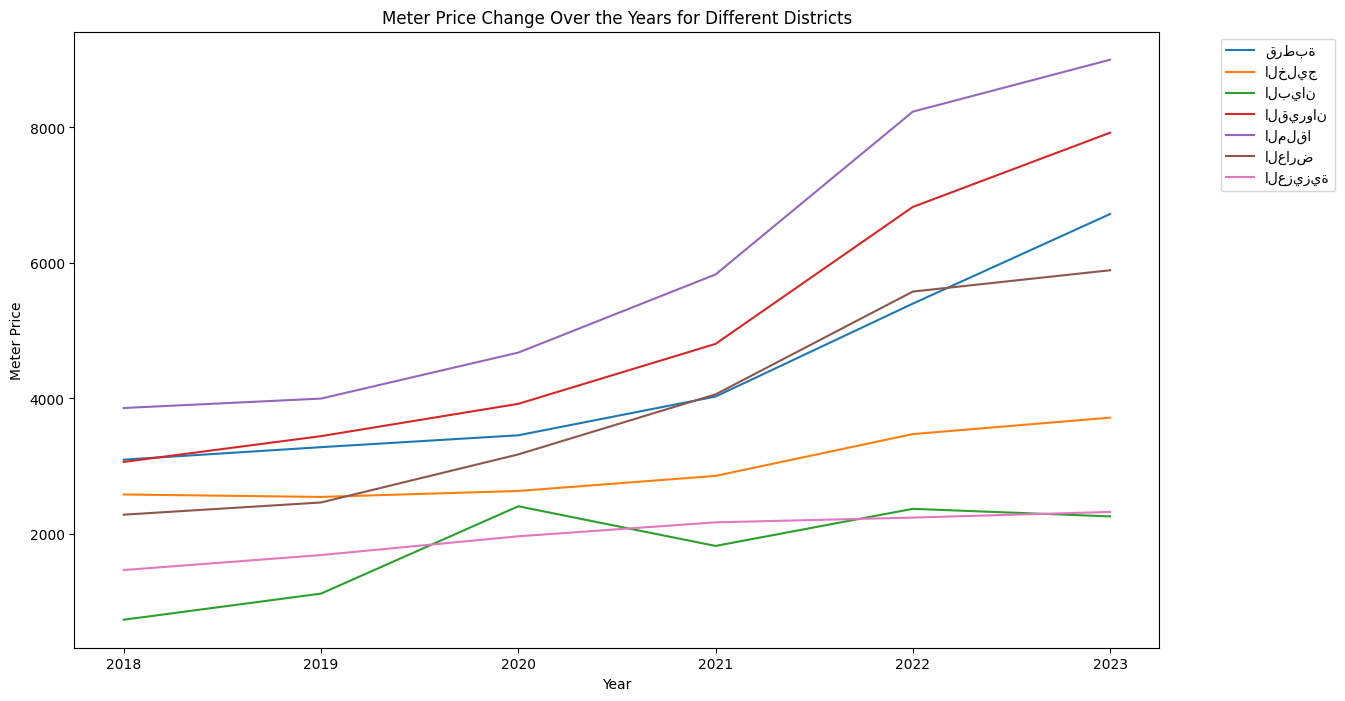

In [53]:


# Pivot the table to have years as columns
meanss = riy.pivot_table(values='Meter_Price_W_Avg_IQR', index='district_ar', columns='yearnumber', aggfunc='mean').reset_index()


plt.figure(figsize=(14, 8))

for district in lis:
    district_data = meanss[meanss['district_ar'] == district]
    plt.plot(district_data.columns[1:], district_data.values[0][1:], label=district)

plt.title('Meter Price Change Over the Years for Different Districts')
plt.xlabel('Year')
plt.ylabel('Meter Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [54]:
# for i in lis:
    
alkh18 = riy18[riy18['district_ar'] == 'البيان']
    # display(alkh18.describe())

alkh23 = riy23[riy23['district_ar'] == 'البيان']
display('2018',alkh18.describe(),'2023',alkh23.describe())

'2018'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,5.0,5.00000,5.00000,5.00000,5.000000e+00,4.000000
mean,2018.0,2.80000,20182.80000,15.80000,6.287521e+06,733.797845
std,0.0,1.30384,1.30384,11.12205,3.481456e+06,93.459028
min,2018.0,1.00000,20181.00000,1.00000,2.334825e+06,597.982303
25%,2018.0,2.00000,20182.00000,10.00000,3.836105e+06,714.555543
50%,2018.0,3.00000,20183.00000,15.00000,6.044568e+06,763.838624
75%,2018.0,4.00000,20184.00000,24.00000,8.078385e+06,783.080925
max,2018.0,4.00000,20184.00000,29.00000,1.114372e+07,809.531830


'2023'

,yearnumber,quarternumber,quarterid,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
count,9.0,9.000000,9.000000,9.000000,9.000000e+00,6.000000
mean,2023.0,2.222222,20232.222222,26.555556,3.361671e+07,2258.736896
std,0.0,0.833333,0.833333,33.234437,2.972950e+07,735.941718
min,2023.0,1.000000,20231.000000,1.000000,4.000000e+05,1615.789505
25%,2023.0,2.000000,20232.000000,3.000000,3.178000e+06,2007.633921
50%,2023.0,2.000000,20232.000000,9.000000,2.811319e+07,2059.972796
75%,2023.0,3.000000,20233.000000,58.000000,6.330541e+07,2098.242985
max,2023.0,3.000000,20233.000000,88.000000,7.153052e+07,3715.498938


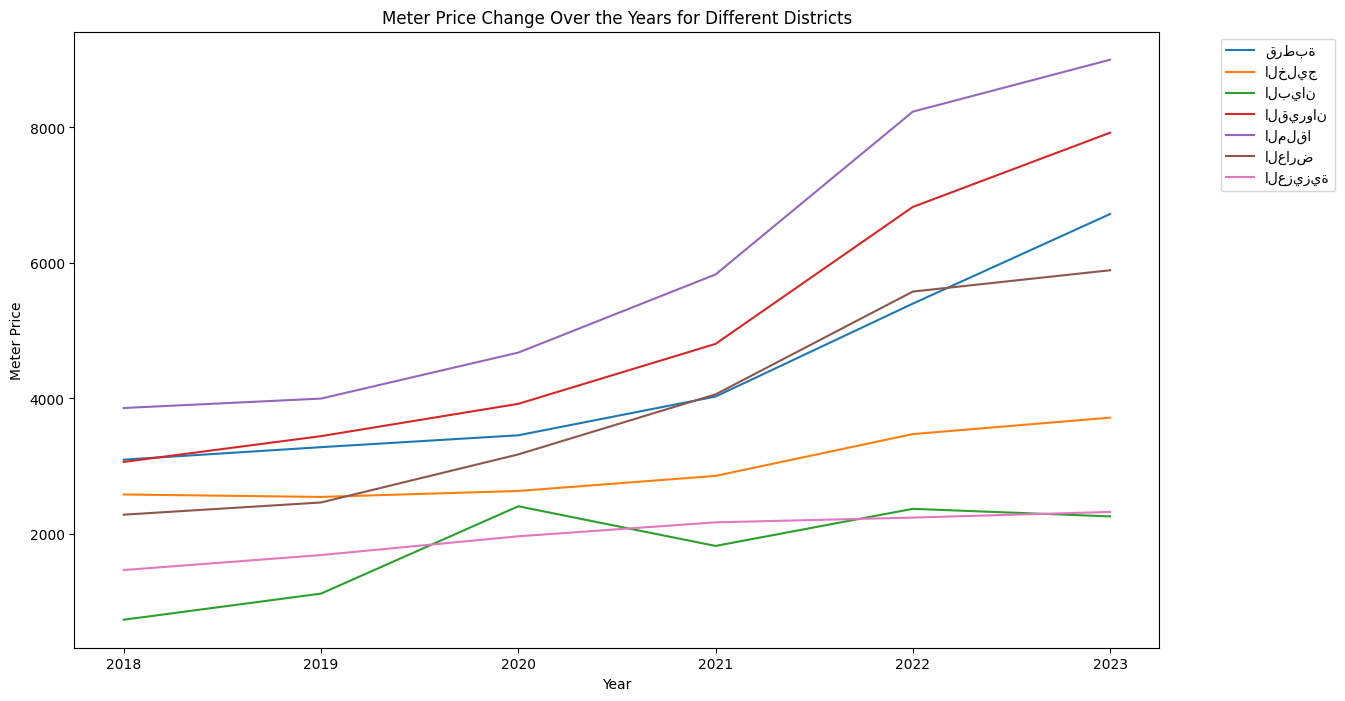

In [55]:
lis=['قرطبة','الخليج','البيان','القيروان','الملقا','العارض','العزيزية']

meanss = riy.pivot_table(values='Meter_Price_W_Avg_IQR', index='district_ar', columns='yearnumber', aggfunc='mean').reset_index()

# Plotting
plt.figure(figsize=(14, 8))

for district in lis:
    district_data = meanss[meanss['district_ar'] == district]
    plt.plot(district_data.columns[1:], district_data.values[0][1:], label=district)

plt.title('Meter Price Change Over the Years for Different Districts')
plt.xlabel('Year')
plt.ylabel('Meter Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [56]:
import plotly.graph_objects as go

meanss = riy.pivot_table(values='Meter_Price_W_Avg_IQR', index='district_ar', columns='yearnumber', aggfunc='mean').reset_index()
 # Adjust the file path and format accordingly


lis = ['قرطبة', 'الخليج', 'البيان', 'القيروان', 'الملقا', 'العارض', 'العزيزية']

# Creating the Plotly figure
fig = go.Figure()

for district in lis:
    district_data = meanss[meanss['district_ar'] == district]
    if not district_data.empty:
        fig.add_trace(go.Scatter(x=district_data.columns[1:], y=district_data.values[0][1:], mode='lines+markers', name=district))

# Update layout
fig.update_layout(
    title='Meter Price Change Over the Years for Different Districts',
    xaxis_title='Year',
    yaxis_title='Meter Price',
    legend_title='District',
    width=800,
    height=600
)

# Show the figure
fig.show()


In [57]:
# for i in lis:
#     #country_data = happy_diff_melted_filtered[happy_diff_melted_filtered['Country'] == country]
#     plt.plot(riy['yearnumber'], riy['Meter_Price_W_Avg_IQR'], label=i)

# plt.xlabel('Year')
# plt.ylabel('Happiness Change')
# plt.title('Happiness Change Over the Years for Countries with Significant Changes')
# plt.legend()
# plt.show()

In [58]:
riy.head()

,yearnumber,quarternumber,quarternamear,quarterid,region_ar,city_ar,district_ar,typecategoryar,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
0,2023,1,الربع الأول,20231,منطقة الرياض,الرياض,الأندلس,أخرى,1,120000.0,NaN
1,2018,3,الربع الثالث,20183,منطقة الرياض,الرياض,الأندلس,أخرى,1,1000000.0,NaN
2,2022,2,الربع الثانى,20222,منطقة الرياض,الرياض,الأندلس,أخرى,1,167177.0,NaN
3,2021,3,الربع الثالث,20213,منطقة الرياض,الرياض,الأندلس,أخرى,1,475000.0,NaN
4,2020,4,الربع الرابع,20204,منطقة الرياض,الرياض,الأندلس,أخرى,1,1000000.0,NaN


In [59]:
riy['district_ar'].unique()

array(['الأندلس', 'الصحافة', 'المصانع', 'الناصرية', 'النظيم', 'حطين',
       'غبيرا', 'عرقة', 'ظهرة لبن', 'العليا', 'الروضة', 'الشميسي',
       'السلي', 'العزيزية', 'العمل', 'أم الحمام الشرقي', 'المنار',
       'المصيف', 'الرحمانية', 'الفاروق', 'التعاون', 'القيروان', nan,
       'الفلاح', 'العوالي', 'طويق', 'ديراب', 'الزهراء', 'الصناعية',
       'الحزم', 'المرقب', 'الياسمين', 'الجنادرية', 'مغرزات', 'بنبان',
       'المعذر', 'النفل', 'المونسية', 'منفوحة الجديدة', 'السويدي الغربي',
       'الدار البيضاء', 'النسيم الشرقي', 'العارض', 'الملك فيصل', 'نمار',
       'جرير', 'الخليج', 'اليمامة', 'ظهرة البديعة', 'المصفاة', 'بدر',
       'المشاعل', 'أحد', 'البديعة', 'الربيع', 'العقيق', 'الرفيعة',
       'الرائد', 'السعادة', 'الصالحية', 'الملقا', 'النسيم الغربي',
       'النرجس', 'الجزيرة', 'البرية', 'أم سليم', 'الحائر', 'الملز',
       'إشبيلية', 'طيبة', 'العريجاء الغربي', 'النزهة', 'الربوة',
       'الإزدهار', 'عتيقة', 'البيان', 'الغدير', 'العريجاء', 'معكال',
       'الفيحاء', 'أم الحمام الغربي'

In [60]:
len(riy['district_ar'].unique())

145

In [69]:
Quarter_mean = riy.pivot_table(values='Meter_Price_W_Avg_IQR', index=['district_ar', 'yearnumber', 'quarternumber'], aggfunc='mean').reset_index()

data_2018 = Quarter_mean[Quarter_mean['yearnumber'] == 2019]

lis = ['قرطبة', 'الخليج', 'البيان', 'القيروان', 'الملقا', 'العارض', 'العزيزية']

# Creating the Plotly figure
fig = go.Figure()

for district in lis:
    district_data = data_2018[data_2018['district_ar'] == district]
    if not district_data.empty:
        fig.add_trace(go.Scatter(x=district_data['quarternumber'], y=district_data['Meter_Price_W_Avg_IQR'], mode='lines+markers', name=district))

# Update layout
fig.update_layout(
    title='Meter Price Change Over the Quarters in 2018 for Different Districts',
    xaxis_title='Quarter',
    yaxis_title='Meter Price',
    legend_title='District',
    width=800,
    height=600
)

# Show the figure
fig.show()

In [62]:
Quarter_mean

,district_ar,yearnumber,quarternumber,Meter_Price_W_Avg_IQR
0,أحد,2018,1,1259.011333
1,أحد,2018,2,1317.443497
2,أحد,2018,3,1236.697647
3,أحد,2018,4,1334.779739
4,أحد,2019,1,1281.252997
...,...,...,...,...
2504,نمار,2022,3,2311.953388
2505,نمار,2022,4,2209.165214
2506,نمار,2023,1,2107.754330
2507,نمار,2023,2,2425.746429


In [63]:
riy.duplicated().sum()

0

In [68]:
# riy.to_csv('clean_quarter_report.csv')

In [72]:
riy.head()

,yearnumber,quarternumber,quarternamear,quarterid,region_ar,city_ar,district_ar,typecategoryar,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR
0,2023,1,الربع الأول,20231,منطقة الرياض,الرياض,الأندلس,أخرى,1,120000.0,NaN
1,2018,3,الربع الثالث,20183,منطقة الرياض,الرياض,الأندلس,أخرى,1,1000000.0,NaN
2,2022,2,الربع الثانى,20222,منطقة الرياض,الرياض,الأندلس,أخرى,1,167177.0,NaN
3,2021,3,الربع الثالث,20213,منطقة الرياض,الرياض,الأندلس,أخرى,1,475000.0,NaN
4,2020,4,الربع الرابع,20204,منطقة الرياض,الرياض,الأندلس,أخرى,1,1000000.0,NaN


In [70]:
district = riy['district_ar'].unique()

In [71]:
district

array(['الأندلس', 'الصحافة', 'المصانع', 'الناصرية', 'النظيم', 'حطين',
       'غبيرا', 'عرقة', 'ظهرة لبن', 'العليا', 'الروضة', 'الشميسي',
       'السلي', 'العزيزية', 'العمل', 'أم الحمام الشرقي', 'المنار',
       'المصيف', 'الرحمانية', 'الفاروق', 'التعاون', 'القيروان', nan,
       'الفلاح', 'العوالي', 'طويق', 'ديراب', 'الزهراء', 'الصناعية',
       'الحزم', 'المرقب', 'الياسمين', 'الجنادرية', 'مغرزات', 'بنبان',
       'المعذر', 'النفل', 'المونسية', 'منفوحة الجديدة', 'السويدي الغربي',
       'الدار البيضاء', 'النسيم الشرقي', 'العارض', 'الملك فيصل', 'نمار',
       'جرير', 'الخليج', 'اليمامة', 'ظهرة البديعة', 'المصفاة', 'بدر',
       'المشاعل', 'أحد', 'البديعة', 'الربيع', 'العقيق', 'الرفيعة',
       'الرائد', 'السعادة', 'الصالحية', 'الملقا', 'النسيم الغربي',
       'النرجس', 'الجزيرة', 'البرية', 'أم سليم', 'الحائر', 'الملز',
       'إشبيلية', 'طيبة', 'العريجاء الغربي', 'النزهة', 'الربوة',
       'الإزدهار', 'عتيقة', 'البيان', 'الغدير', 'العريجاء', 'معكال',
       'الفيحاء', 'أم الحمام الغربي'

In [73]:
south=['المصانع','العزيزية','الدار البيضاء','بدر',
        'أحد','طيبة','الغنامية','المناخ','عريض',
        'المصفاة','الحائر'
        ,'المروة','عكاظ','سلطانة',
        'المدينة الصناعية الجديدة','عتيقة'

        ]

In [74]:
centar=['غبيرا','العمل','الصناعية',' منفوحة الجديدة',
        'جرير','اليمامة',
        'الجزيرة','منفوحة','الوزارات','أم سليم','الديرة',
        'العود','الضباط','المربع','الخالدية','  الملك عبدالعزيز',
        'الفيصلية','الهدا','معكال '
        ,'الشميسي','منفوحة الجديدة'
        ,'الرفيعة'
        ,'الزهراء','الصالحية','الملز','معكال'
        'الفاروق ','المرقب','الجرادية', 'ثليم', 

          ]

In [75]:
north=['الفلاح','الوادي','الندى','الربيع'
       ,'النفل','الغدير','الصحافة','العقيق'
       ,'حطين','الملقا','الياسمين','النرجس'
       ,'العارض','القيروان','بنبان',''
       ,'الخير','مطار الملك خالد الدولي','العقيق',
       'الياسمين','الصحافة','الربيع','الغدير','النفل'
       ,'الوادي','الندى','الفلاح','الإزدهار'
       ,'النخيل','المروج','المصيف','التعاون'
       ,'الازدهار','مغرزات','النزهة','المرسلات'
       ,'المحمدية','الملك فهد','الرحمانية','الورود'
       ,'الرائد','الخزامى','الواحة','صلاح الدين'
       ,'الملك عبدالله','السليمانية','العليا','المعذر الشمالي'
       ,'أم الحمام الشرقي','المعذر',''
       ]

In [76]:
east=['الرمال','المونسية','قرطبة','البيان'
      ,'المرجان','الوسام','السحاب','المشرق'
      ,'الزاهر','التضامن','الشعلة','العلا'
      ,'الزهور','الراية','الفرسان','الدانة'
      ,'الرسالة','الرسالة','الرحاب','المجد'
      ,'النخبة','الشهداء','غرناطة','اليرموك'
      ,'القادسية','الجنادرية','النظيم','الحمراء'
      ,'إشبيلية','القدس','الملك فيصل','الخليج'
      ,'الروضة','الأندلس','النهضة','المعيزيلة'
      ,'الندوة','الربوة','الريان','المنار'
      ,'النسيم الغربي','النسيم الشرقي','الرماية','الروابي'
      ,'السلام','الجزيرة','الفيحاء','السعادة'
      ,'خشم العان','السلي','المشاعل','البرية'
      ]

In [78]:
location = {
    'شرق الرياض':['الرمال','المونسية','قرطبة','البيان'
      ,'المرجان','الوسام','السحاب','المشرق'
      ,'الزاهر','التضامن','الشعلة','العلا'
      ,'الزهور','الراية','الفرسان','الدانة'
      ,'الرسالة','الرسالة','الرحاب','المجد'
      ,'النخبة','الشهداء','غرناطة','اليرموك'
      ,'القادسية','الجنادرية','النظيم','الحمراء'
      ,'إشبيلية','القدس','الملك فيصل','الخليج'
      ,'الروضة','الأندلس','النهضة','المعيزيلة'
      ,'الندوة','الربوة','الريان','المنار'
      ,'النسيم الغربي','النسيم الشرقي','الرماية','الروابي'
      ,'السلام','الجزيرة','الفيحاء','السعادة'
      ,'خشم العان','السلي','المشاعل','البرية'
      ],
    'شمال الرياض':['الفلاح','الوادي','الندى','الربيع'
       ,'النفل','الغدير','الصحافة','العقيق'
       ,'حطين','الملقا','الياسمين','النرجس'
       ,'العارض','القيروان','بنبان',''
       ,'الخير','مطار الملك خالد الدولي','العقيق',
       'الياسمين','الصحافة','الربيع','الغدير','النفل'
       ,'الوادي','الندى','الفلاح','الإزدهار'
       ,'النخيل','المروج','المصيف','التعاون'
       ,'الازدهار','مغرزات','النزهة','المرسلات'
       ,'المحمدية','الملك فهد','الرحمانية','الورود'
       ,'الرائد','الخزامى','الواحة','صلاح الدين'
       ,'الملك عبدالله','السليمانية','العليا','المعذر الشمالي'
       ,'أم الحمام الشرقي','المعذر',''
       ],
    'وسط الرياض':['غبيرا','العمل','الصناعية',' منفوحة الجديدة',
        'جرير','اليمامة',
        'الجزيرة','منفوحة','الوزارات','أم سليم','الديرة',
        'العود','الضباط','المربع','الخالدية','  الملك عبدالعزيز',
        'الفيصلية','الهدا','معكال '
        ,'الشميسي','منفوحة الجديدة'
        ,'الرفيعة'
        ,'الزهراء','الصالحية','الملز','معكال'
        'الفاروق ','المرقب','الجرادية', 'ثليم', 
          ],
    'جنوب الرياض':['المصانع','العزيزية','الدار البيضاء','بدر',
        'أحد','طيبة','الغنامية','المناخ','عريض',
        'المصفاة','الحائر'
        ,'المروة','عكاظ','سلطانة',
        'المدينة الصناعية الجديدة','عتيقة'
        ],
}

In [79]:
def get_location(district):
    for loc, districts in location.items():
        if district in districts:
            return loc
    return 'Unknown'

# Apply the function to create a new column
riy['location'] = riy['district_ar'].apply(get_location)


C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_22196\3777101630.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [80]:
riy

,yearnumber,quarternumber,quarternamear,quarterid,region_ar,city_ar,district_ar,typecategoryar,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR,location
0,2023,1,الربع الأول,20231,منطقة الرياض,الرياض,الأندلس,أخرى,1,120000.00,NaN,شرق الرياض
1,2018,3,الربع الثالث,20183,منطقة الرياض,الرياض,الأندلس,أخرى,1,1000000.00,NaN,شرق الرياض
2,2022,2,الربع الثانى,20222,منطقة الرياض,الرياض,الأندلس,أخرى,1,167177.00,NaN,شرق الرياض
3,2021,3,الربع الثالث,20213,منطقة الرياض,الرياض,الأندلس,أخرى,1,475000.00,NaN,شرق الرياض
4,2020,4,الربع الرابع,20204,منطقة الرياض,الرياض,الأندلس,أخرى,1,1000000.00,NaN,شرق الرياض
...,...,...,...,...,...,...,...,...,...,...,...,...
32712,2022,1,الربع الأول,20221,منطقة الرياض,الرياض,الرفيعة,قطعة أرض-سكنى,16,17029112.63,2742.015104,وسط الرياض
32713,2023,2,الربع الثانى,20232,منطقة الرياض,الرياض,NaN,قطعة أرض-سكنى,1,390000.00,NaN,Unknown
32714,2022,3,الربع الثالث,20223,منطقة الرياض,الرياض,NaN,قطعة أرض-سكنى,4,1020000.00,NaN,Unknown
32715,2021,4,الربع الرابع,20214,منطقة الرياض,الرياض,NaN,قطعة أرض-سكنى,1,200000.00,NaN,Unknown


In [89]:
pd.set_option('display.max_rows', None)

In [91]:
riy['district_ar'].isnull().sum()

831

In [93]:
riy.head()

,yearnumber,quarternumber,quarternamear,quarterid,region_ar,city_ar,district_ar,typecategoryar,deed_counts,RealEstatePrice_SUM,Meter_Price_W_Avg_IQR,location
0,2023,1,الربع الأول,20231,منطقة الرياض,الرياض,الأندلس,أخرى,1,120000.0,NaN,شرق الرياض
1,2018,3,الربع الثالث,20183,منطقة الرياض,الرياض,الأندلس,أخرى,1,1000000.0,NaN,شرق الرياض
2,2022,2,الربع الثانى,20222,منطقة الرياض,الرياض,الأندلس,أخرى,1,167177.0,NaN,شرق الرياض
3,2021,3,الربع الثالث,20213,منطقة الرياض,الرياض,الأندلس,أخرى,1,475000.0,NaN,شرق الرياض
4,2020,4,الربع الرابع,20204,منطقة الرياض,الرياض,الأندلس,أخرى,1,1000000.0,NaN,شرق الرياض


In [ ]:
riy.to_csv('clean_quarter_report.csv')